## Setup
### Import

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os
import sys
from datetime import datetime, timedelta

# Set up matplotlib for nicer plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Add parent directory to path for imports
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [17]:
# Import data utilities
from utils.data_utils import fetch_data, preprocess_data, resample_data, get_risk_free_rate

# Import indicator utilities
from utils.indicator_utils import calculate_kdj, calculate_sma, calculate_macd, calculate_rsi

# Import performance utilities
from utils.performance_utils import (
    calculate_returns, plot_cumulative_returns, 
    plot_rolling_metrics, plot_drawdowns, generate_performance_report
)

# Import strategy
from strategies.kdj_strategy import KDJStrategy

# Import backtesting engine
from backtest.engine import BacktestEngine

# Import optimization module
from optimize.grid_search import GridSearch

### Configure Parameters

In [20]:
# Configuration
ticker = 'PDD'           # Ticker symbol
benchmark = 'NDX'         # Benchmark ticker
period = '7y'            # Data period (e.g., '1y', '5y', '10y')
initial_capital = 100000  # Initial capital for backtesting
#start_date = datetime.now()         # Start date for backtesting
#end_date = datetime.now()           # End date for backtesting

# Strategy parameters
strategy_params = {
    'k_period': 9,           
    'j_buy_threshold': -5,   
    'j_sell_threshold': 100,  
    'daily_enabled': True,   
    'weekly_enabled': True,  
    'monthly_enabled': False,
    'position_size': 0.7     
}

### Portfolio

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '9988.HK'), ('High', '9988.HK'), ('Low', '9988.HK'), ('Open', '9988.HK'), ('Volume', '9988.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2019-11-26  186.966507  188.860085  186.368527  186.368527  74549578
2019-11-27  192.547592  194.640507  188.660768  189.358401  53617241
2019-11-28  203.311127  203.510448  196.235096  196.334765  41816834
2019-11-29  197.730042  204.108439  196.833087  203.311138  36509531
2019-12-02  194.839844  198.228357  193.344909  197.331402  26592325
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '0700.HK'), ('High', '0700.HK'), ('Low', '0700.HK'), ('Open', '0700.HK'), ('Volume', '0700.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2018-03-15  418.415833  419.665891  408.951038  410.022499  26796560
2018-03-16  415.379974  422.166056  415.379974  416.987197  25924828
2018-03-19  412.344086  420.023062  412.344086  415.201366  17667618
2018-03-20  416.630035  418.237258  407.165240  407.522404  23814243
2018-03-21  413.058441  424.666219  411.272622  421.630342  30638140
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '3690.HK'), ('High', '3690.HK'), ('Low', '3690.HK'), ('Open', '3690.HK'), ('Volume', '3690.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open     volume
Date                                                             
2018-09-20  72.650002  74.000000  72.000000  72.900002  115846804
2018-09-21  72.099998  74.000000  71.949997  74.000000   43838241
2018-09-24  69.000000  71.900002  69.000000  70.650002   31460064
2018-09-26  68.800003  69.599998  65.650002  69.349998   68632397
2018-09-27  67.000000  69.750000  65.650002  68.800003   29514806
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  951

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '1810.HK'), ('High', '1810.HK'), ('Low', '1810.HK'), ('Open', '1810.HK'), ('Volume', '1810.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low  open     volume
Date                                                        
2018-07-09  16.799999  17.000000  16.000000  16.6  462182642
2018-07-10  19.000000  19.340000  17.000000  17.0  534072218
2018-07-11  19.000000  19.799999  18.299999  18.5  374721138
2018-07-12  19.260000  19.700001  19.020000  19.4  132592630
2018-07-13  21.450001  21.799999  19.520000  19.6  364065075
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.860352  9517.860352 

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '2331.HK'), ('High', '2331.HK'), ('Low', '2331.HK'), ('Open', '2331.HK'), ('Volume', '2331.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
               close      high       low      open    volume
Date                                                        
2018-03-15  7.653081  7.763462  7.524304  7.561098  13048985
2018-03-16  7.781860  7.809455  7.625487  7.643884  28663222
2018-03-19  7.800257  8.030218  7.708274  7.781861  20671542
2018-03-20  7.551900  7.791059  7.358734  7.791059  15193008
2018-03-21  7.165567  7.542702  7.064384  7.542702  19318600
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.860352  9517.860352 

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Open', 'TSLA'), ('Volume', 'TSLA')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open     volume
Date                                                             
2018-03-15  21.706667  22.190001  21.406668  21.958668   98472000
2018-03-16  21.423332  21.826668  21.271334  21.528667   91759500
2018-03-19  20.903999  21.383333  20.644667  21.100000  112264500
2018-03-20  20.703333  21.083332  20.584000  20.991333   71464500
2018-03-21  21.101999  21.496000  20.679333  20.683332   89376000
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/performance_utils.py:271: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

Original columns: [('Close', 'AMZN'), ('High', 'AMZN'), ('Low', 'AMZN'), ('Open', 'AMZN'), ('Volume', 'AMZN')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open     volume
Date                                                             
2018-03-15  79.115997  79.845497  78.905502  79.750000   81394000
2018-03-16  78.584000  79.472000  78.375000  79.172501  108500000
2018-03-19  77.246498  78.083000  76.267502  77.726501  131616000
2018-03-20  79.325500  79.349998  77.270500  77.516998   91632000
2018-03-21  79.093002  79.500000  78.158501  79.322502   95016000
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', 'NVDA'), ('High', 'NVDA'), ('Low', 'NVDA'), ('Open', 'NVDA'), ('Volume', 'NVDA')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
               close      high       low      open     volume
Date                                                         
2018-03-15  6.169388  6.250544  6.127325  6.168151  401952000
2018-03-16  6.197594  6.216646  6.148108  6.185718  399456000
2018-03-19  5.963031  6.169634  5.864060  6.140685  713772000
2018-03-20  6.175325  6.214172  5.966001  5.966001  554696000
2018-03-21  6.150090  6.235205  6.119656  6.168894  438688000
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.860352  9517.860352       0


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', 'TSM'), ('High', 'TSM'), ('Low', 'TSM'), ('Open', 'TSM'), ('Volume', 'TSM')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open   volume
Date                                                           
2018-03-15  37.892090  38.176427  37.540848  37.716467  3942200
2018-03-16  37.607754  38.067710  37.574302  37.632841  8125600
2018-03-19  37.298332  37.524130  36.955455  37.398689  5116500
2018-03-20  37.490673  37.557574  37.231423  37.381955  6404200
2018-03-21  37.381954  37.507395  37.005625  37.273236  7036400
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.860352  9517.860352

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', 'VST'), ('High', 'VST'), ('Low', 'VST'), ('Open', 'VST'), ('Volume', 'VST')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open   volume
Date                                                           
2018-03-15  17.794764  17.837766  17.459337  17.528142  5541200
2018-03-16  17.571146  17.846367  17.502341  17.794763  4212200
2018-03-19  17.141117  17.528146  17.020708  17.528146  4342900
2018-03-20  17.046509  17.295929  16.930400  17.201321  3759900
2018-03-21  17.330324  17.459334  17.020702  17.080906  4039700
Original benchmark columns: [('Close', 'NDX'), ('High', 'NDX'), ('Low', 'NDX'), ('Open', 'NDX'), ('Volume', 'NDX')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                  close         high          low         open  volume
Date                                                                  
2020-02-11  9517.860352  9517.860352  9517.860352  9517.860352

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')


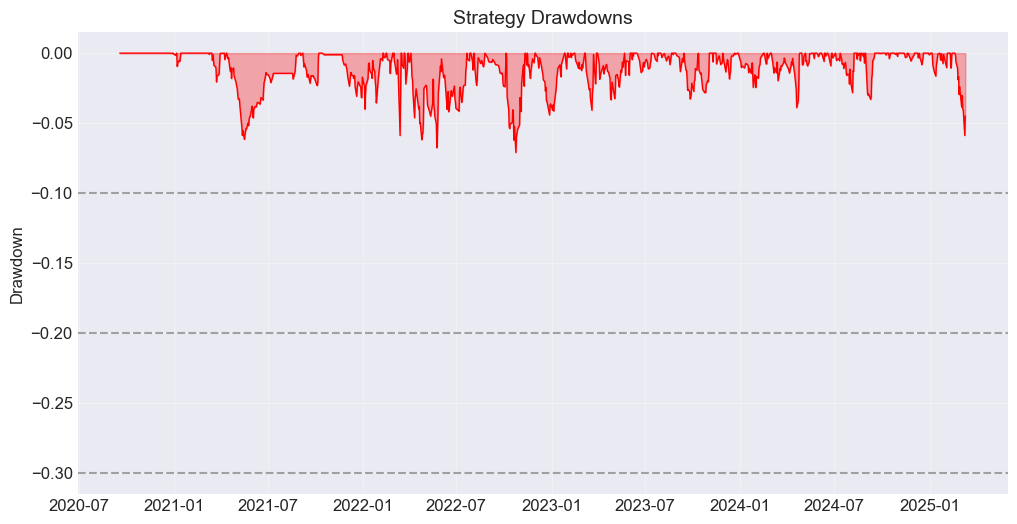

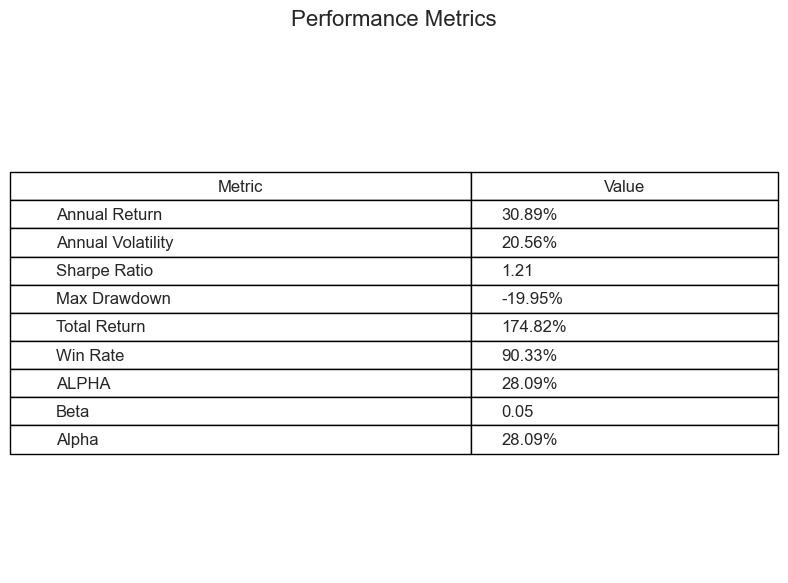

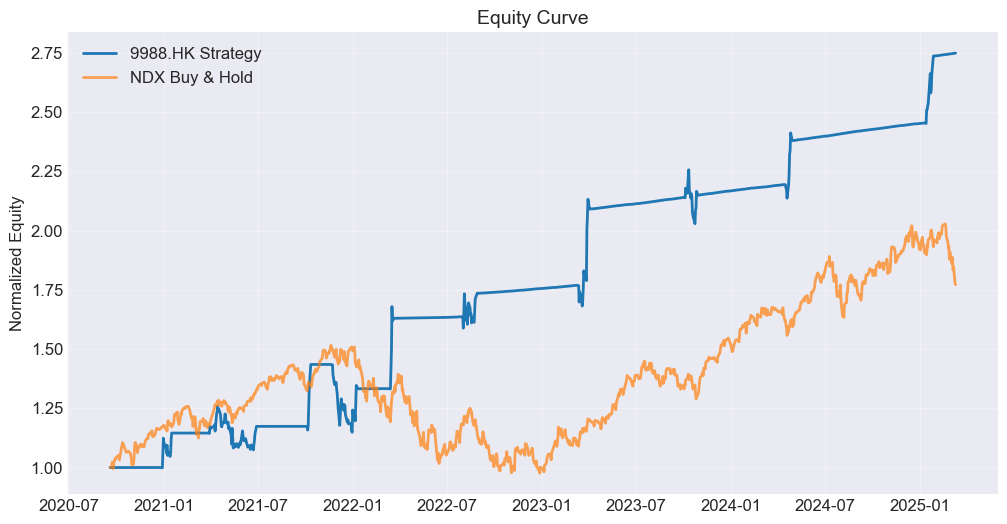

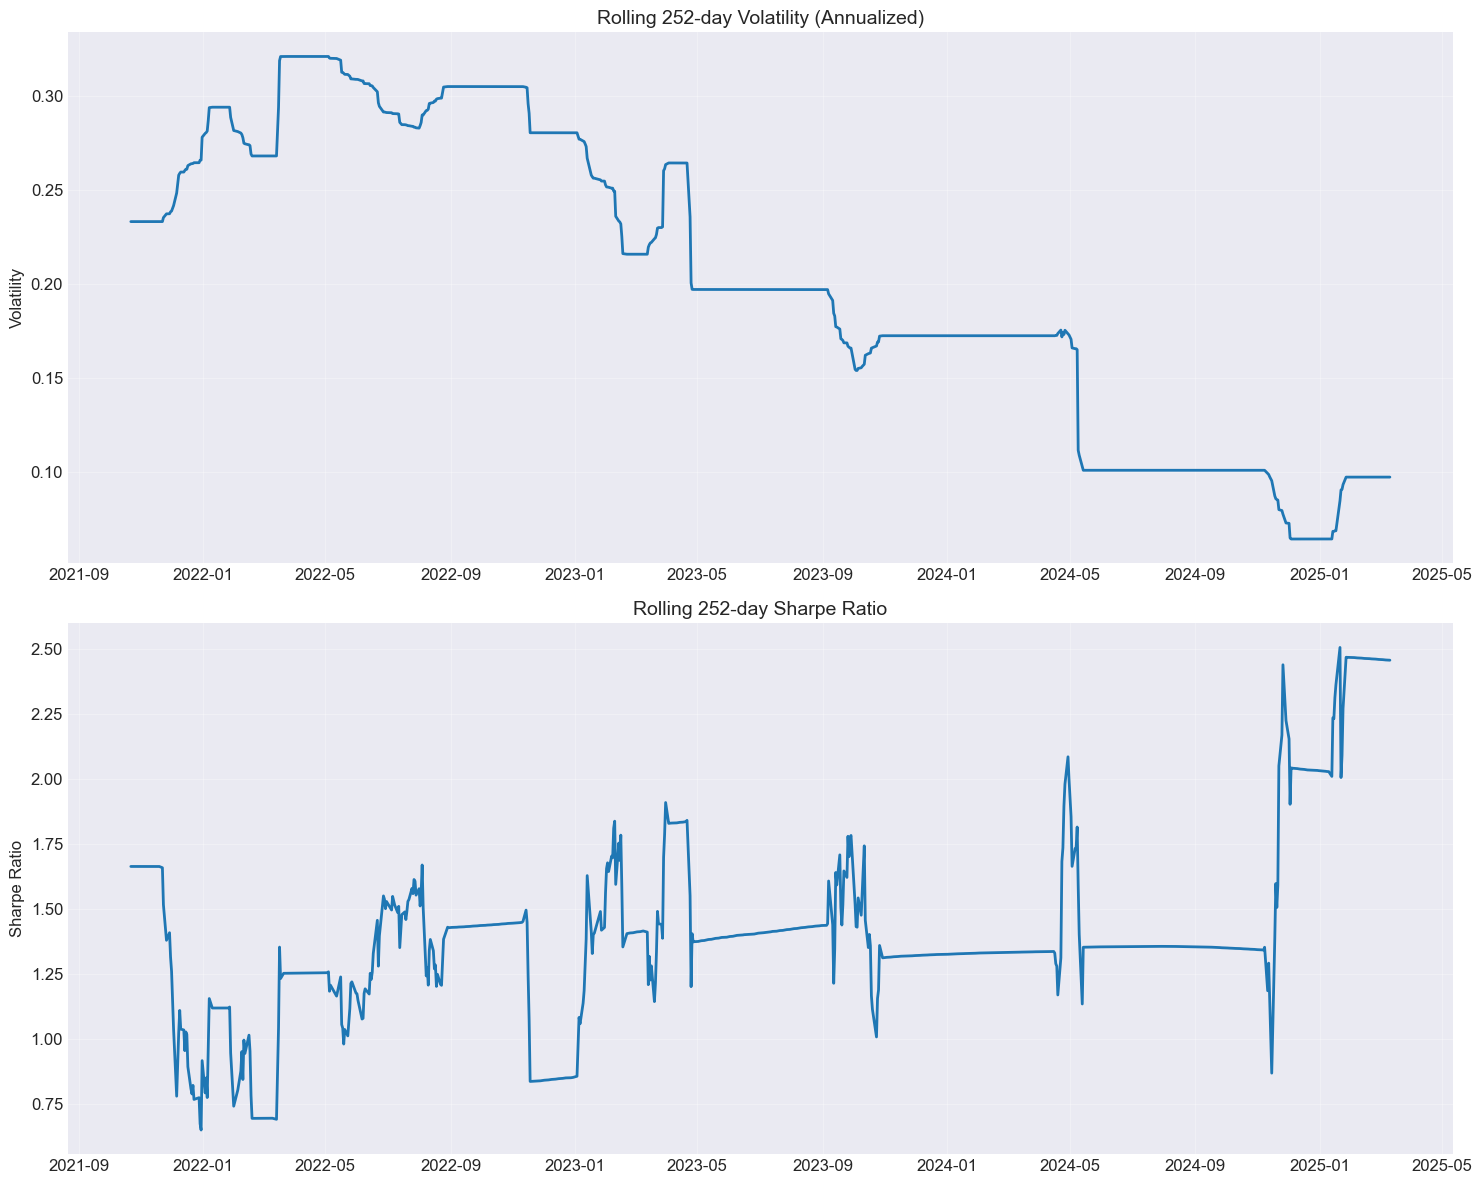

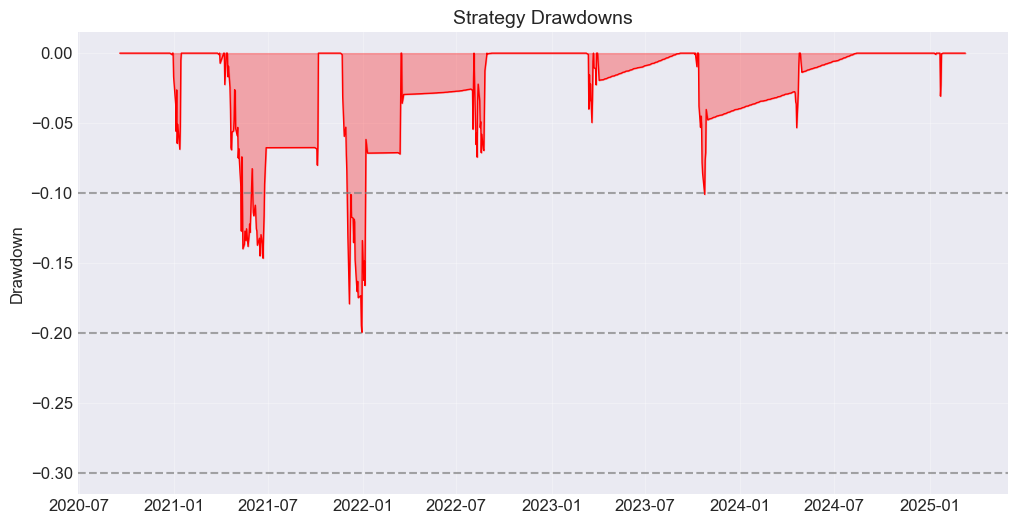

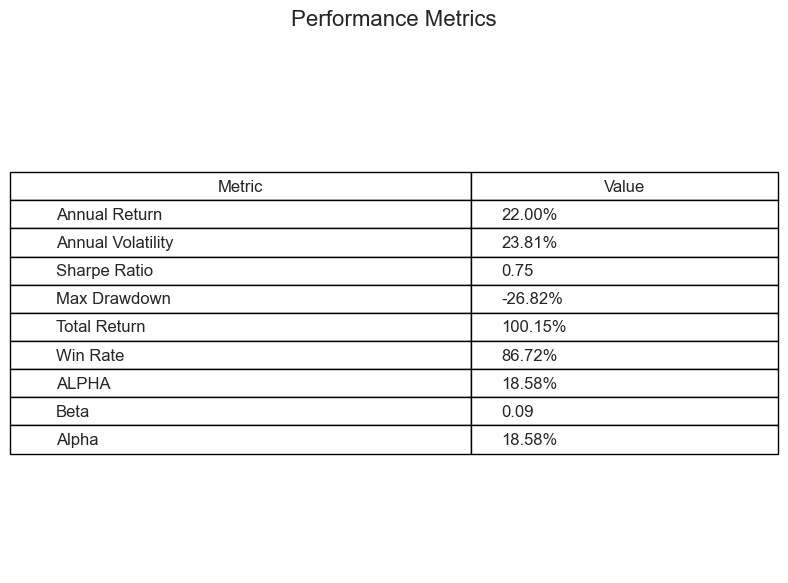

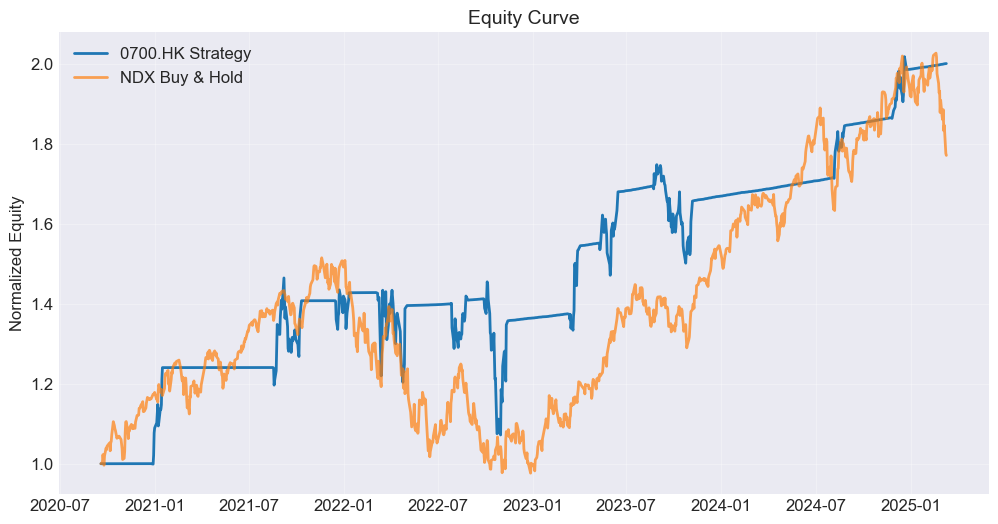

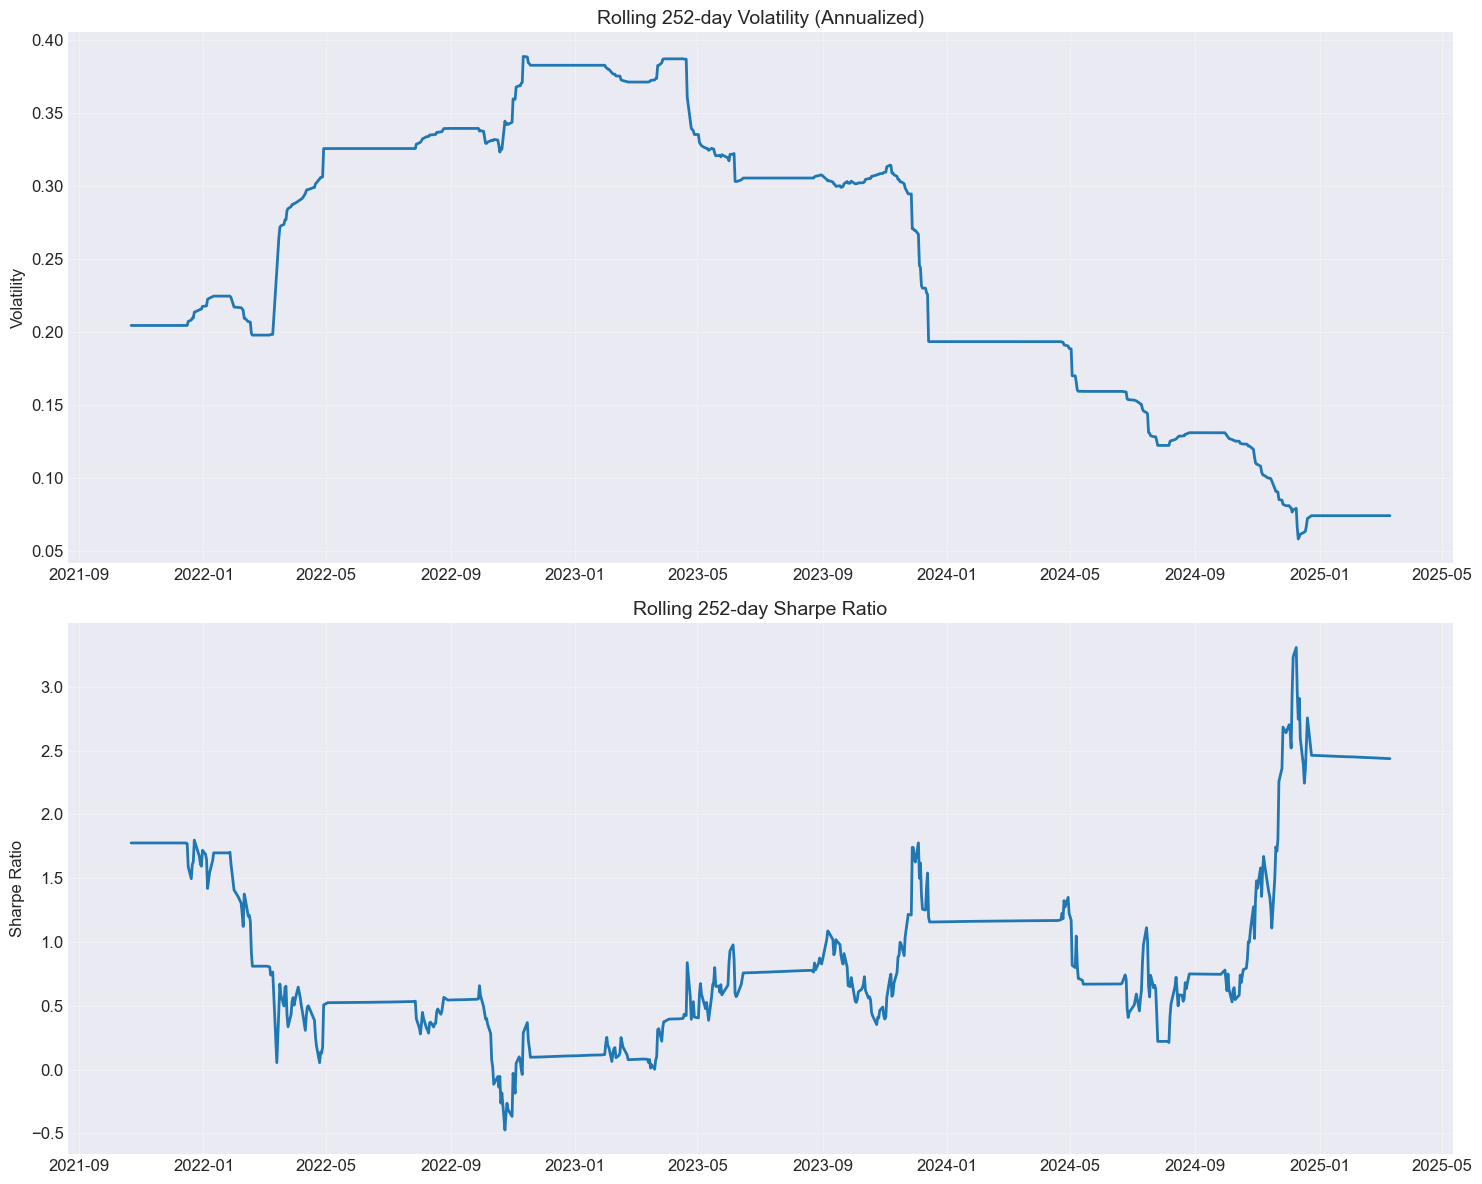

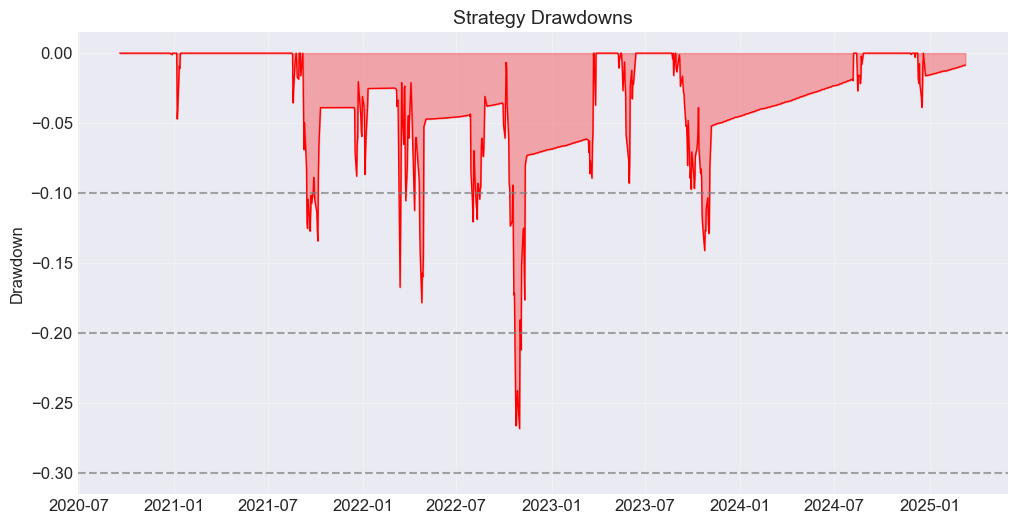

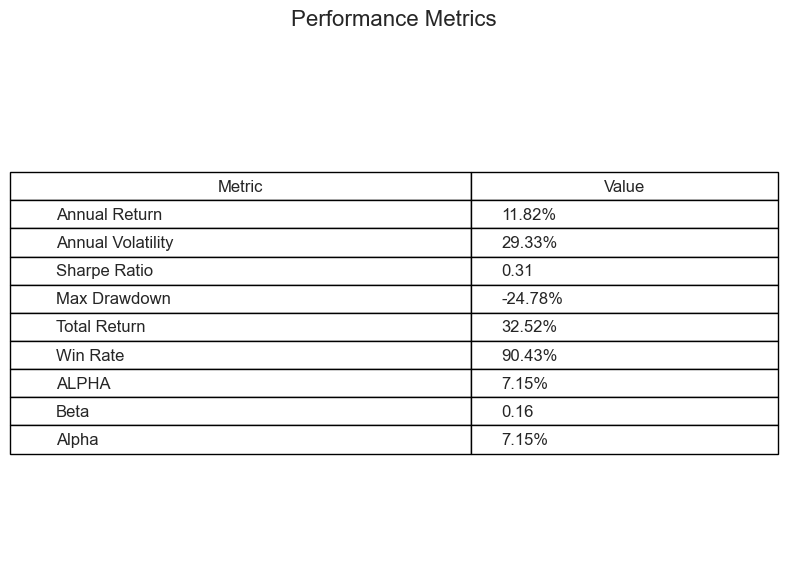

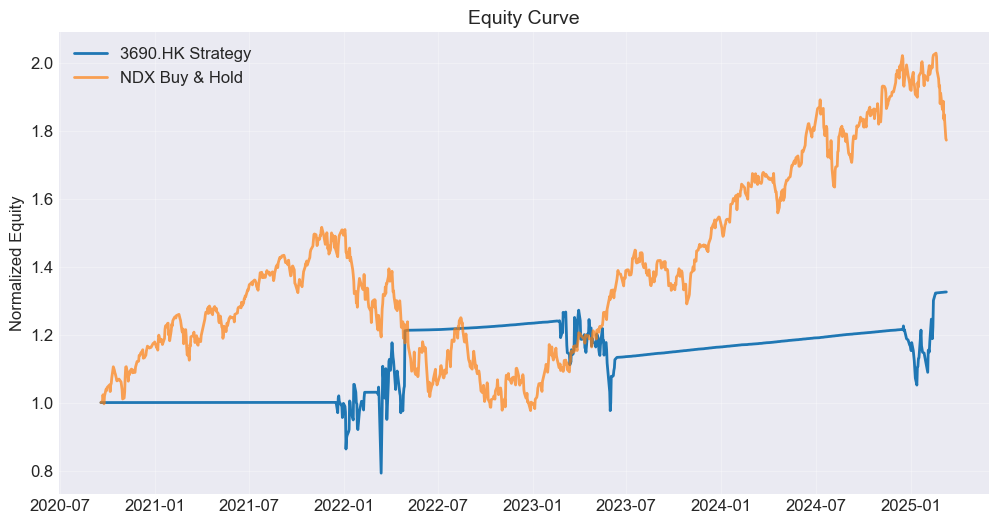

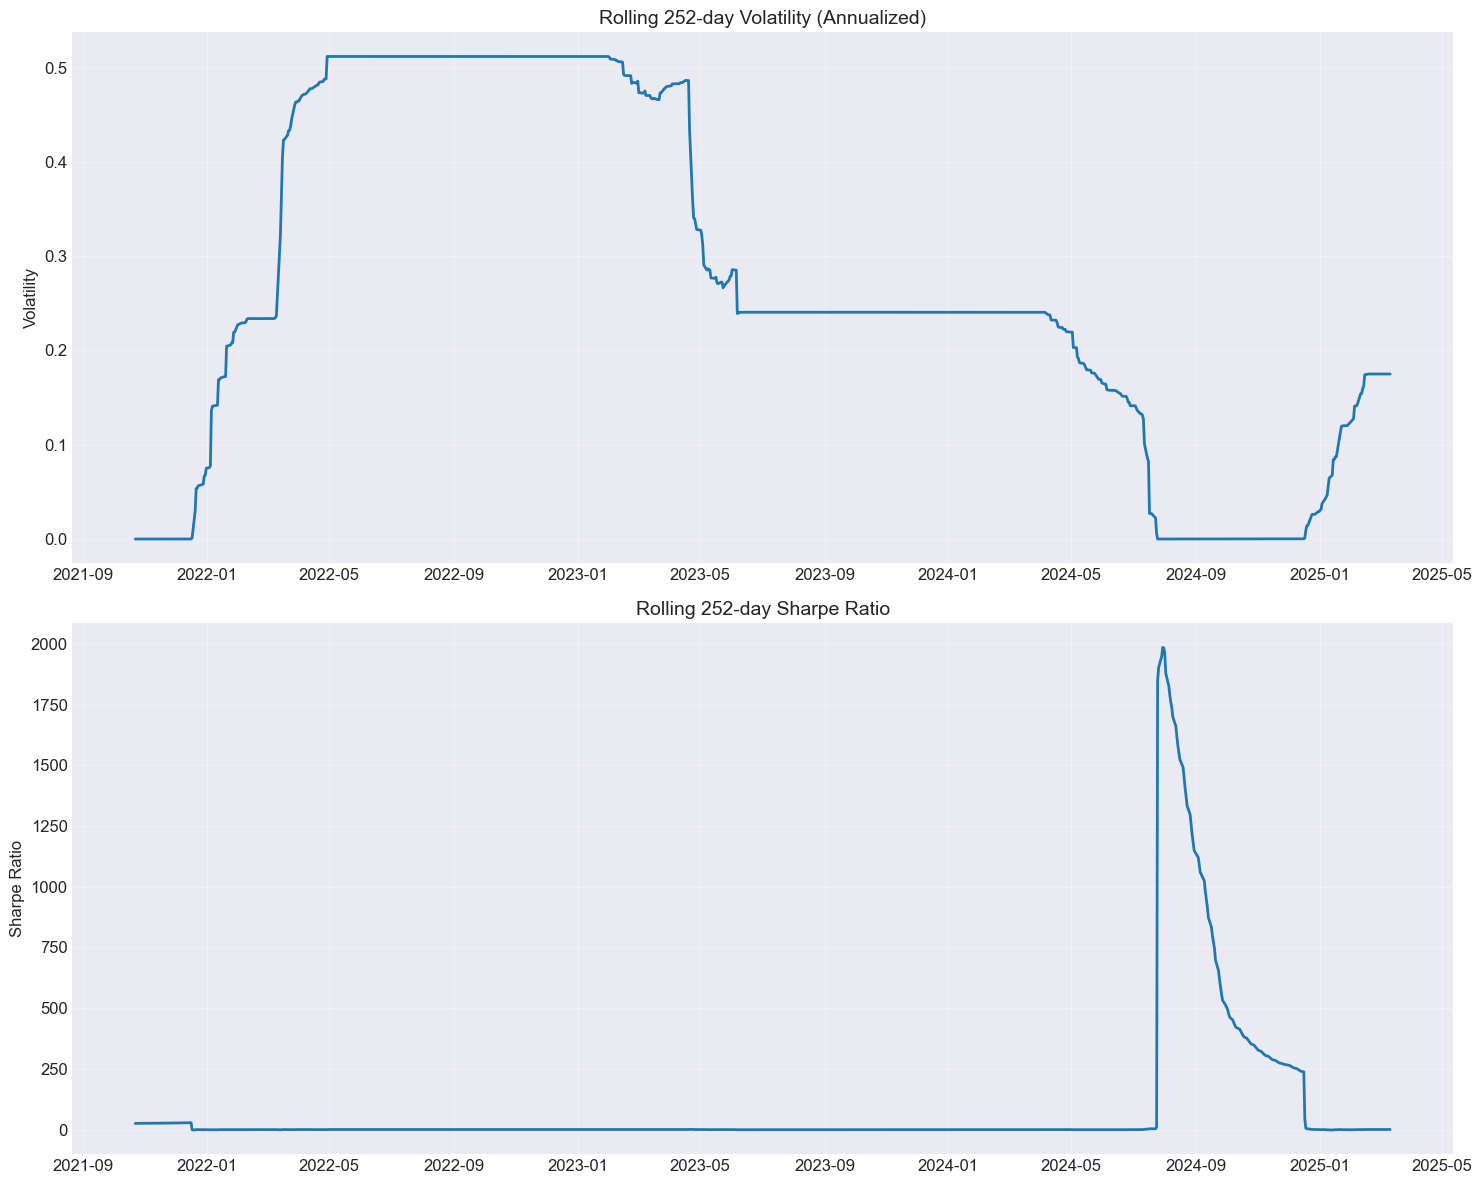

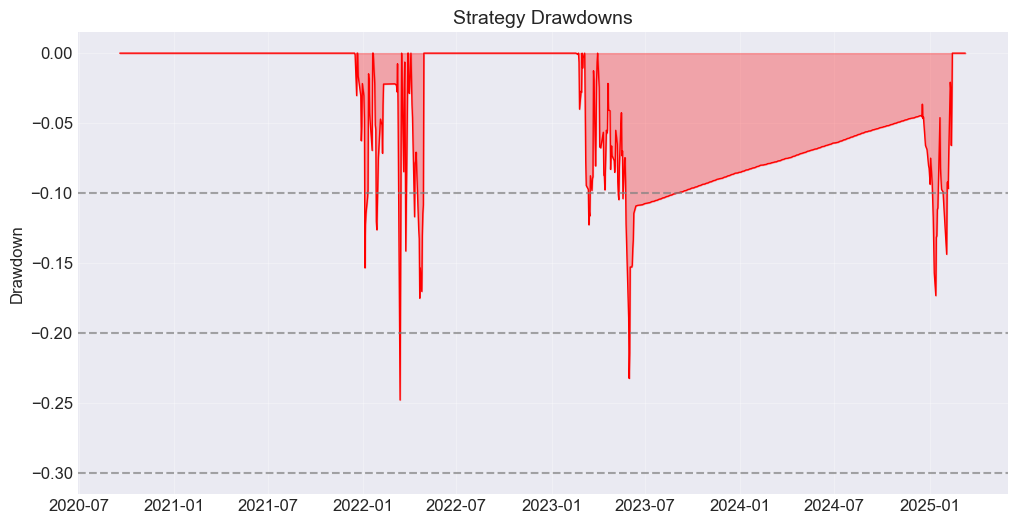

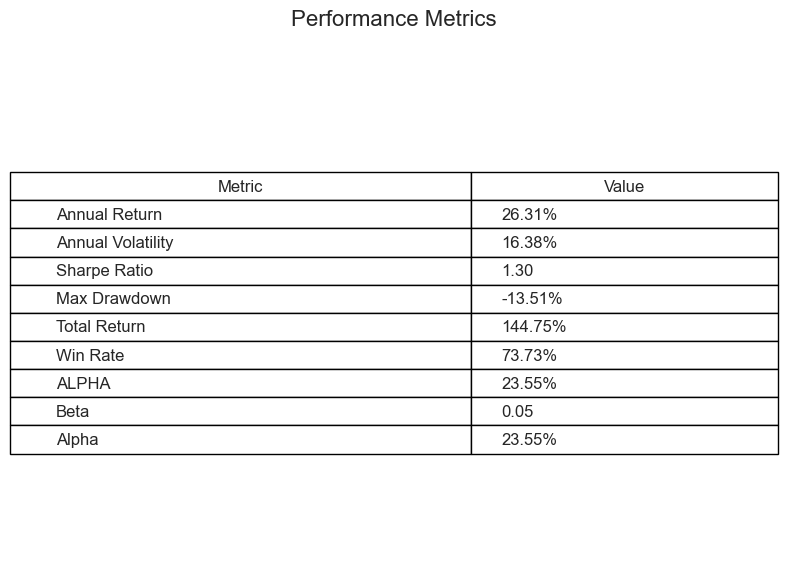

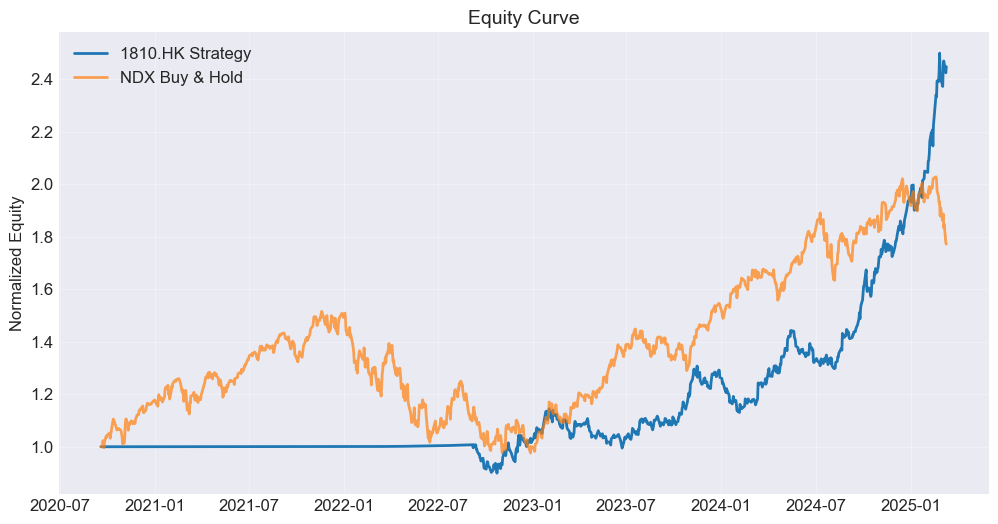

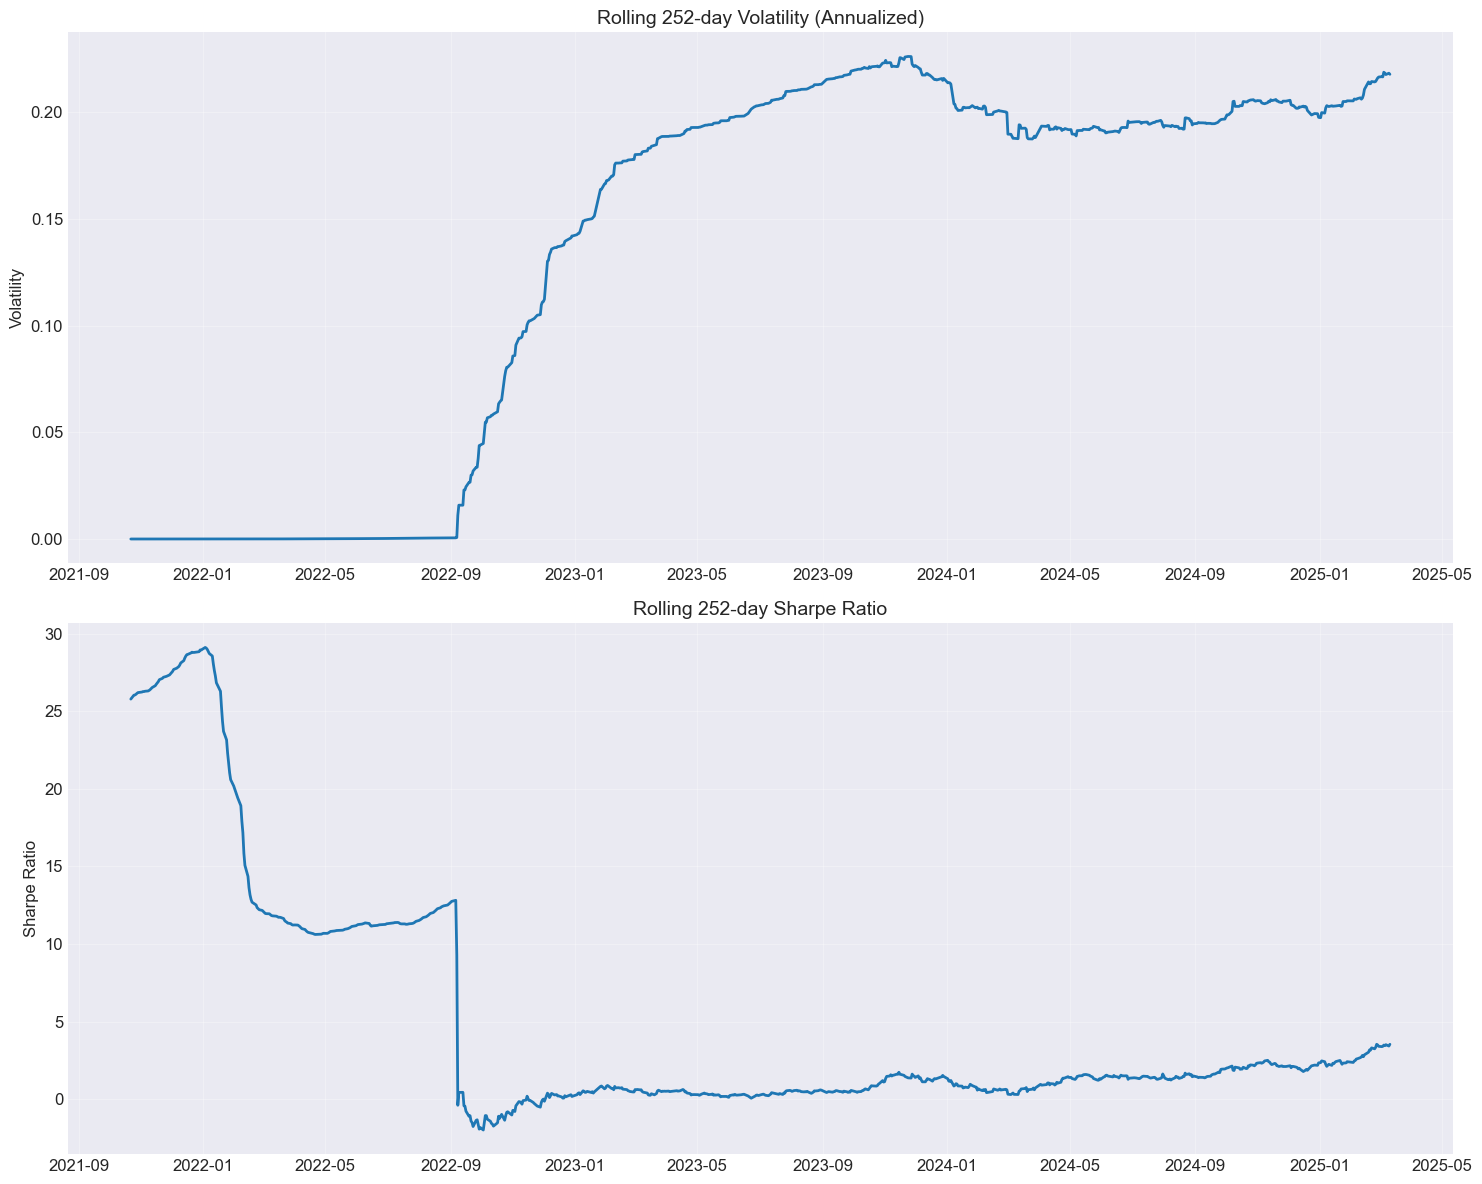

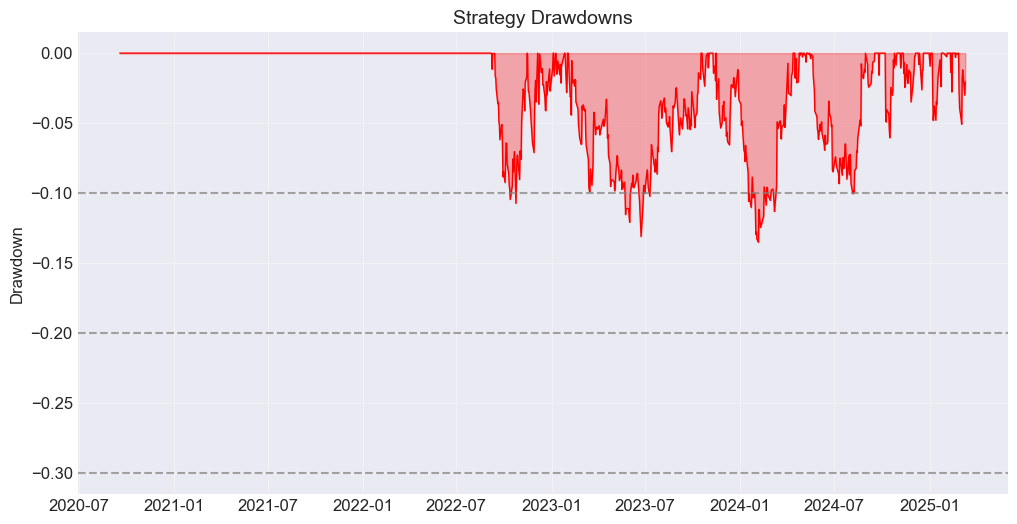

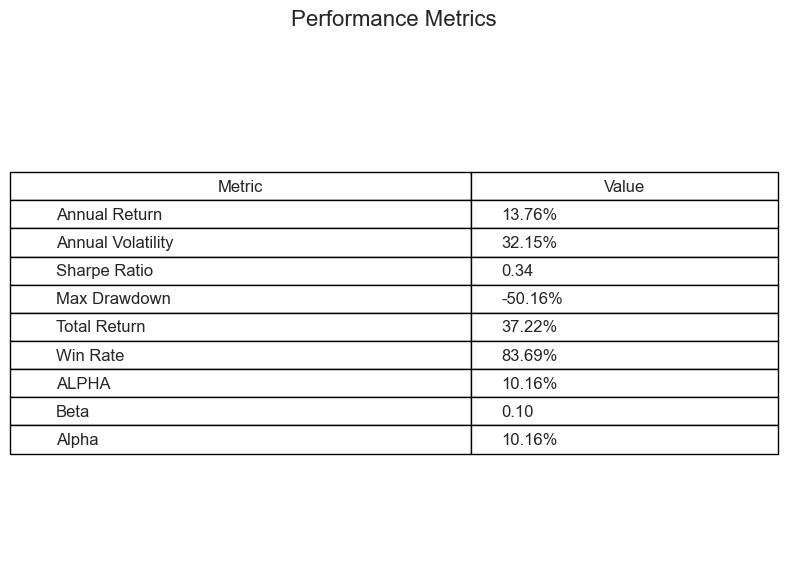

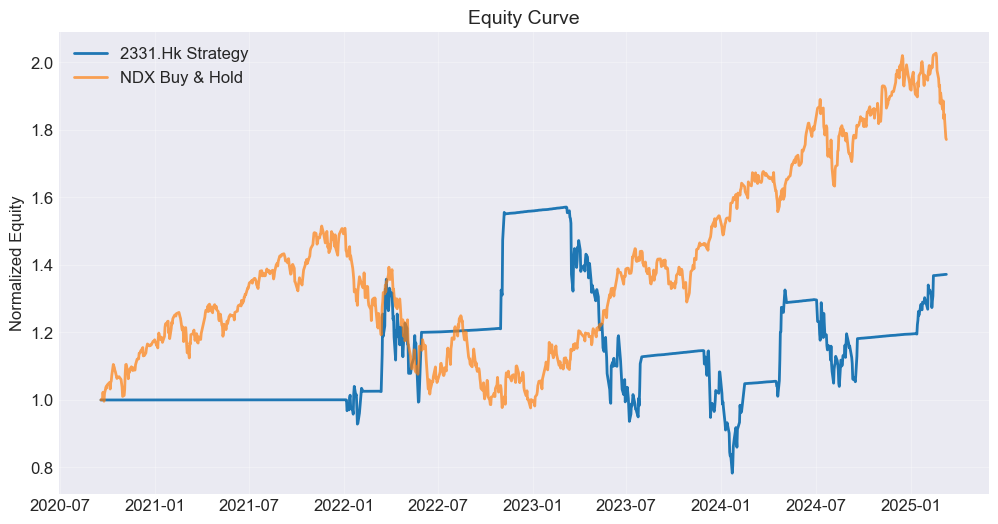

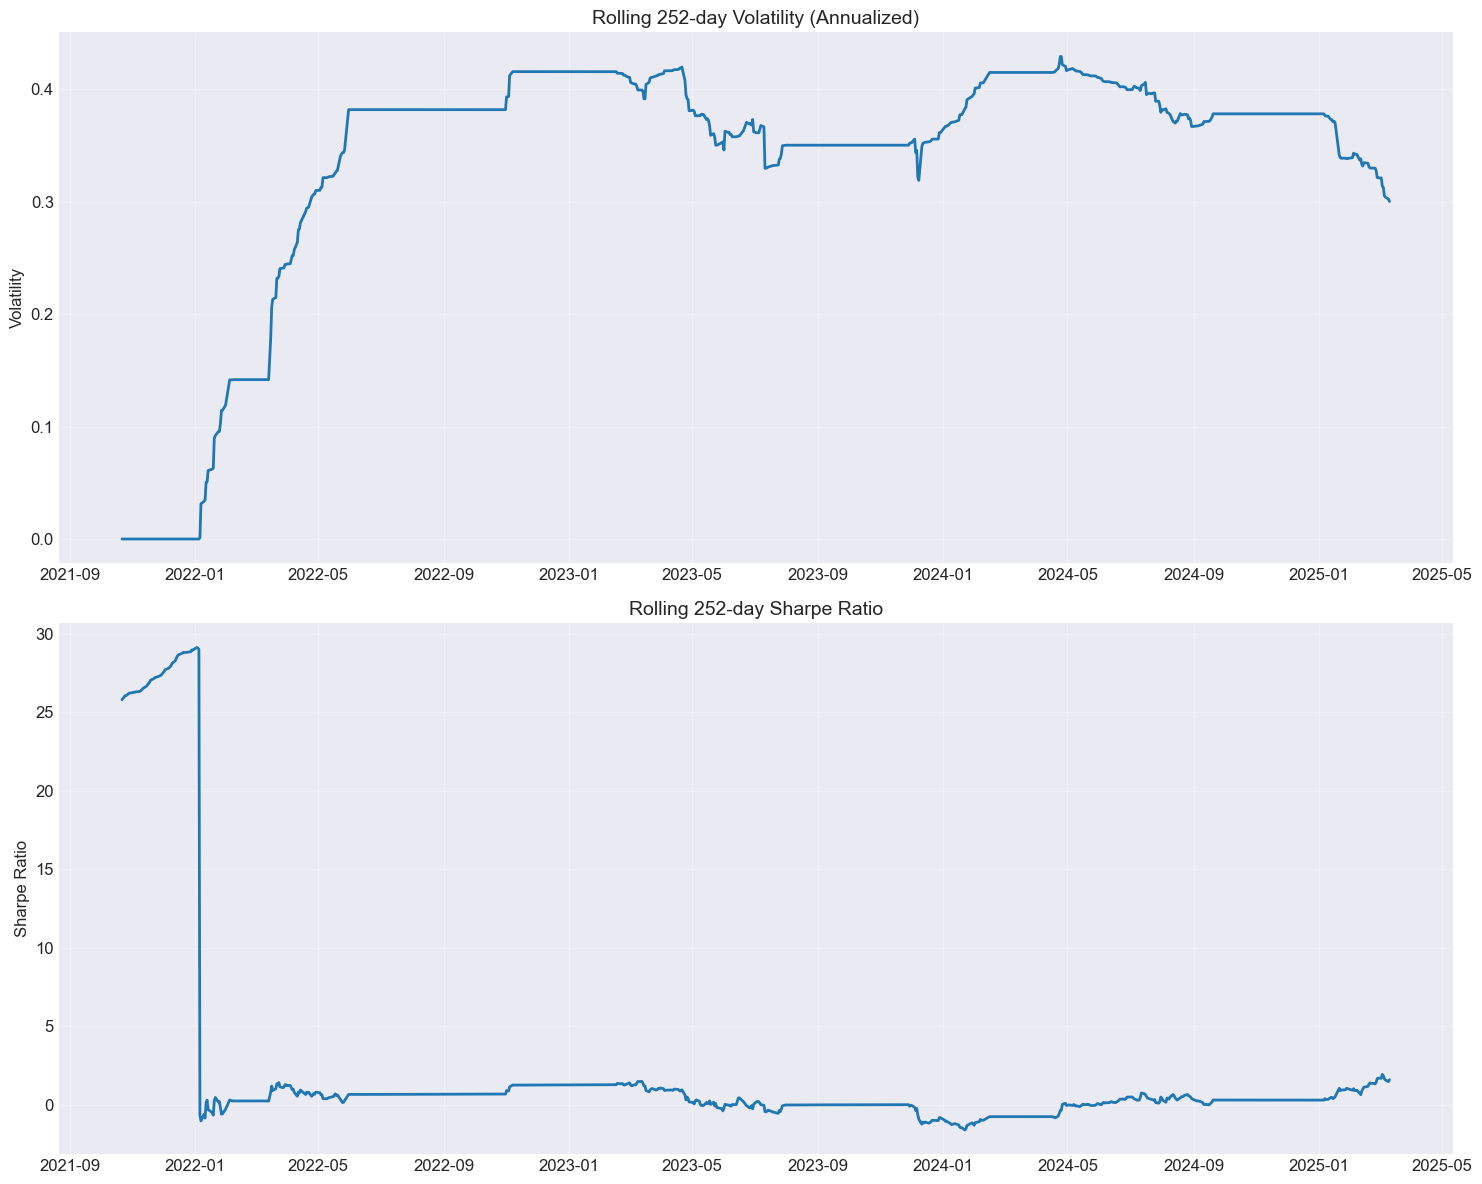

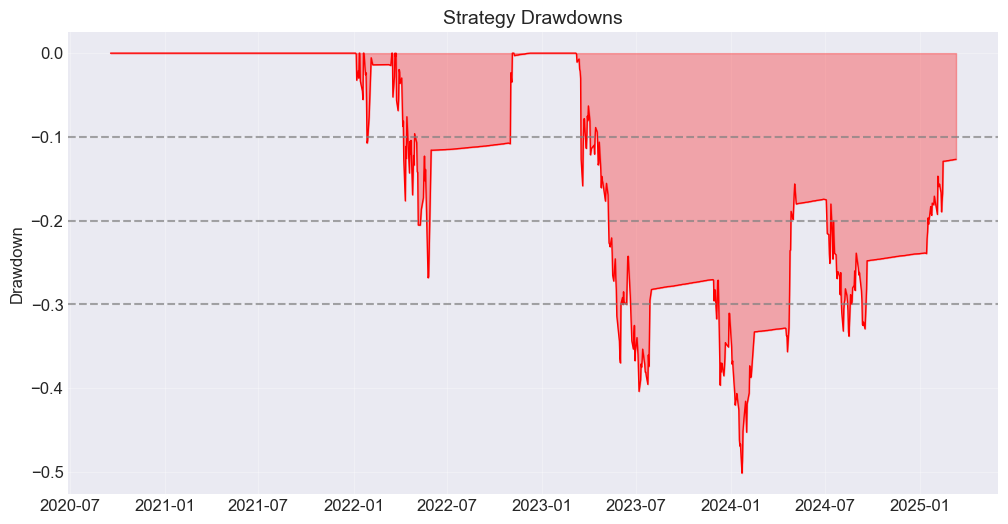

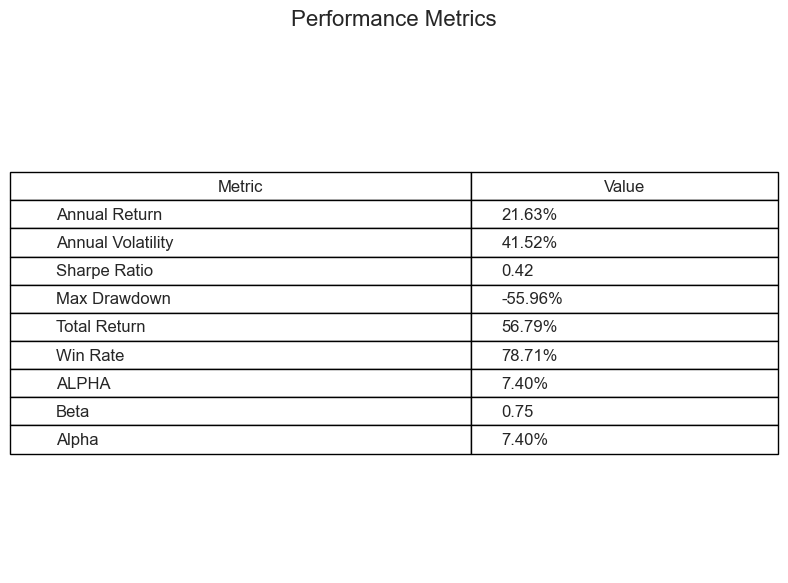

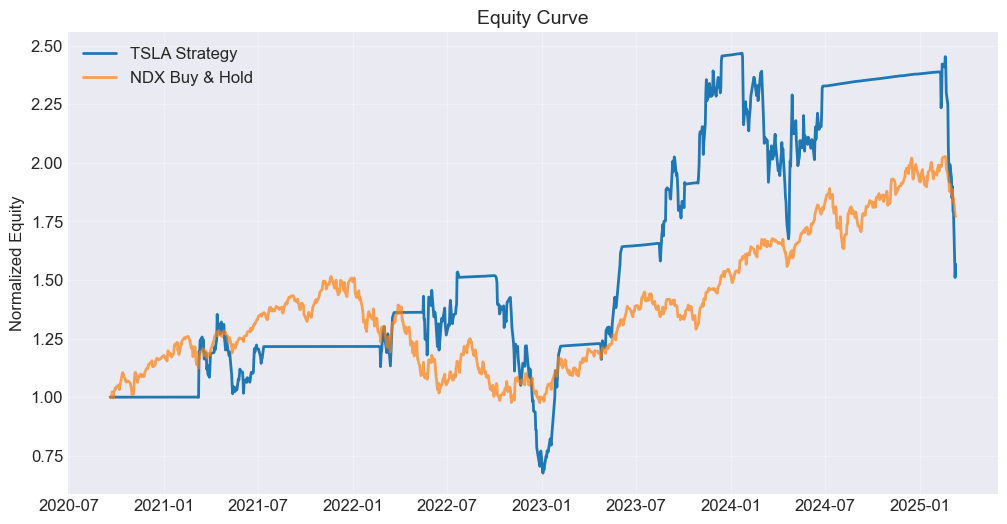

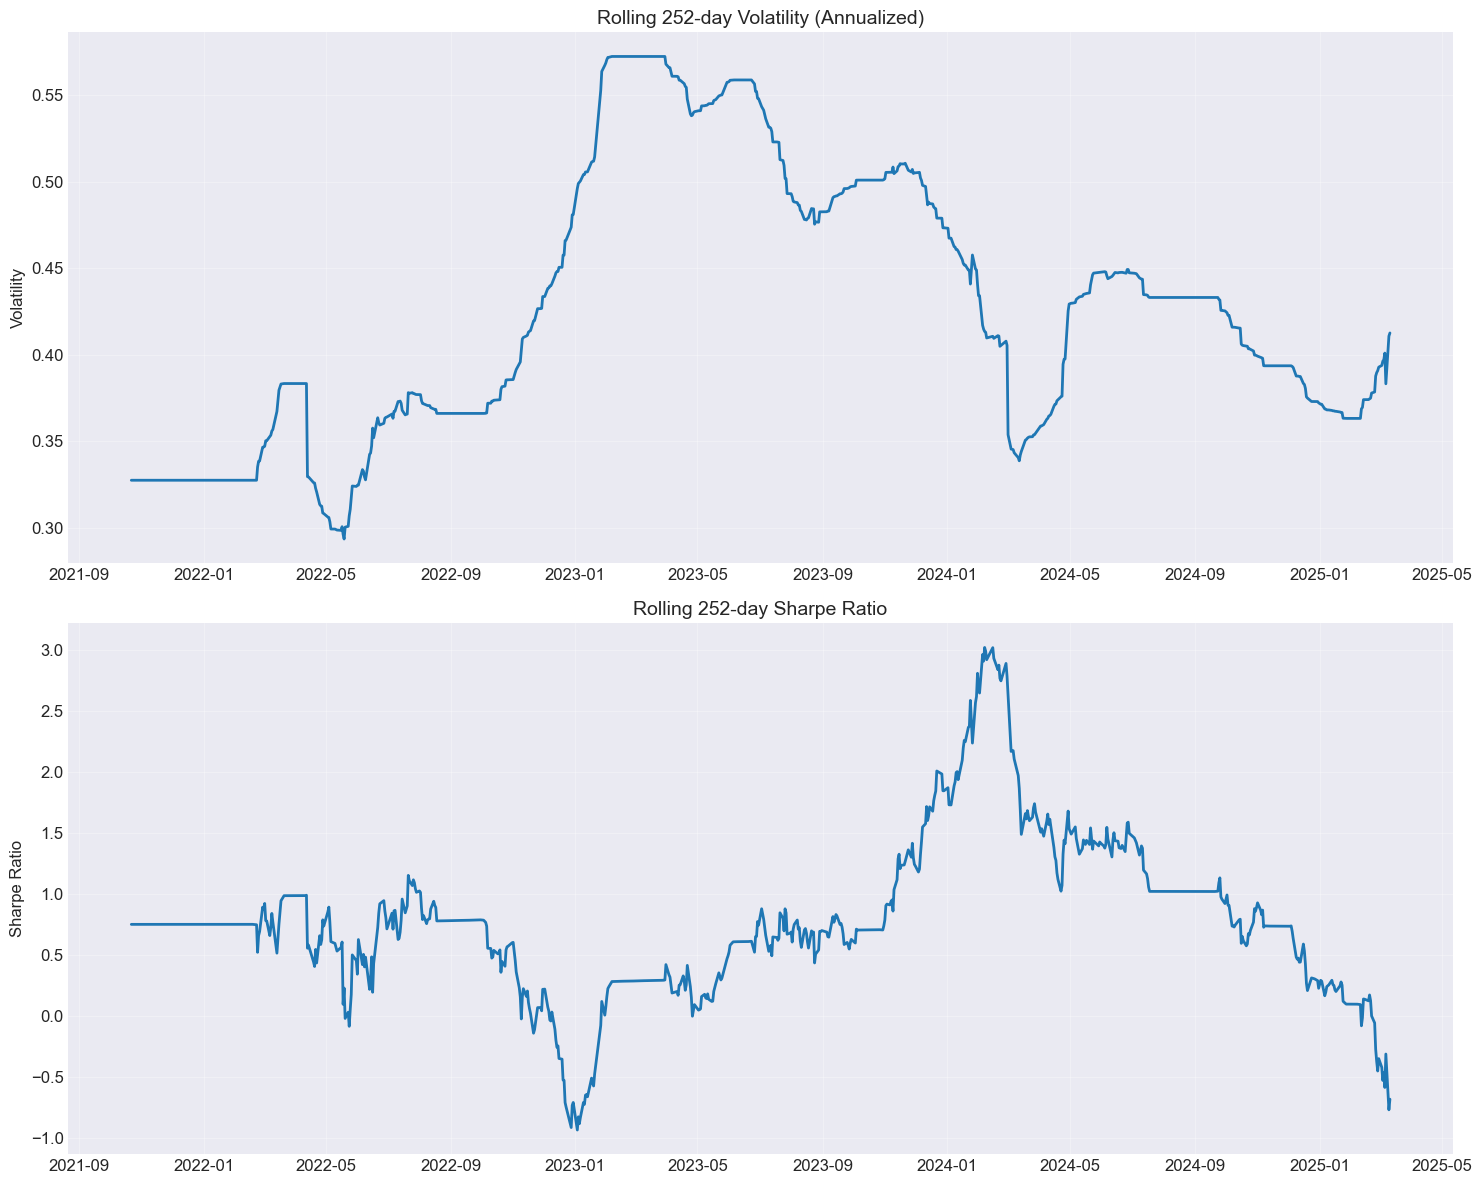

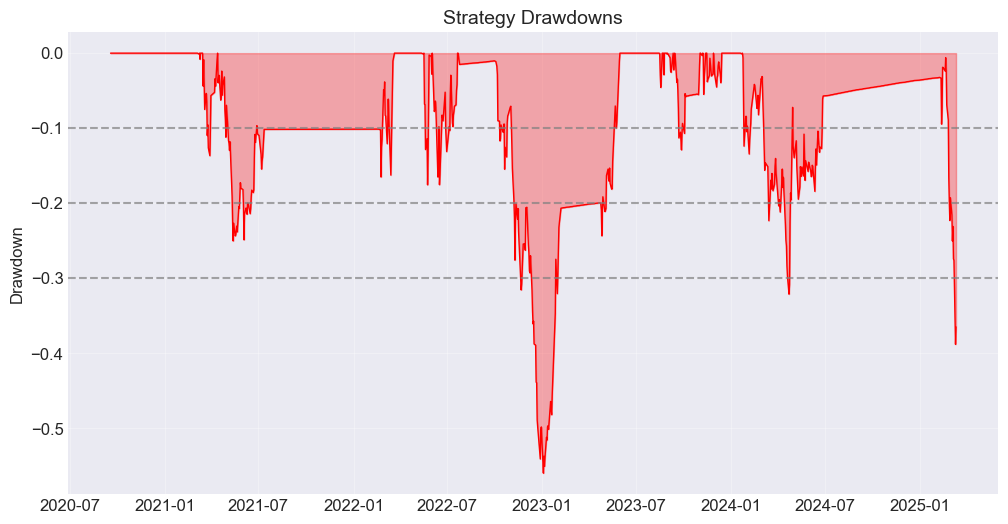

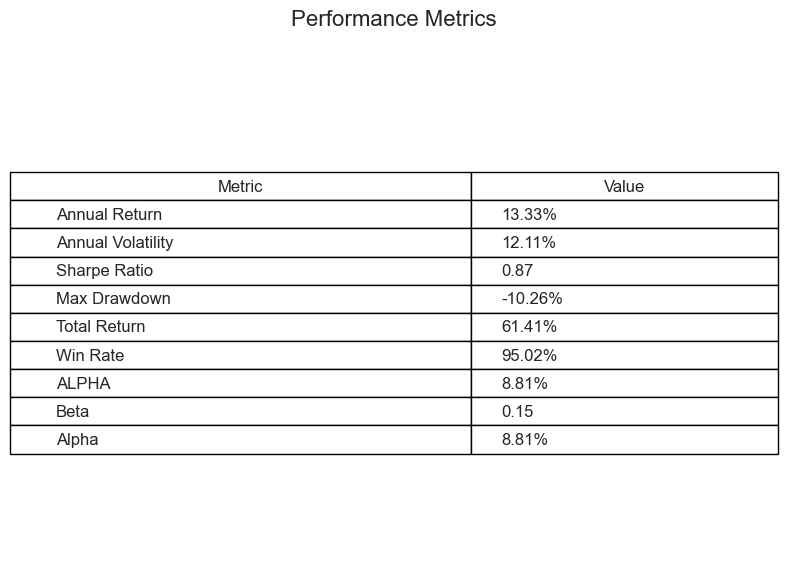

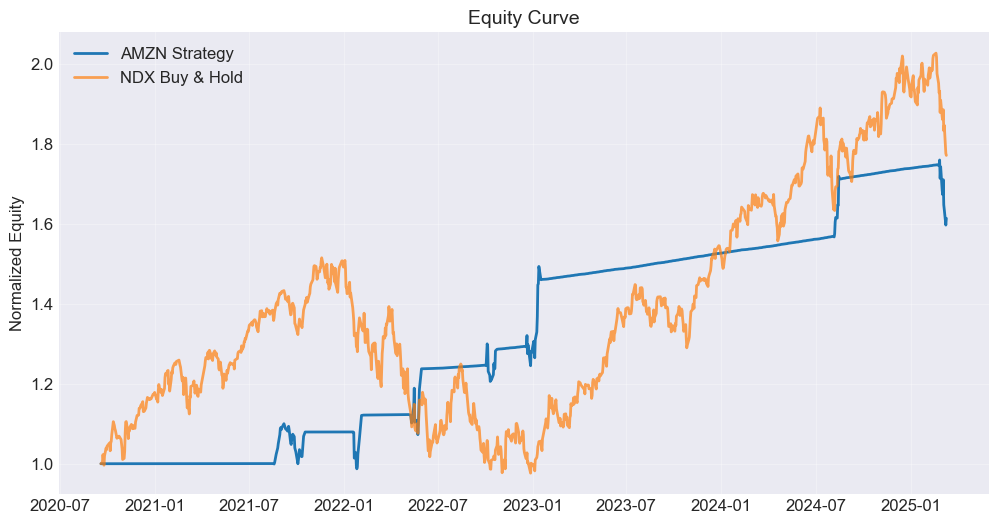

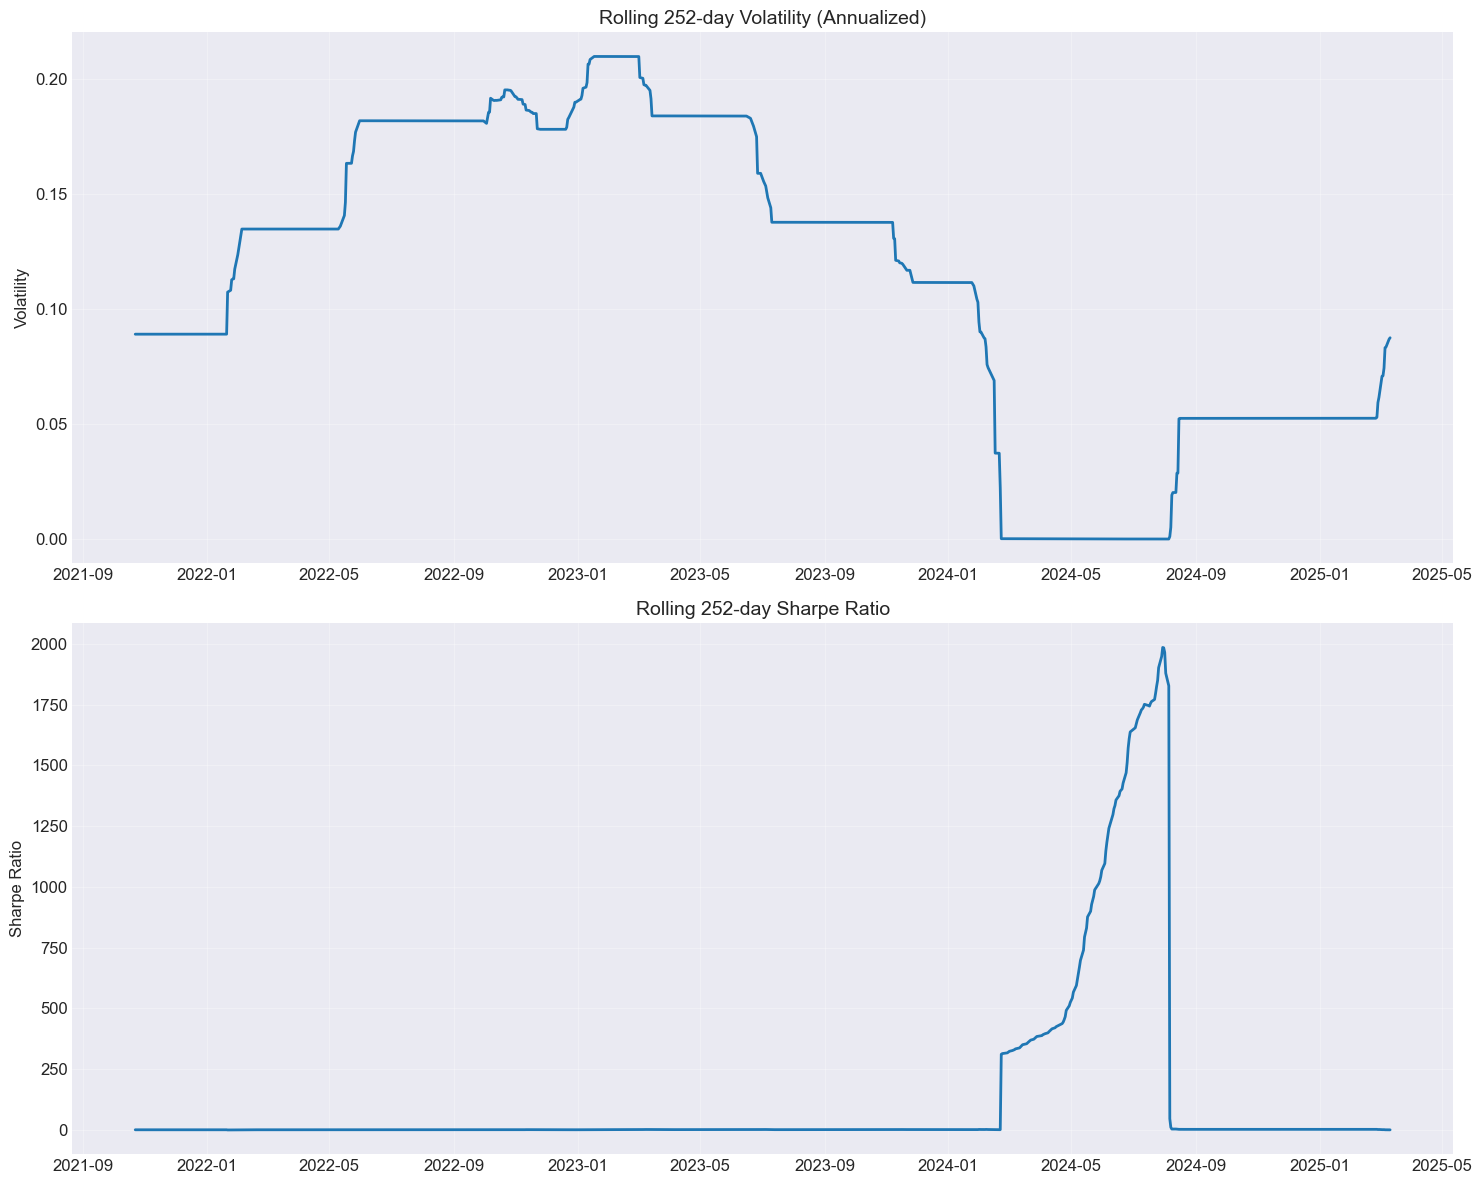

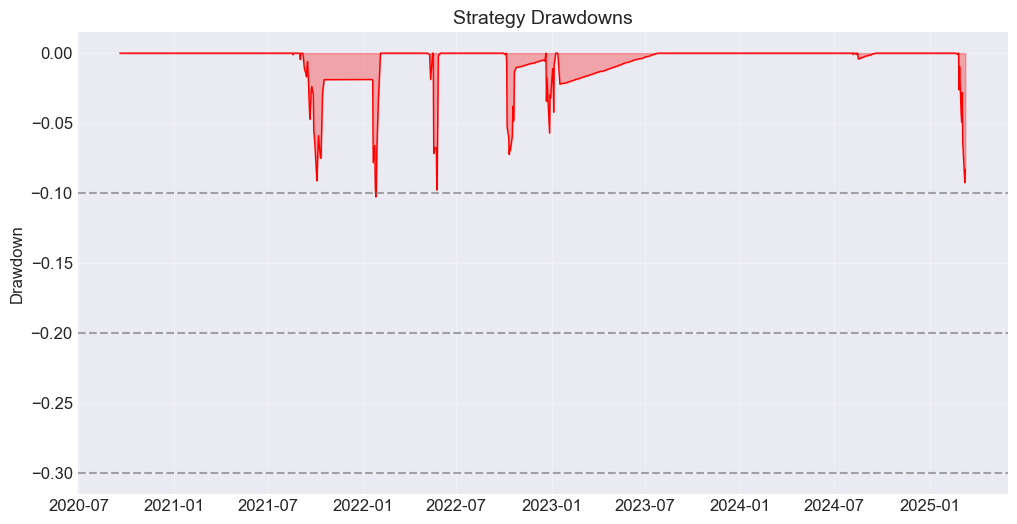

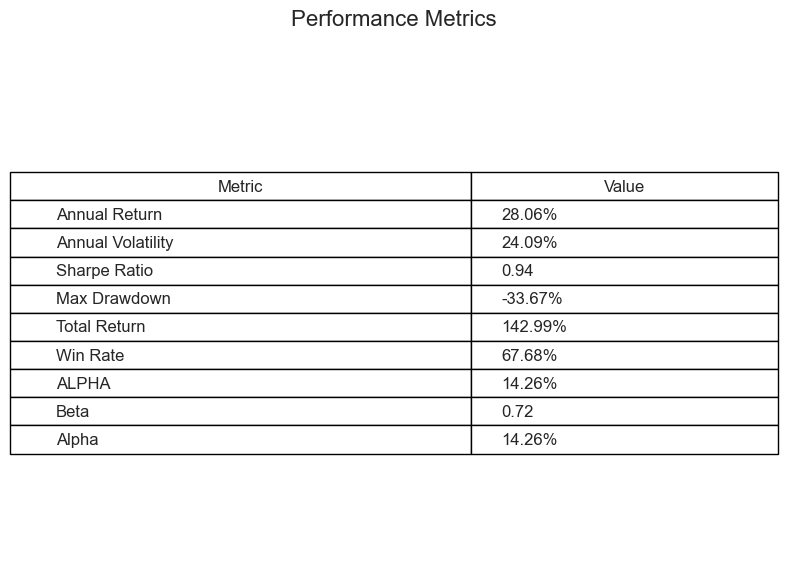

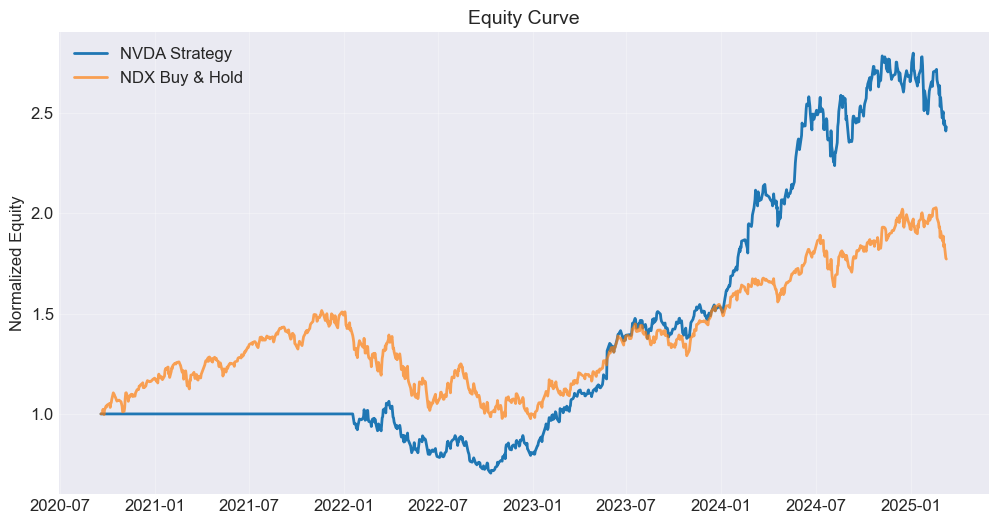

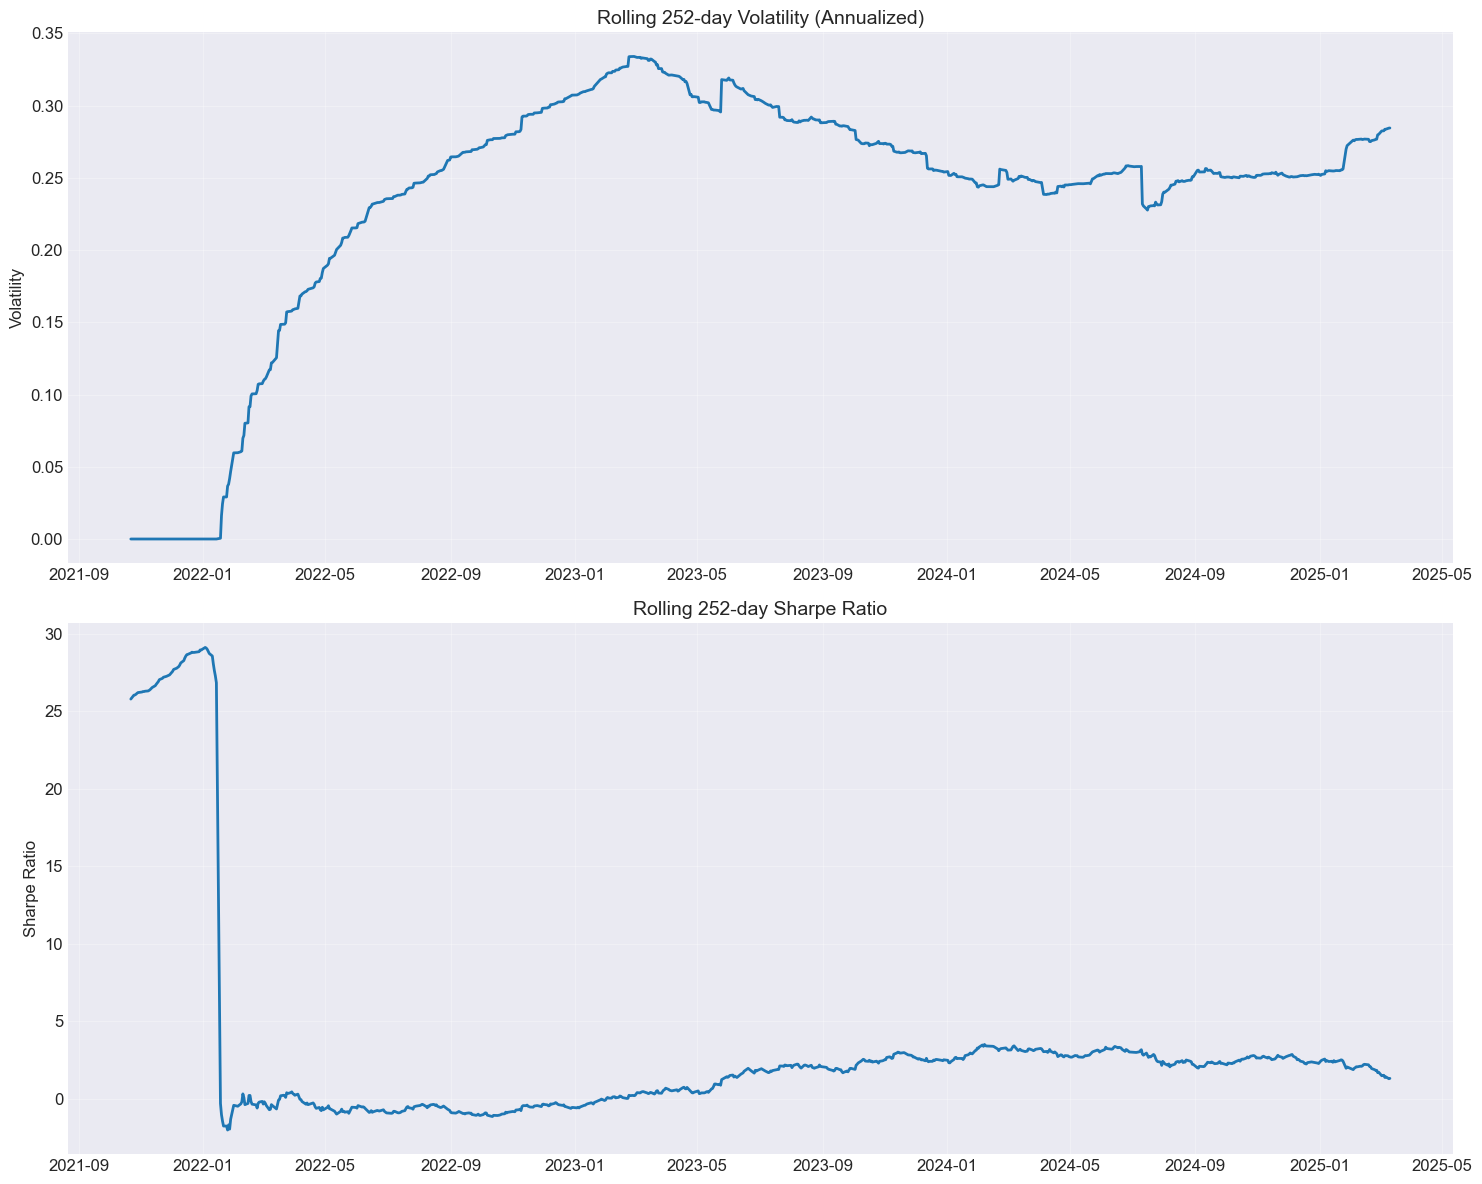

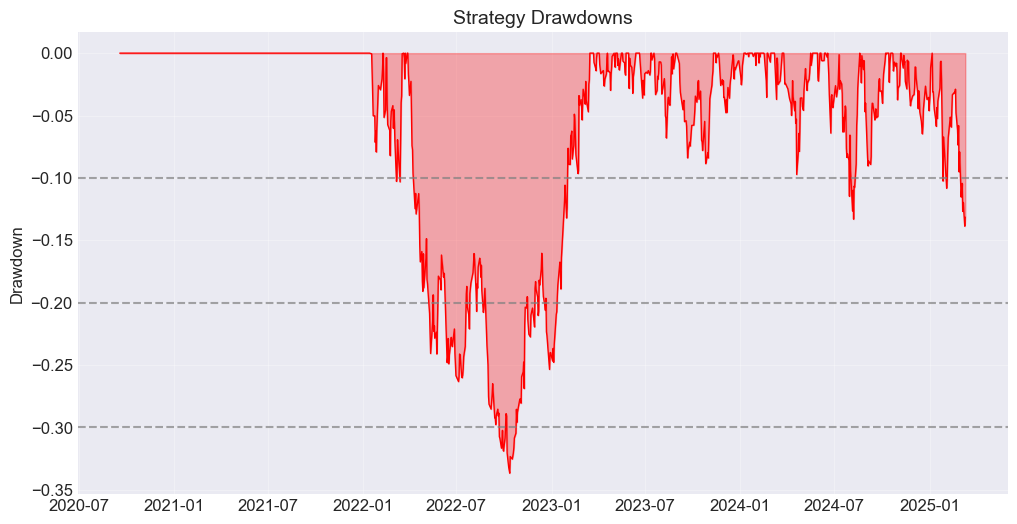

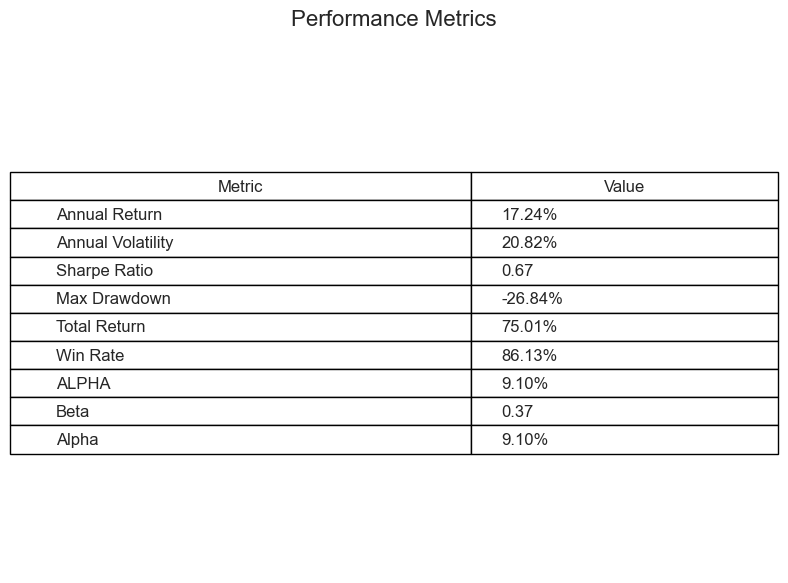

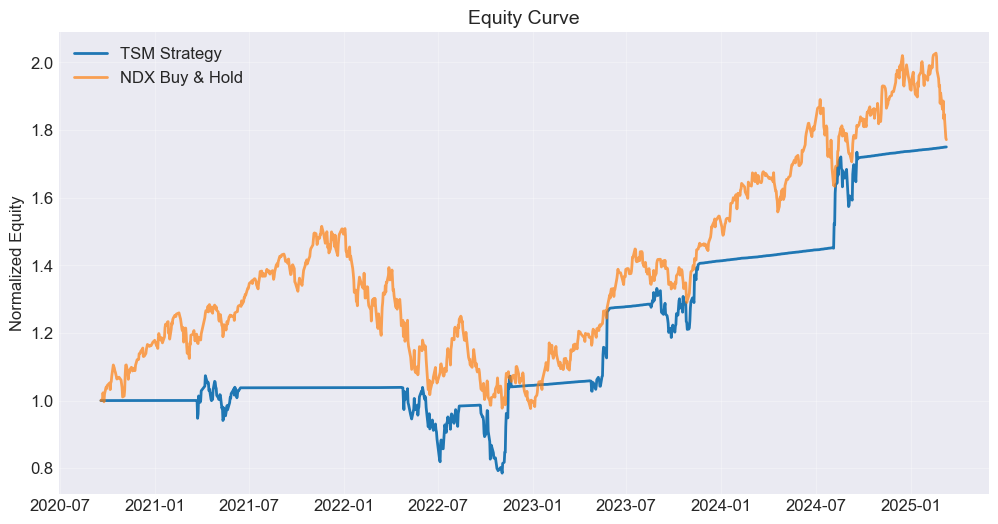

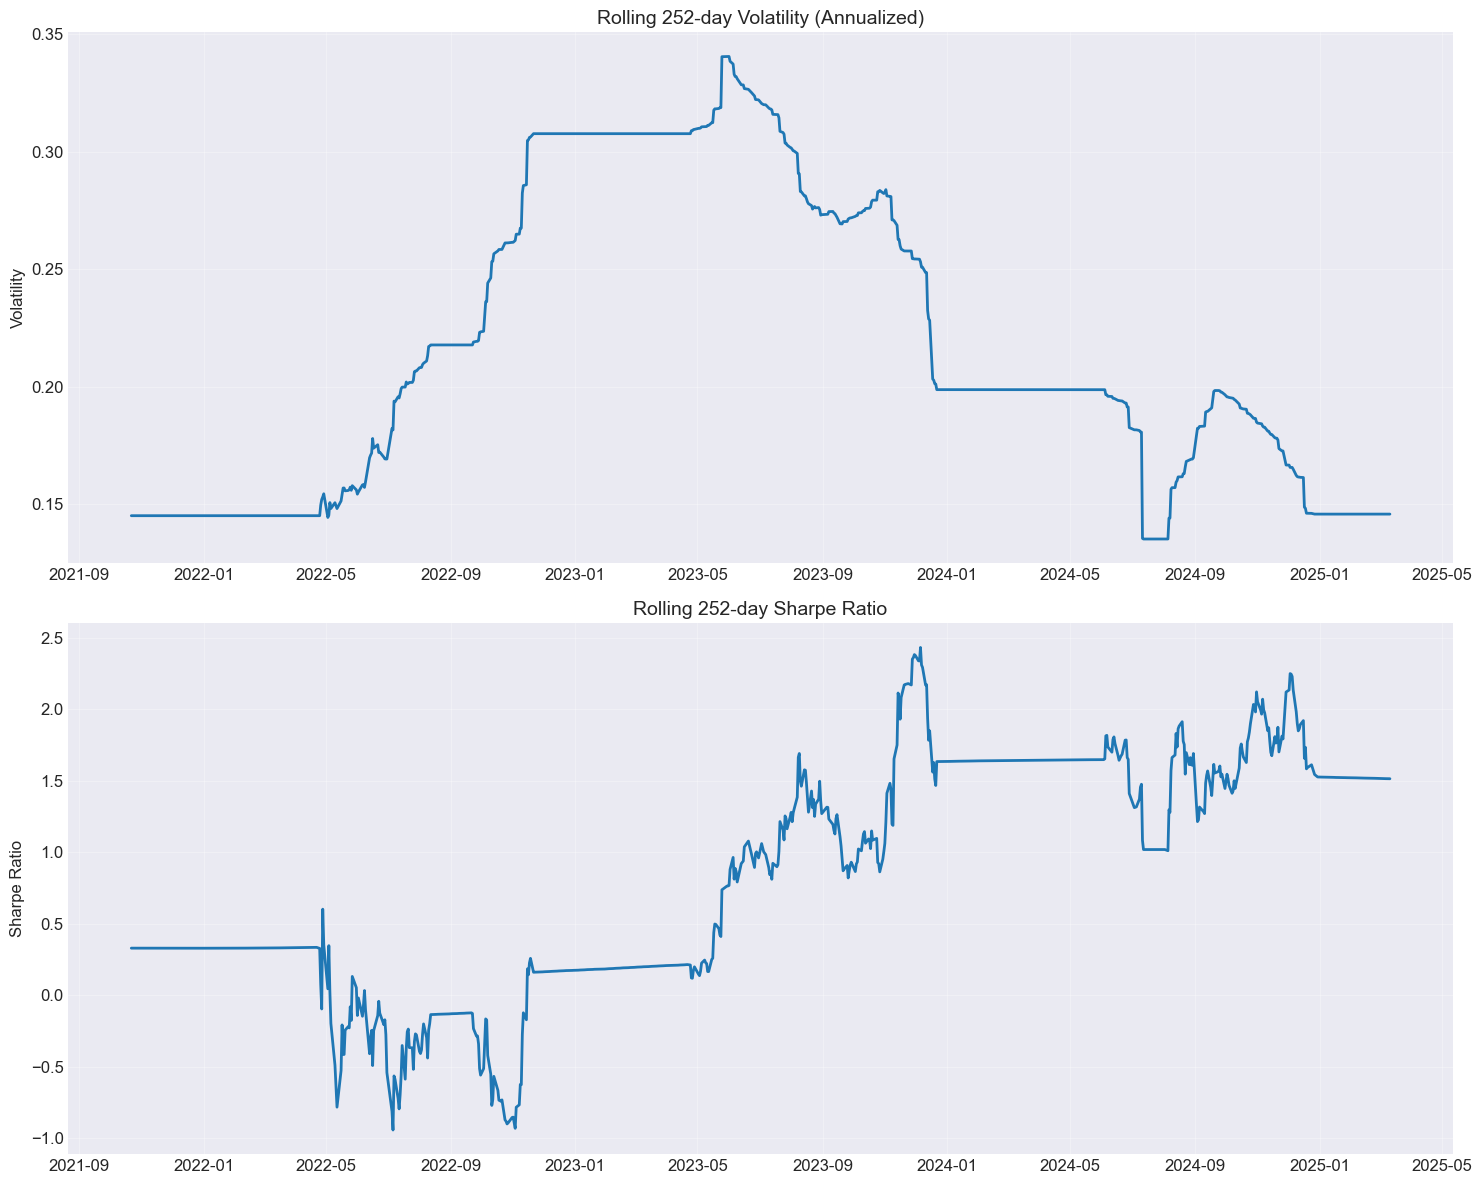

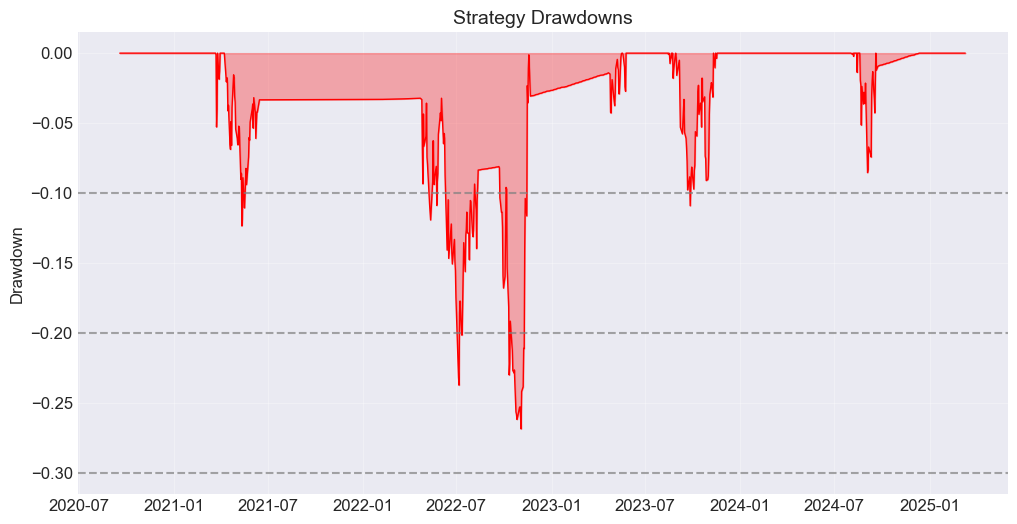

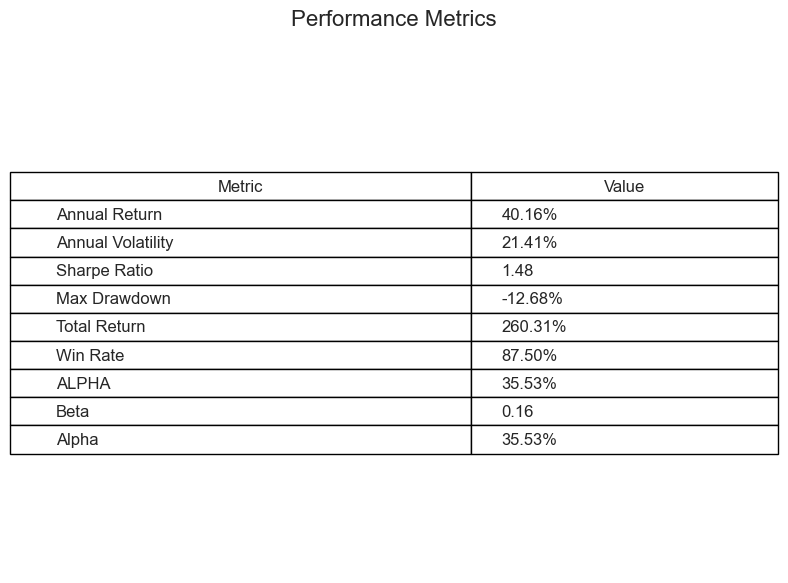

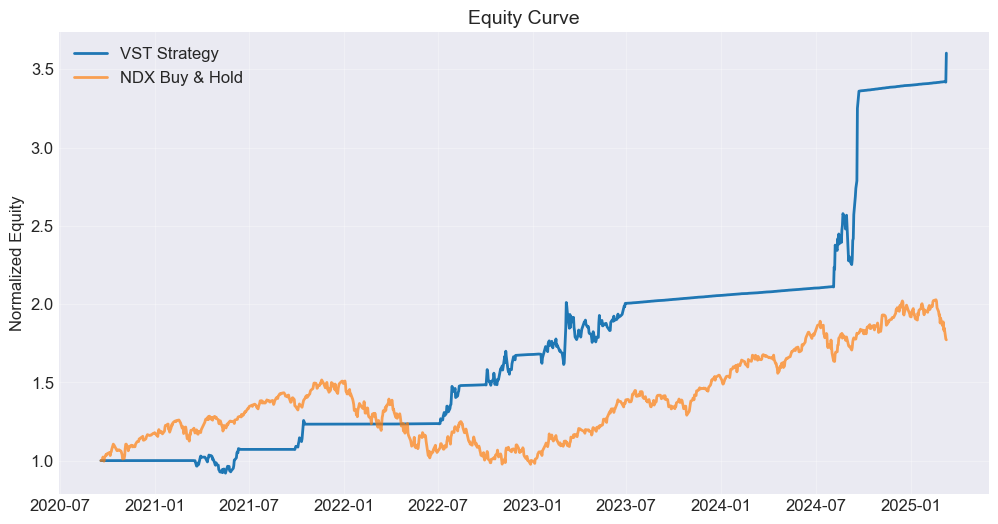

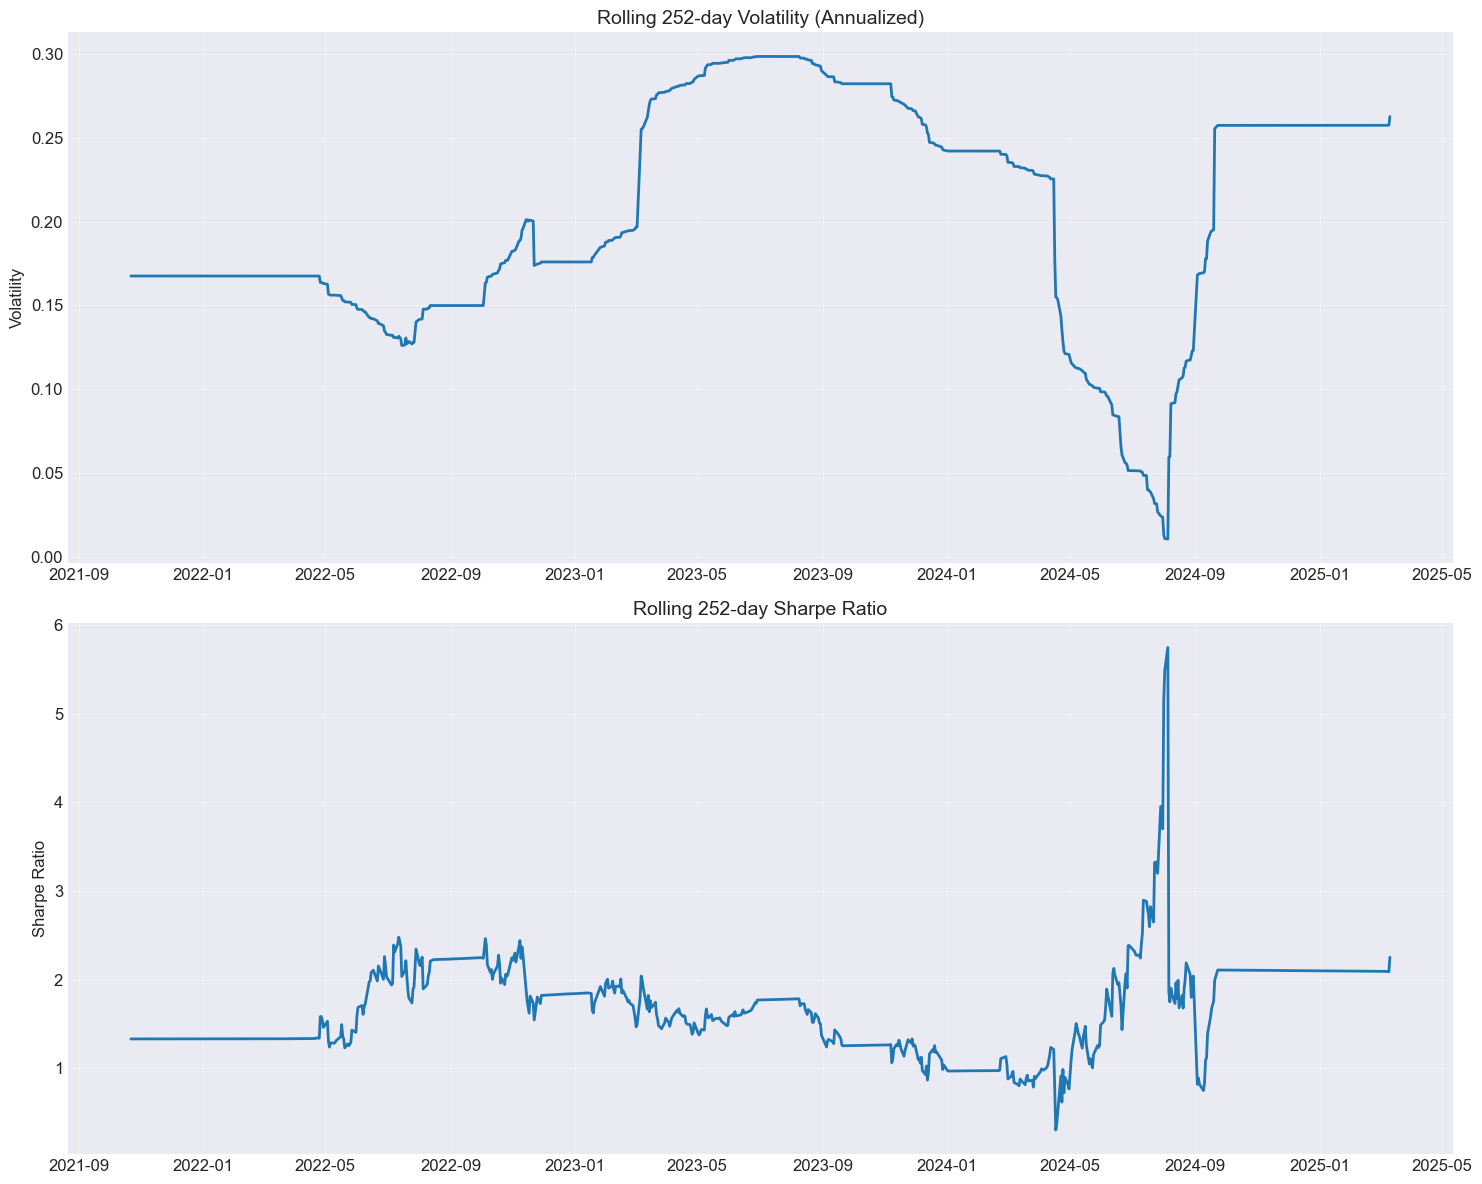

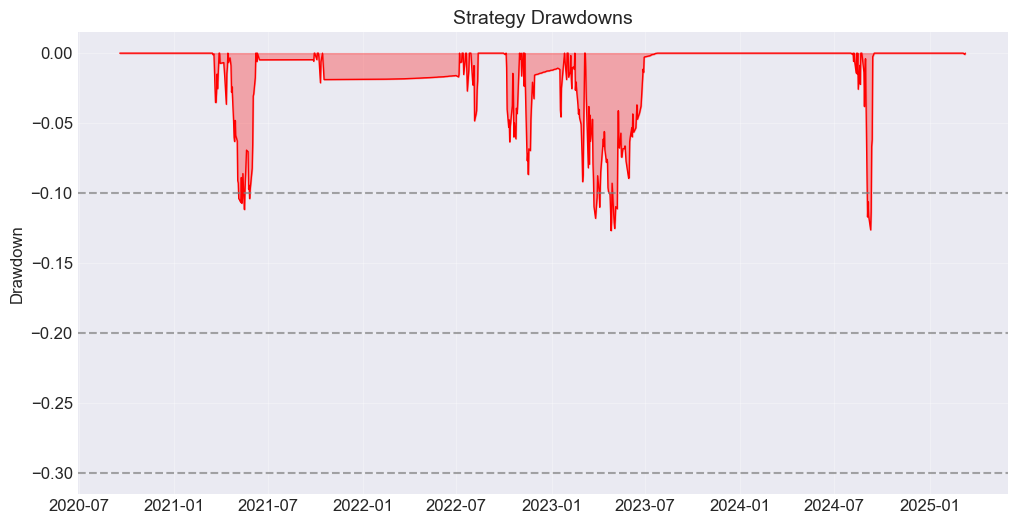

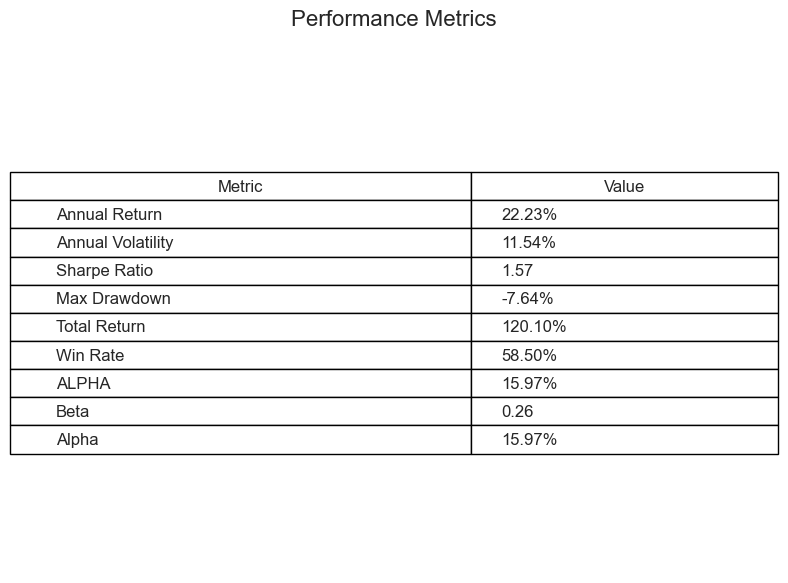

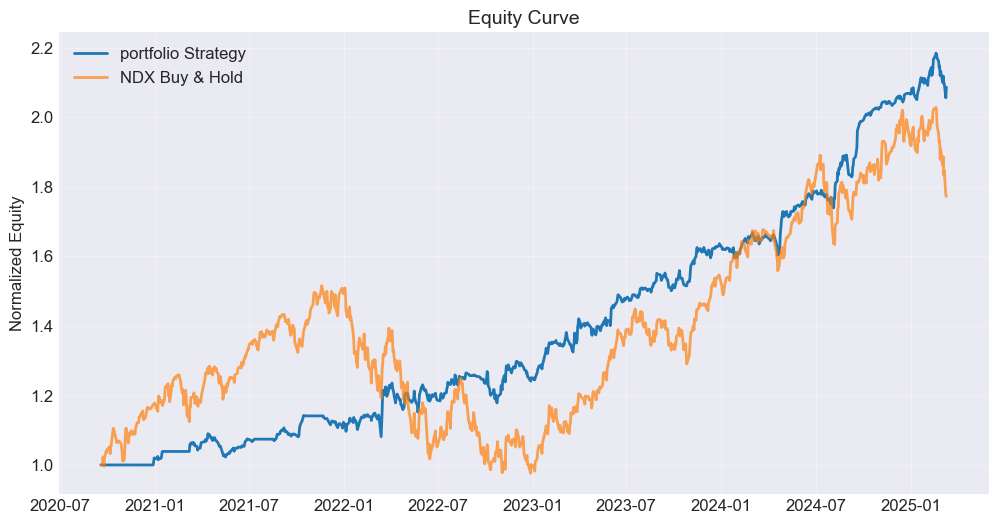

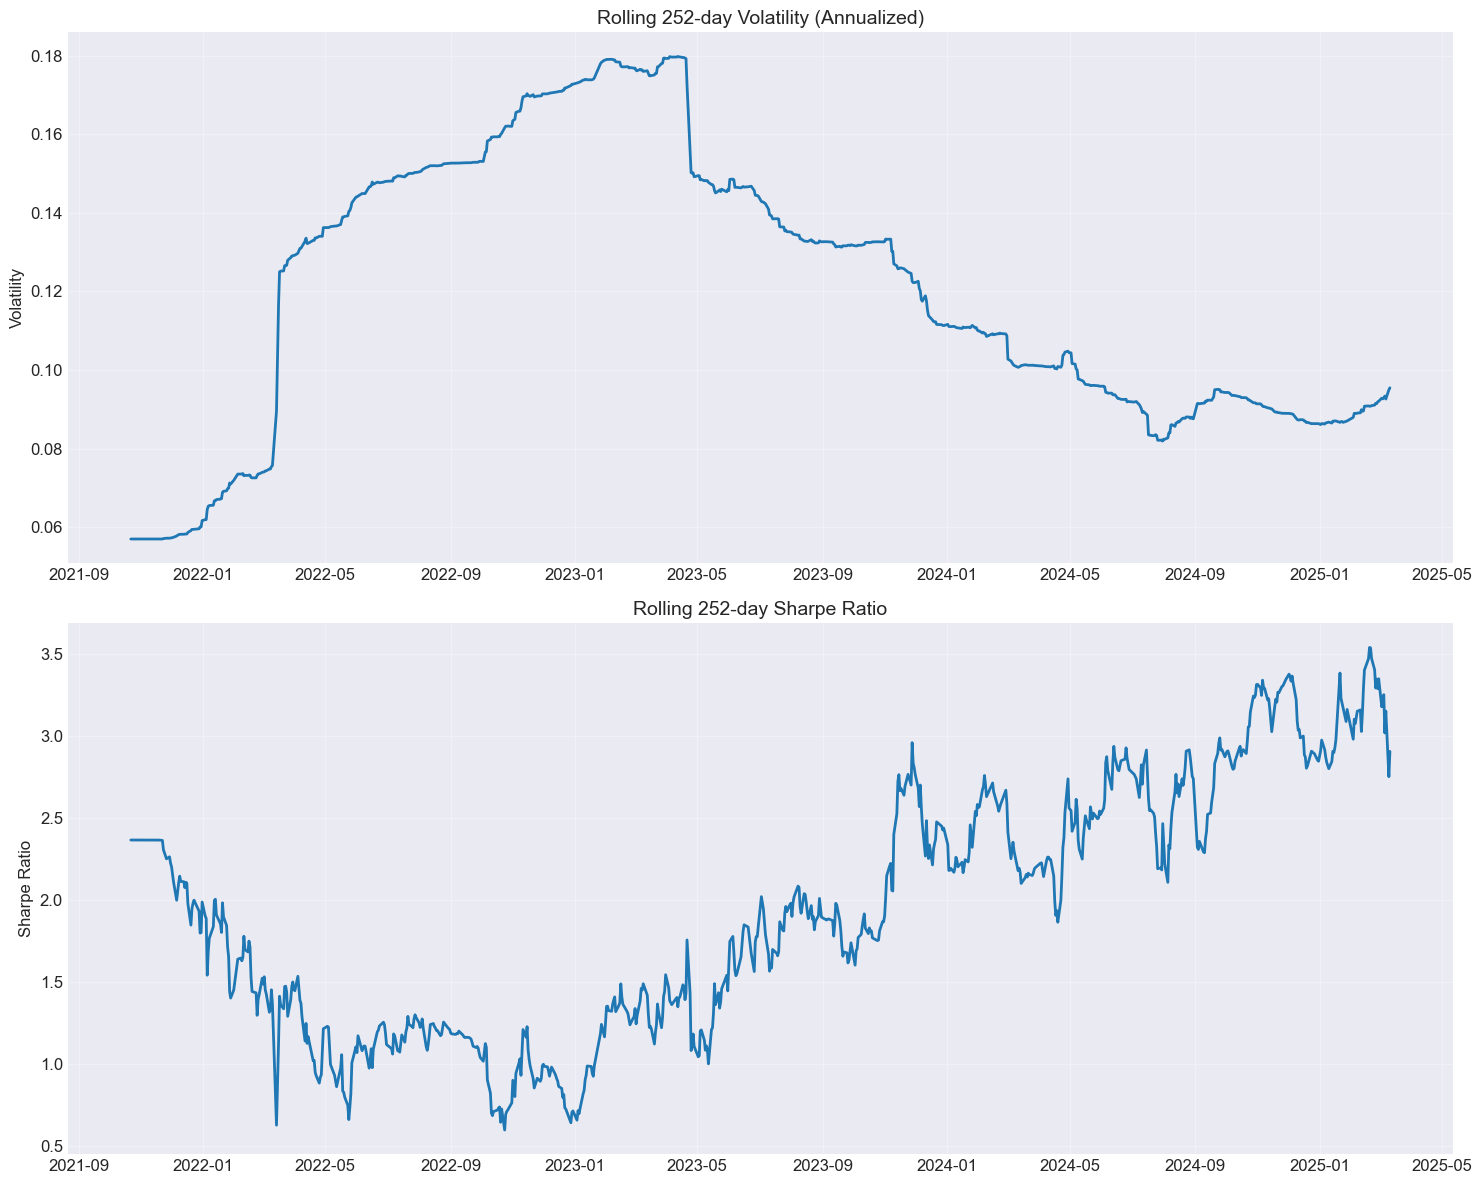

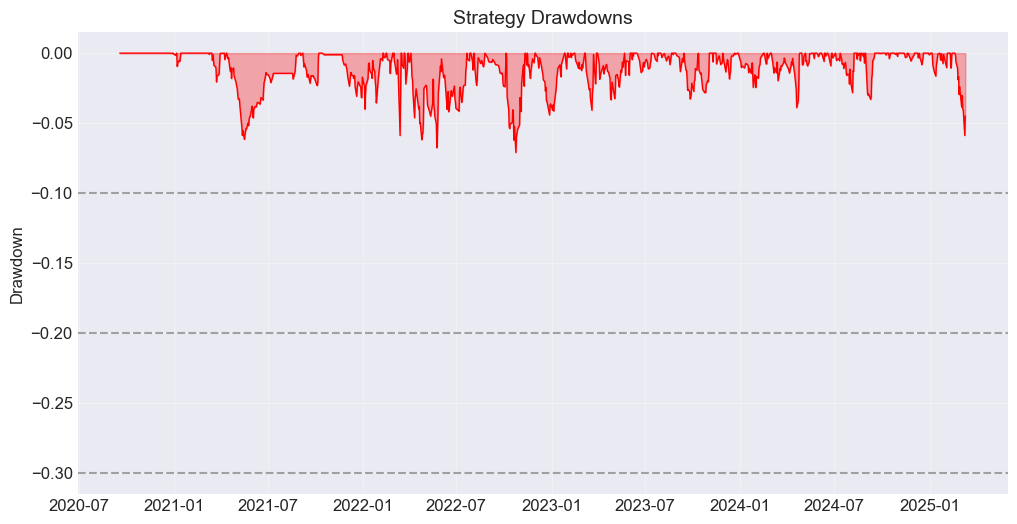

In [23]:
# with parameter-optimizaiton
backtest_columns = [
    'portfolio_close', 'portfolio_high', 'portfolio_low', 'portfolio_open', 'portfolio_volume',
    f'{benchmark}_close', f'{benchmark}_high', f'{benchmark}_low', f'{benchmark}_open', f'{benchmark}_volume',
    'portfolio_daily_return', 'portfolio_log_return', 'portfolio_kdj_k', 'portfolio_kdj_d',
    'portfolio_kdj_j', 'portfolio_kdj_j_weekly', 'portfolio_signal', 'portfolio_kdj_j_weighted',
    'portfolio_position_size', 'portfolio_position', 'portfolio_equity', 'portfolio_cash',
    'portfolio_holdings', 'portfolio_trade', 'portfolio_commission', 'portfolio_slippage',
    'portfolio_strategy_return', 'portfolio_cum_return'
]

otc_china_stocks = [
    #"LKNCY",
    "9988.HK",  # 阿里巴巴 (Alibaba)
    "0700.HK",  # 腾讯 (Tencent) - OTC 没数据
    "3690.HK",  # 美团 (Meituan) - OTC
    "1810.HK",  # 小米 (Xiaomi) - OTC
    "2331.Hk",

    "TSLA",
    "AMZN",
    "NVDA",
    "TSM",
    "VST"
]

param_grid = {
    'k_period': [9],
    'j_buy_threshold': [-5, 0, 5],
    'j_sell_threshold': [70, 90],
    'daily_enabled': [True],
    'weekly_enabled': [True],
    'position_size': [0.5, 1.0],
    'weekly_weight':[0.5, 1.0]
}

optimize = True

# initial
ticker = otc_china_stocks[0]
data = fetch_data(ticker, period=period, benchmark=benchmark)
data = preprocess_data(data, ticker)
time_list = data.index[140:]
backtest_results = pd.DataFrame(0, columns=backtest_columns, index=time_list)


for ticker in otc_china_stocks:
    data = fetch_data(ticker, period=period, benchmark=benchmark)
    data = preprocess_data(data, ticker)
    data = data.loc[time_list]

    if optimize == True:
        grid_search = GridSearch(
            data=data,
            ticker=ticker,
            strategy_class=KDJStrategy,
            param_grid=param_grid,
            metric='sharpe_ratio',
            maximize=True,
            n_jobs=1  
        )
        grid_search.fit()

        strategy = KDJStrategy(ticker, grid_search.best_params)

    else:
        strategy = KDJStrategy(ticker, strategy_params)

    # prepared_data = strategy.prepare_data(data)
    # signals_data = strategy.generate_signals(prepared_data)
    # signals_data = signals_data.dropna()

    engine = BacktestEngine(initial_capital=initial_capital, risk_free_rate=get_risk_free_rate())
    backtest_result = engine.run(data, ticker, strategy)


    # backtest for each ticker
    metrics = calculate_returns(backtest_result, ticker, benchmark)
    generate_performance_report(metrics)
    engine.plot_equity_curve(backtest_result, ticker, benchmark)
    plot_rolling_metrics(backtest_result, ticker)
    engine.plot_drawdowns(backtest_result, ticker)

    # add each backtest result into a single result
    backtest_result.columns  =  backtest_columns
    common_index = backtest_results.index.intersection(backtest_result.index)
    backtest_results = backtest_results.loc[common_index]
    backtest_result = backtest_result.loc[common_index]
    backtest_results = backtest_results + backtest_result


backtest_results = backtest_results/len(otc_china_stocks)
ticker = 'portfolio'

metrics = calculate_returns(backtest_results, ticker, benchmark)
generate_performance_report(metrics)

engine.plot_equity_curve(backtest_results, ticker, benchmark)
plot_rolling_metrics(backtest_results, ticker)
engine.plot_drawdowns(backtest_results, ticker)

In [24]:
backtest_results.columns

Index(['portfolio_close', 'portfolio_high', 'portfolio_low', 'portfolio_open',
       'portfolio_volume', 'NDX_close', 'NDX_high', 'NDX_low', 'NDX_open',
       'NDX_volume', 'portfolio_daily_return', 'portfolio_log_return',
       'portfolio_kdj_k', 'portfolio_kdj_d', 'portfolio_kdj_j',
       'portfolio_kdj_j_weekly', 'portfolio_signal',
       'portfolio_kdj_j_weighted', 'portfolio_position_size',
       'portfolio_position', 'portfolio_equity', 'portfolio_cash',
       'portfolio_holdings', 'portfolio_trade', 'portfolio_commission',
       'portfolio_slippage', 'portfolio_strategy_return',
       'portfolio_cum_return'],
      dtype='object')

[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', '9988.HK'), ('High', '9988.HK'), ('Low', '9988.HK'), ('Open', '9988.HK'), ('Volume', '9988.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2019-11-26  186.966522  188.860100  186.368542  186.368542  74549578
2019-11-27  192.547607  194.640522  188.660783  189.358416  53617241
2019-11-28  203.311127  203.510448  196.235096  196.334765  41816834
2019-11-29  197.730042  204.108439  196.833087  203.311138  36509531
2019-12-02  194.839844  198.228357  193.344909  197.331402  26592325


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
[*********************100%***********************]  1 of 1 completed


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556763  246.994373  245.047784  246.342549   83433000
2018-03-16  245.823059  246.889908  245.769271  246.092001  100343700
2018-03-19  242.496964  246.002321  240.820494  245.060996  109208400
2018-03-20  242.909409  243.554897  242.219078  242.900435   59757300
2018-03-21  242.443222  244.989307  242.228068  242.864583   78709600
Original columns: [('Close', '9988.HK'), ('High', '9988.HK'), ('Low', '9988.HK'), ('Open', '9988.HK'), ('Volume', '9988.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2019

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556717  246.994327  245.047738  246.342503   83433000
2018-03-16  245.823044  246.889893  245.769255  246.091986  100343700
2018-03-19  242.496994  246.002352  240.820525  245.061027  109208400
2018-03-20  242.909348  243.554836  242.219017  242.900374   59757300
2018-03-21  242.443192  244.989277  242.228038  242.864552   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', '0700.HK'), ('High', '0700.HK'), ('Low', '0700.HK'), ('Open', '0700.HK'), ('Volume', '0700.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2018-03-15  418.415863  419.665921  408.951067  410.022529  26796560
2018-03-16  415.380005  422.166087  415.380005  416.987227  25924828
2018-03-19  412.344116  420.023093  412.344116  415.201397  17667618
2018-03-20  416.630035  418.237258  407.165240  407.522404  23814243
2018-03-21  413.058441  424.666219  411.272622  421.630342  30638140


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556808  246.994419  245.047830  246.342595   83433000
2018-03-16  245.823029  246.889878  245.769240  246.091971  100343700
2018-03-19  242.497055  246.002414  240.820585  245.061089  109208400
2018-03-20  242.909409  243.554897  242.219078  242.900435   59757300
2018-03-21  242.443207  244.989292  242.228053  242.864568   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', '3690.HK'), ('High', '3690.HK'), ('Low', '3690.HK'), ('Open', '3690.HK'), ('Volume', '3690.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open     volume
Date                                                             
2018-09-20  72.650002  74.000000  72.000000  72.900002  115846804
2018-09-21  72.099998  74.000000  71.949997  74.000000   43838241
2018-09-24  69.000000  71.900002  69.000000  70.650002   31460064
2018-09-26  68.800003  69.599998  65.650002  69.349998   68632397
2018-09-27  67.000000  69.750000  65.650002  68.800003   29514806


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556747  246.994357  245.047769  246.342533   83433000
2018-03-16  245.822998  246.889847  245.769210  246.091940  100343700
2018-03-19  242.496964  246.002321  240.820494  245.060996  109208400
2018-03-20  242.909378  243.554866  242.219048  242.900404   59757300
2018-03-21  242.443207  244.989292  242.228053  242.864568   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '1810.HK'), ('High', '1810.HK'), ('Low', '1810.HK'), ('Open', '1810.HK'), ('Volume', '1810.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low  open     volume
Date                                                        
2018-07-09  16.799999  17.000000  16.000000  16.6  462182642
2018-07-10  19.000000  19.340000  17.000000  17.0  534072218
2018-07-11  19.000000  19.799999  18.299999  18.5  374721138
2018-07-12  19.260000  19.700001  19.020000  19.4  132592630
2018-07-13  21.450001  21.799999  19.520000  19.6  364065075
Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556747  246.994357  245.047769  246.342533   8343

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original columns: [('Close', '2331.HK'), ('High', '2331.HK'), ('Low', '2331.HK'), ('Open', '2331.HK'), ('Volume', '2331.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
               close      high       low      open    volume
Date                                                        
2018-03-15  7.653084  7.763465  7.524307  7.561100  13048985
2018-03-16  7.781861  7.809456  7.625488  7.643885  28663222
2018-03-19  7.800256  8.030217  7.708273  7.781860  20671542
2018-03-20  7.551901  7.791060  7.358734  7.791060  15193008
2018-03-21  7.165567  7.542702  7.064384  7.542702  19318600
Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556778  246.994388  245.047799  246.342564   8343

[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Open', 'TSLA'), ('Volume', 'TSLA')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open     volume
Date                                                             
2018-03-15  21.706667  22.190001  21.406668  21.958668   98472000
2018-03-16  21.423332  21.826668  21.271334  21.528667   91759500
2018-03-19  20.903999  21.383333  20.644667  21.100000  112264500
2018-03-20  20.703333  21.083332  20.584000  20.991333   71464500
2018-03-21  21.101999  21.496000  20.679333  20.683332   89376000


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556778  246.994388  245.047799  246.342564   83433000
2018-03-16  245.823029  246.889878  245.769240  246.091971  100343700
2018-03-19  242.497055  246.002414  240.820585  245.061089  109208400
2018-03-20  242.909424  243.554912  242.219094  242.900450   59757300
2018-03-21  242.443130  244.989215  242.227977  242.864491   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/performance_utils.py:271: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', 'AMZN'), ('High', 'AMZN'), ('Low', 'AMZN'), ('Open', 'AMZN'), ('Volume', 'AMZN')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open     volume
Date                                                             
2018-03-15  79.115997  79.845497  78.905502  79.750000   81394000
2018-03-16  78.584000  79.472000  78.375000  79.172501  108500000
2018-03-19  77.246498  78.083000  76.267502  77.726501  131616000
2018-03-20  79.325500  79.349998  77.270500  77.516998   91632000
2018-03-21  79.093002  79.500000  78.158501  79.322502   95016000


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556763  246.994373  245.047784  246.342549   83433000
2018-03-16  245.822998  246.889847  245.769210  246.091940  100343700
2018-03-19  242.496994  246.002352  240.820525  245.061027  109208400
2018-03-20  242.909439  243.554927  242.219109  242.900465   59757300
2018-03-21  242.443222  244.989307  242.228068  242.864583   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', 'NVDA'), ('High', 'NVDA'), ('Low', 'NVDA'), ('Open', 'NVDA'), ('Volume', 'NVDA')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
               close      high       low      open     volume
Date                                                         
2018-03-15  6.169387  6.250544  6.127324  6.168150  401952000
2018-03-16  6.197594  6.216646  6.148108  6.185717  399456000
2018-03-19  5.963031  6.169634  5.864060  6.140685  713772000
2018-03-20  6.175325  6.214172  5.966001  5.966001  554696000
2018-03-21  6.150088  6.235203  6.119654  6.168892  438688000


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556747  246.994357  245.047769  246.342533   83433000
2018-03-16  245.823074  246.889924  245.769286  246.092016  100343700
2018-03-19  242.496964  246.002321  240.820494  245.060996  109208400
2018-03-20  242.909378  243.554866  242.219048  242.900404   59757300
2018-03-21  242.443207  244.989292  242.228053  242.864568   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', 'TSM'), ('High', 'TSM'), ('Low', 'TSM'), ('Open', 'TSM'), ('Volume', 'TSM')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open   volume
Date                                                           
2018-03-15  37.892086  38.176423  37.540845  37.716464  3942200
2018-03-16  37.607754  38.067710  37.574302  37.632841  8125600
2018-03-19  37.298328  37.524126  36.955452  37.398685  5116500
2018-03-20  37.490677  37.557578  37.231427  37.381959  6404200
2018-03-21  37.381950  37.507391  37.005621  37.273232  7036400


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556824  246.994434  245.047845  246.342610   83433000
2018-03-16  245.823013  246.889862  245.769225  246.091955  100343700
2018-03-19  242.496979  246.002336  240.820509  245.061012  109208400
2018-03-20  242.909409  243.554897  242.219078  242.900435   59757300
2018-03-21  242.443176  244.989261  242.228023  242.864537   78709600


[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', 'VST'), ('High', 'VST'), ('Low', 'VST'), ('Open', 'VST'), ('Volume', 'VST')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                close       high        low       open   volume
Date                                                           
2018-03-15  17.794765  17.837768  17.459339  17.528144  5541200
2018-03-16  17.571148  17.846369  17.502343  17.794765  4212200
2018-03-19  17.141111  17.528140  17.020703  17.528140  4342900
2018-03-20  17.046511  17.295931  16.930402  17.201323  3759900
2018-03-21  17.330330  17.459339  17.020707  17.080912  4039700
Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-15  245.556732  246.994342  245.047754  246.342518   834

/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
[*********************100%***********************]  1 of 1 completed
/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')


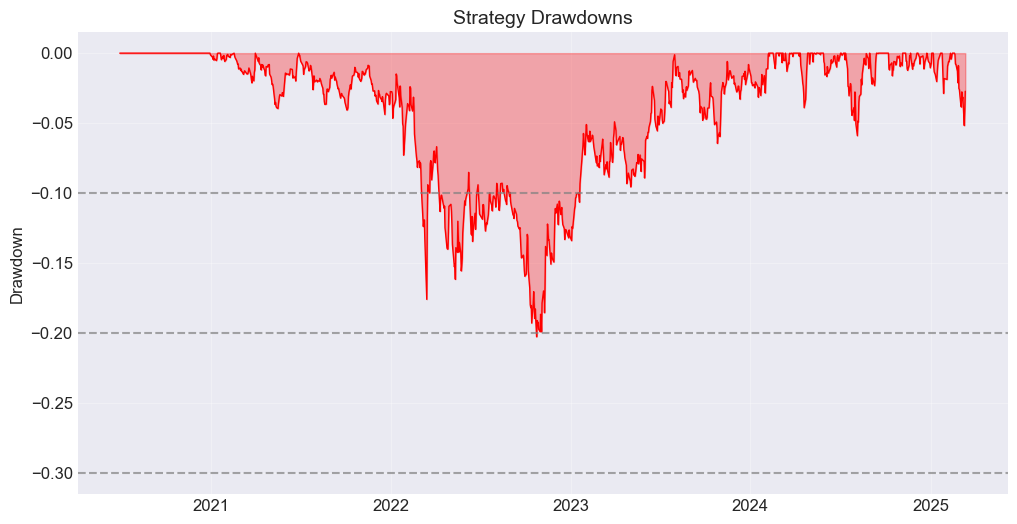

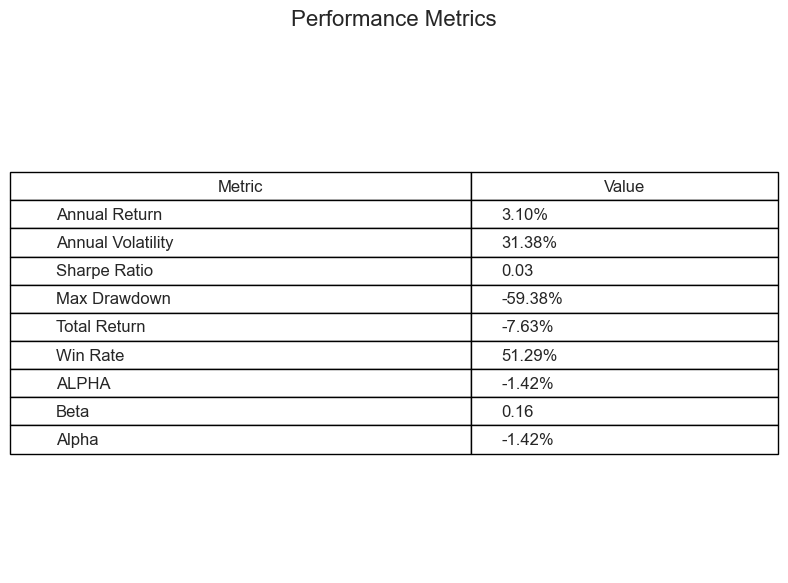

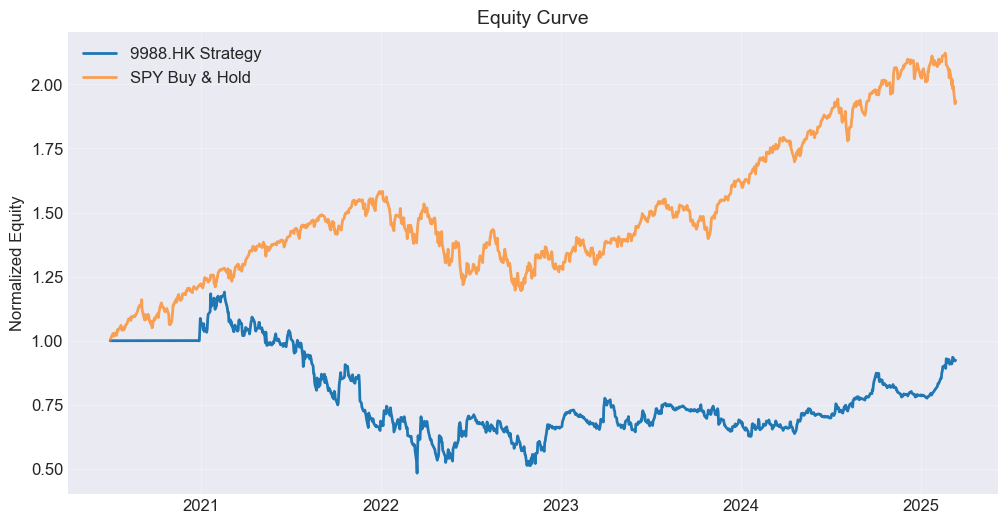

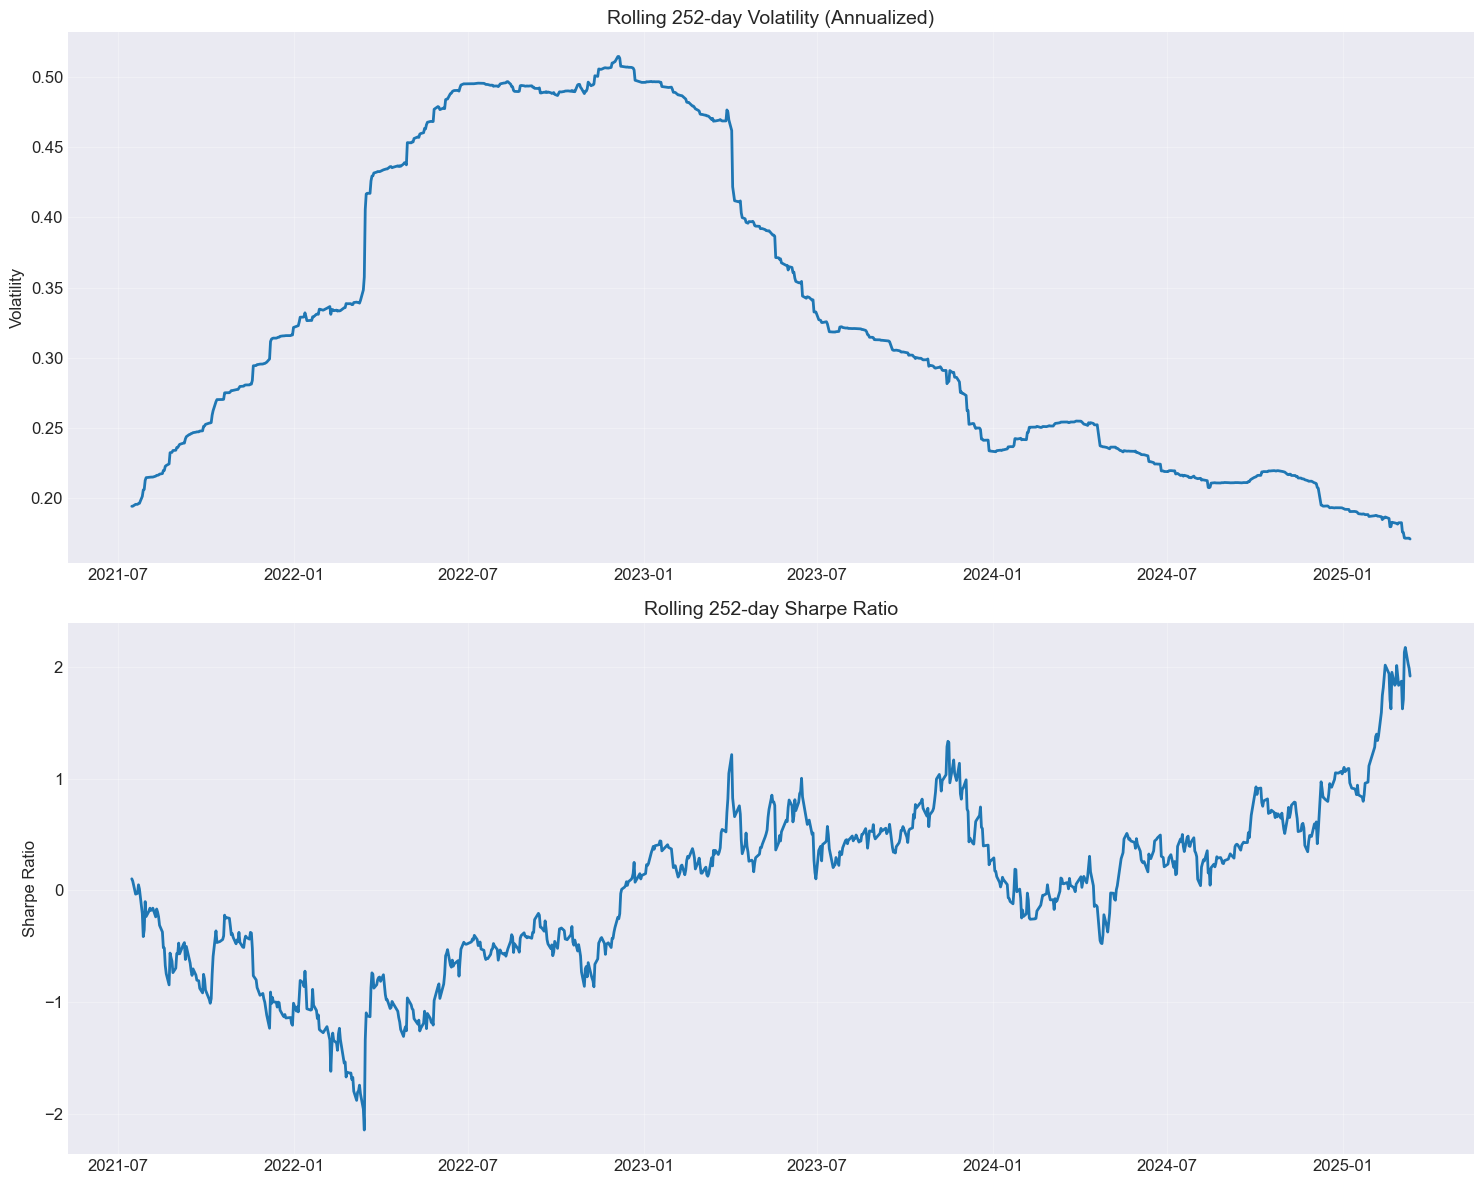

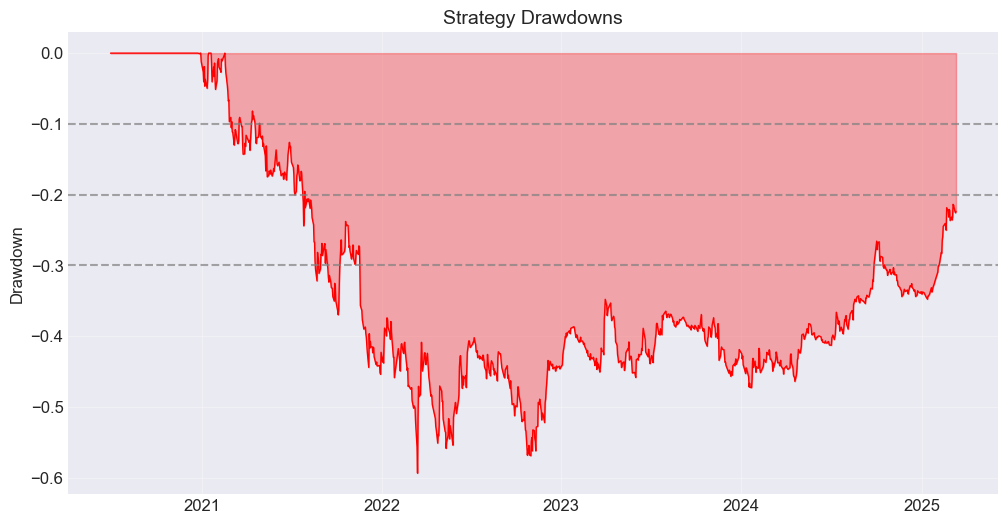

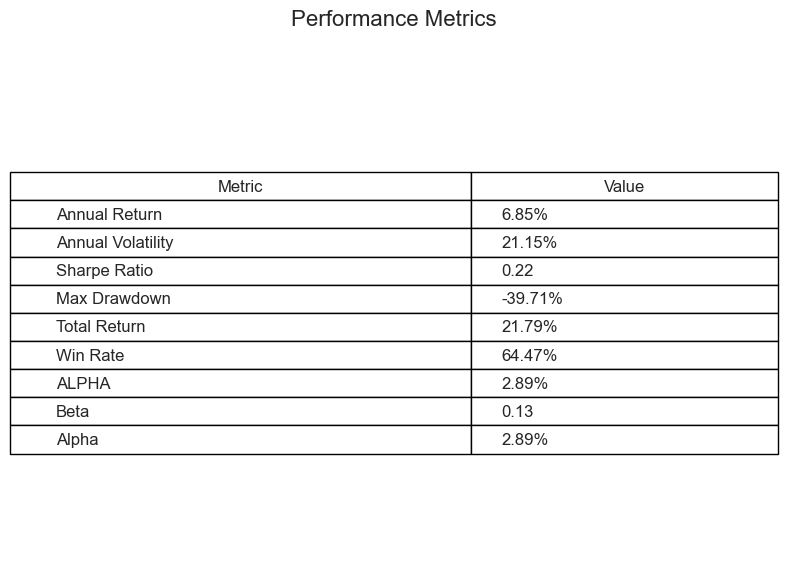

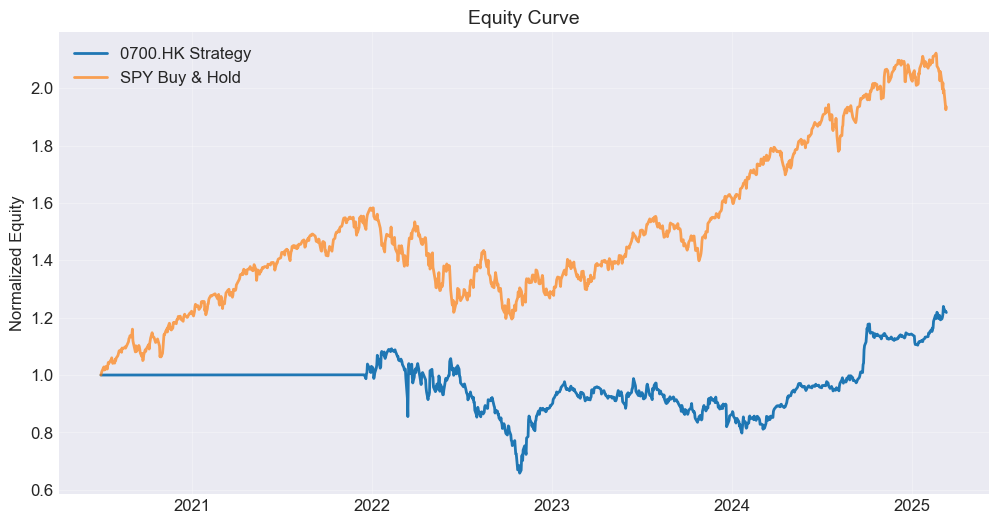

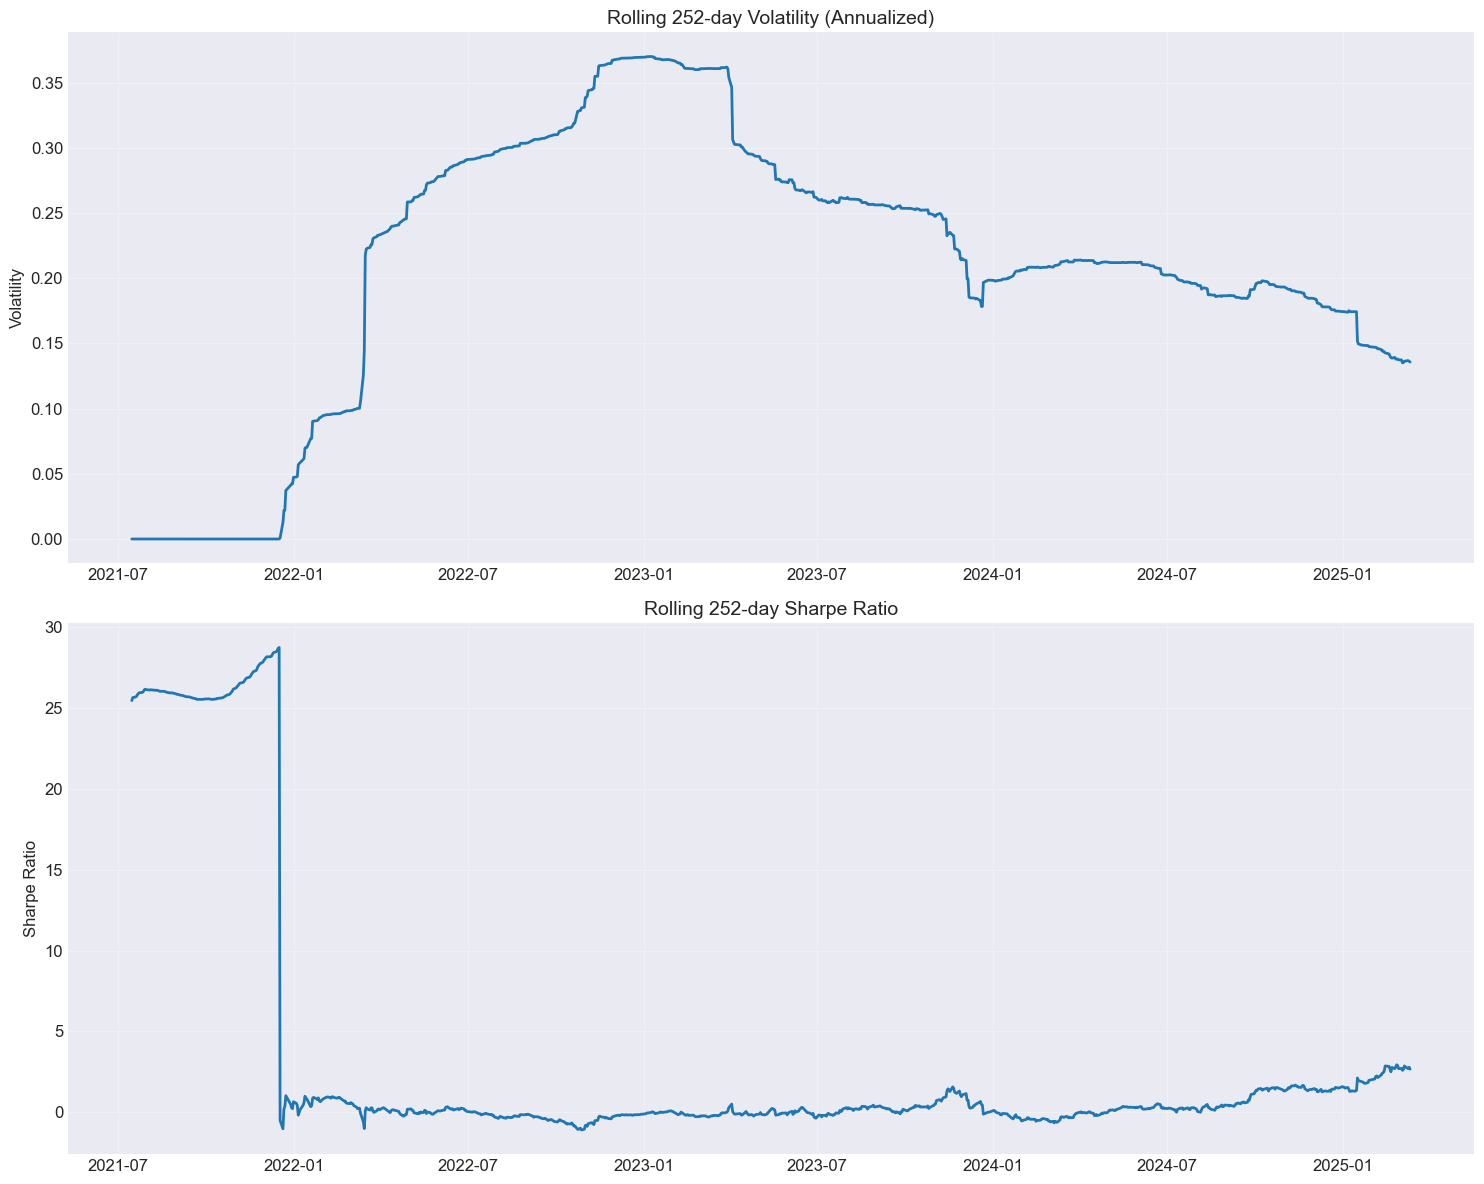

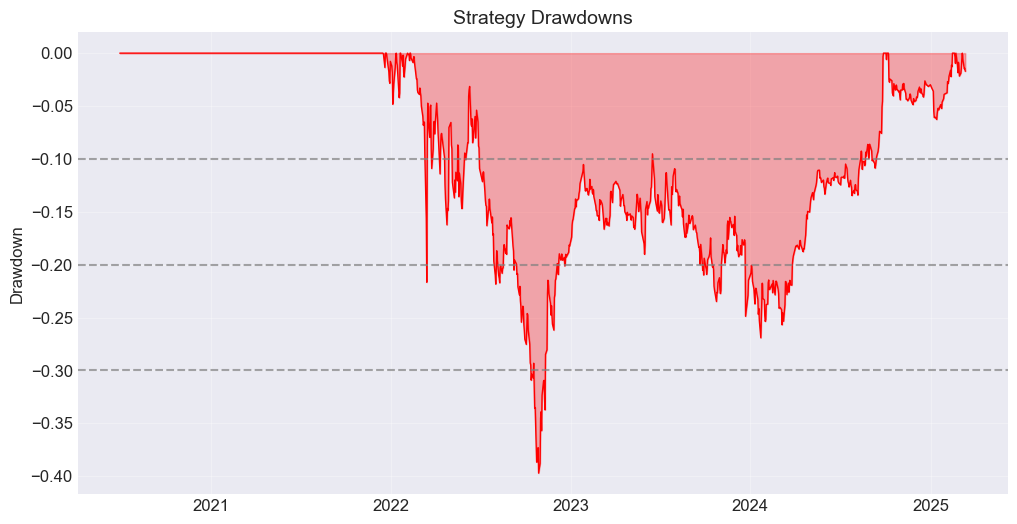

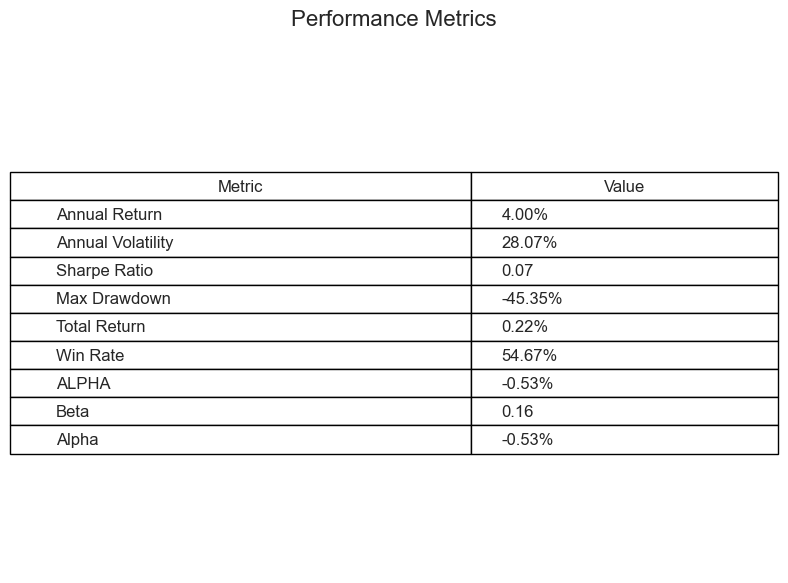

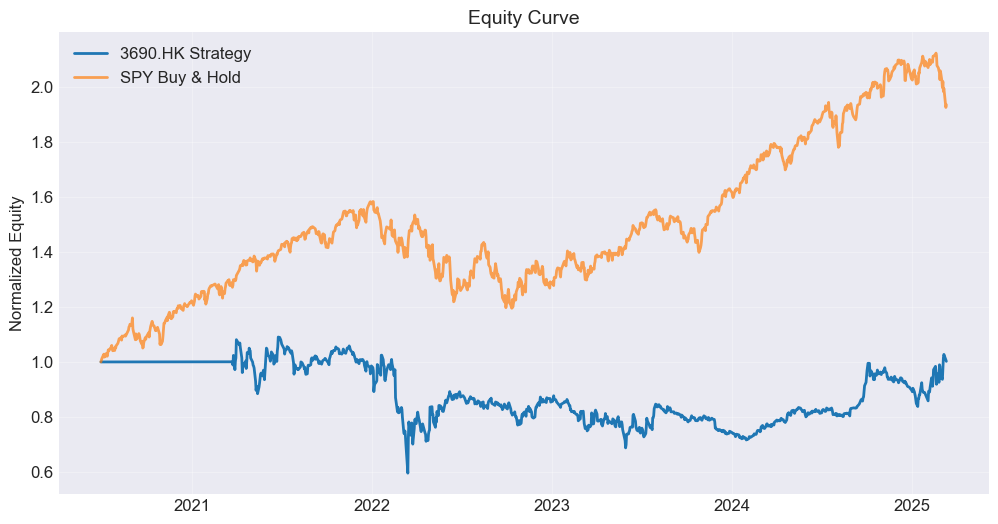

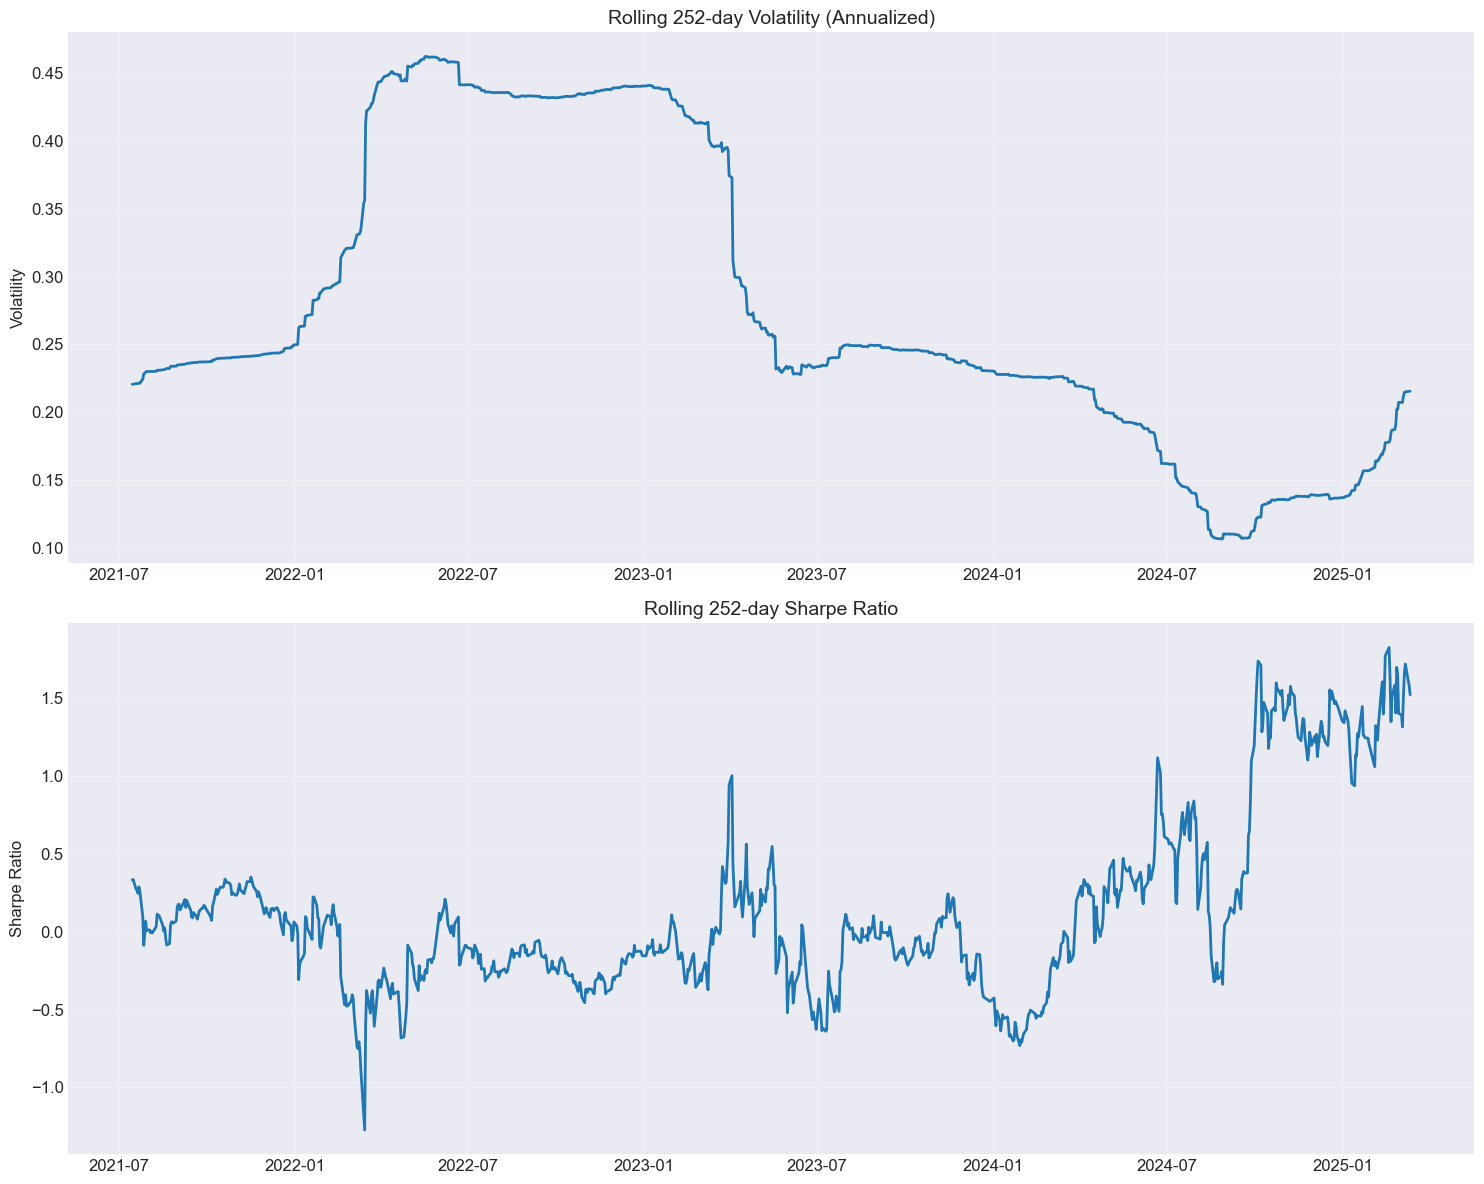

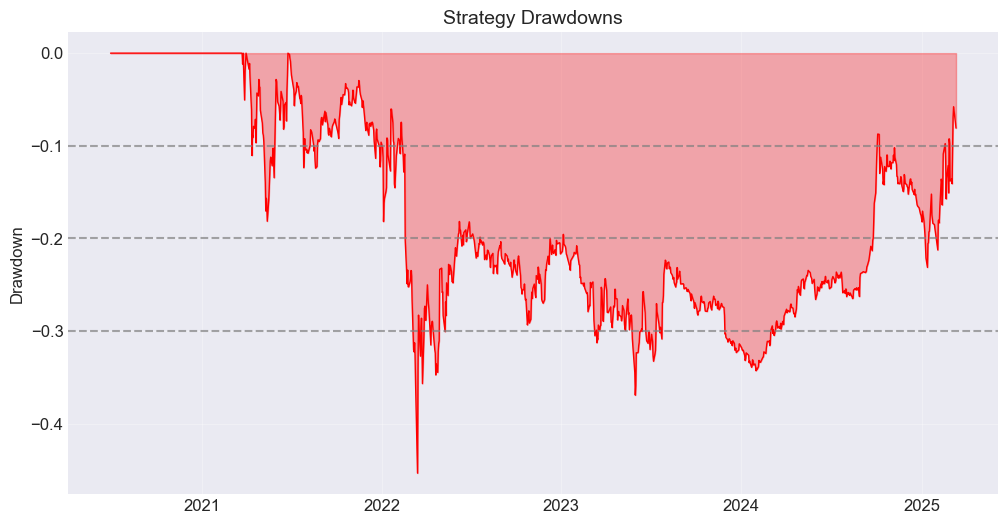

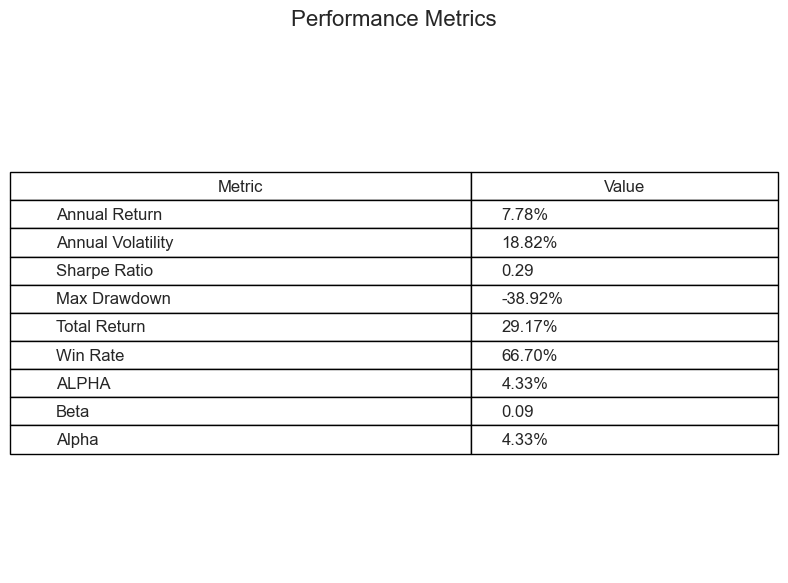

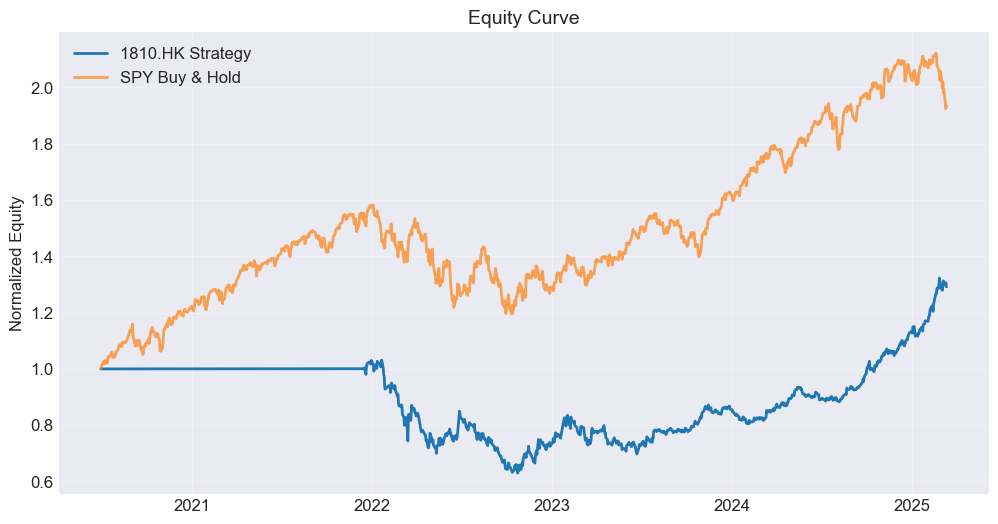

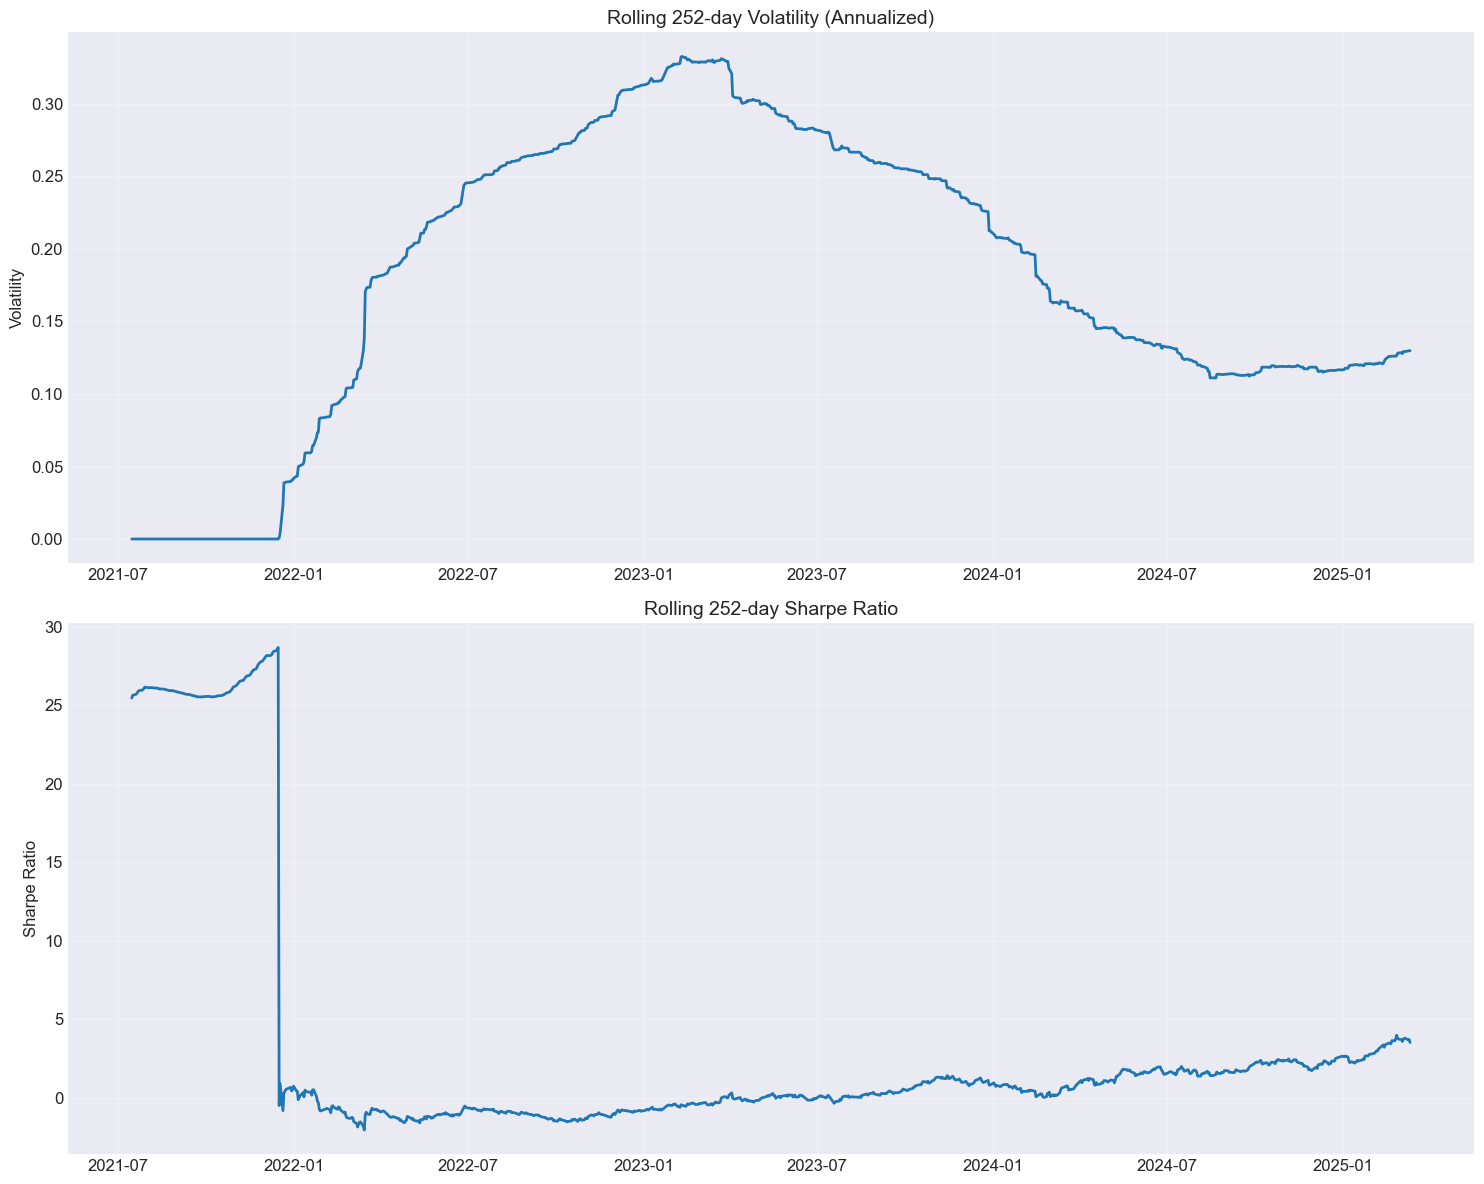

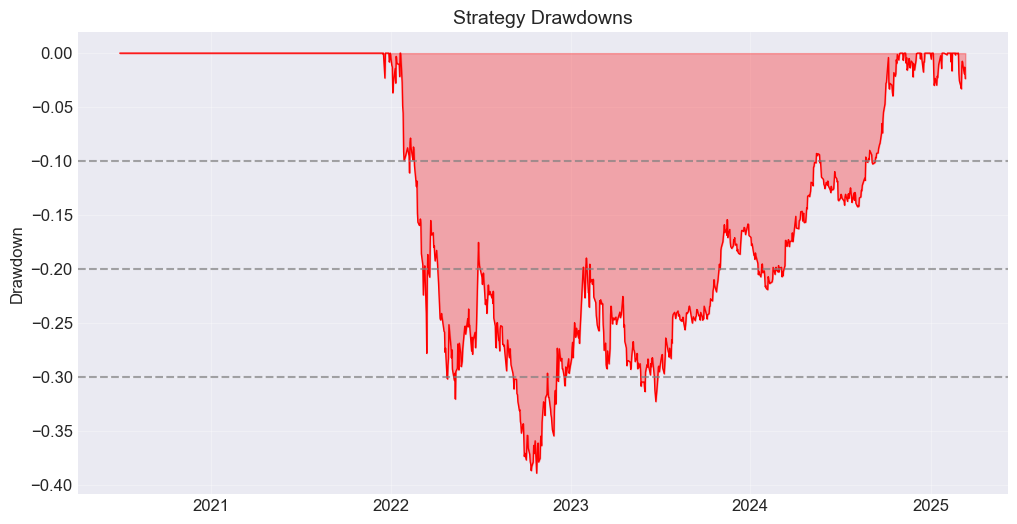

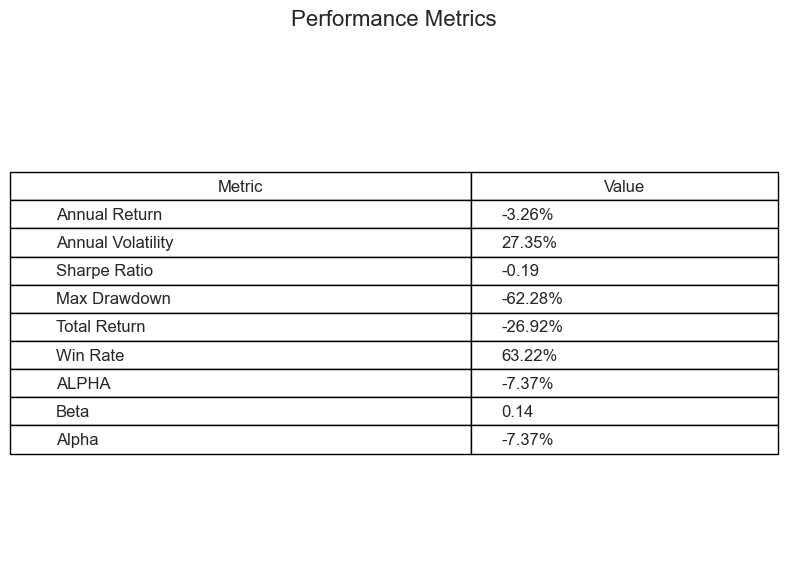

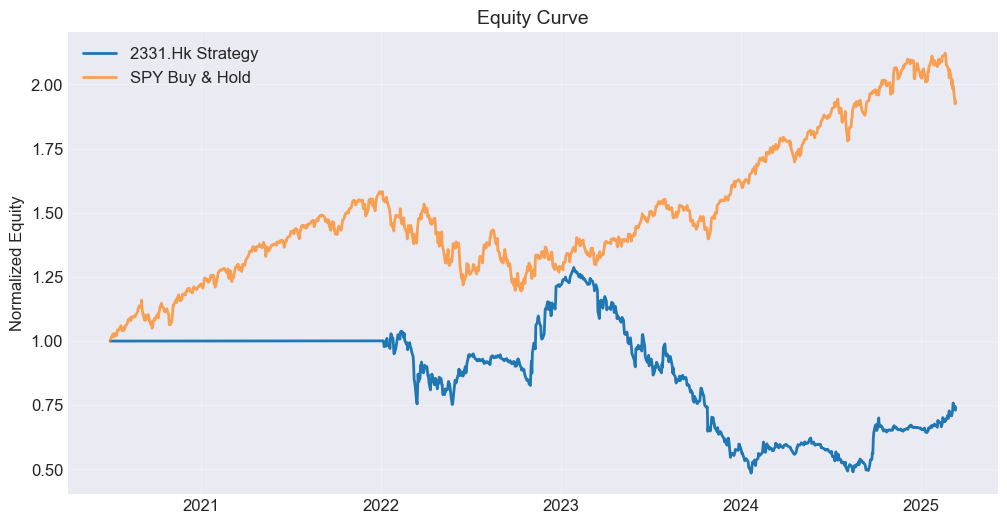

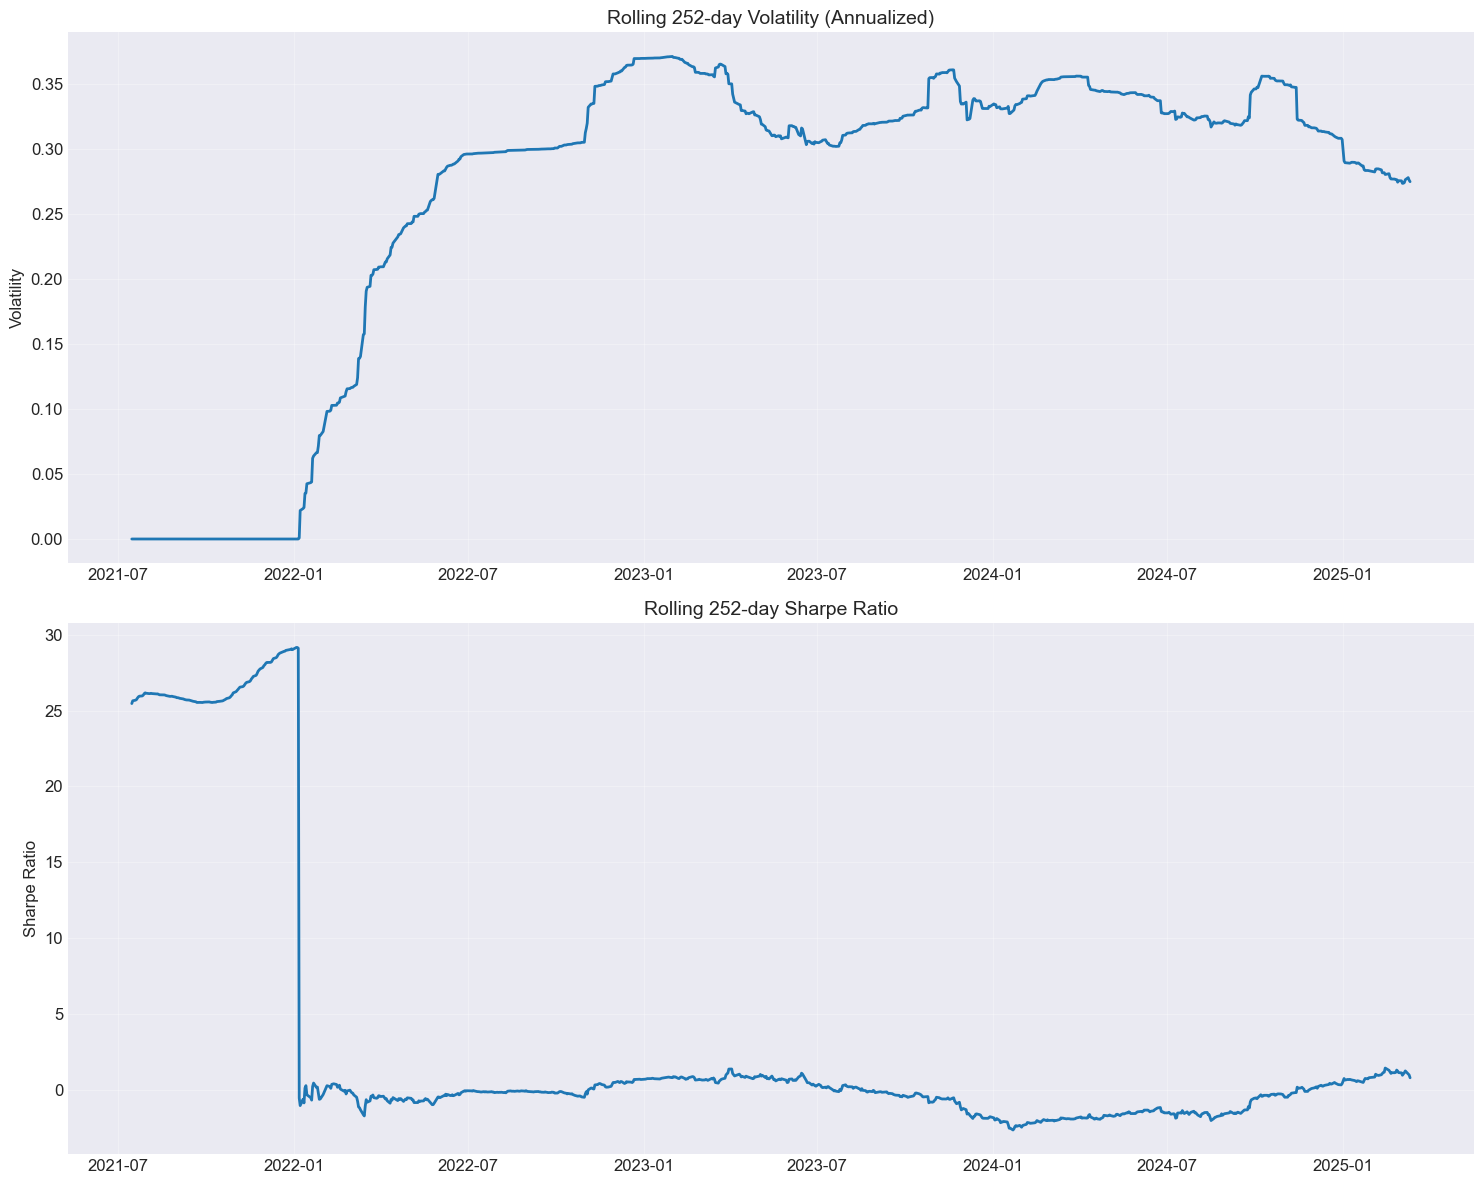

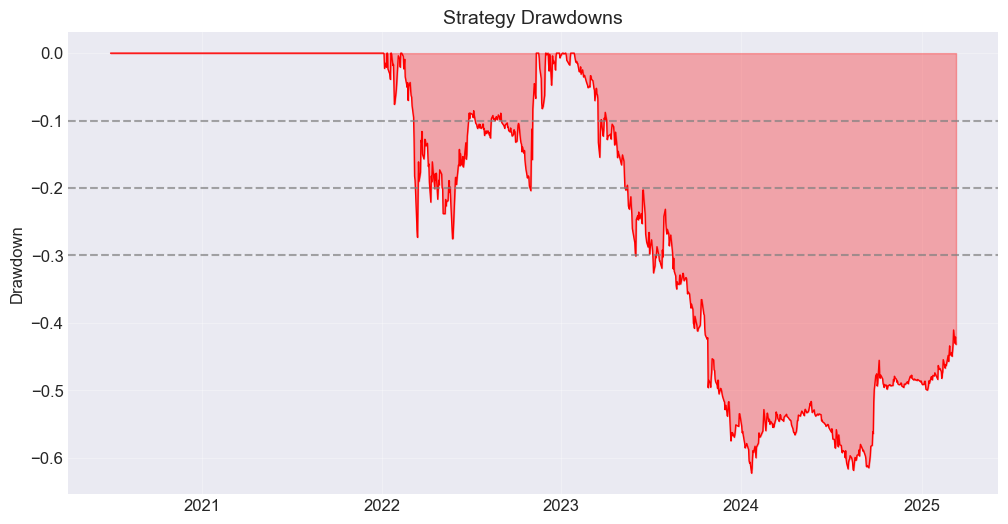

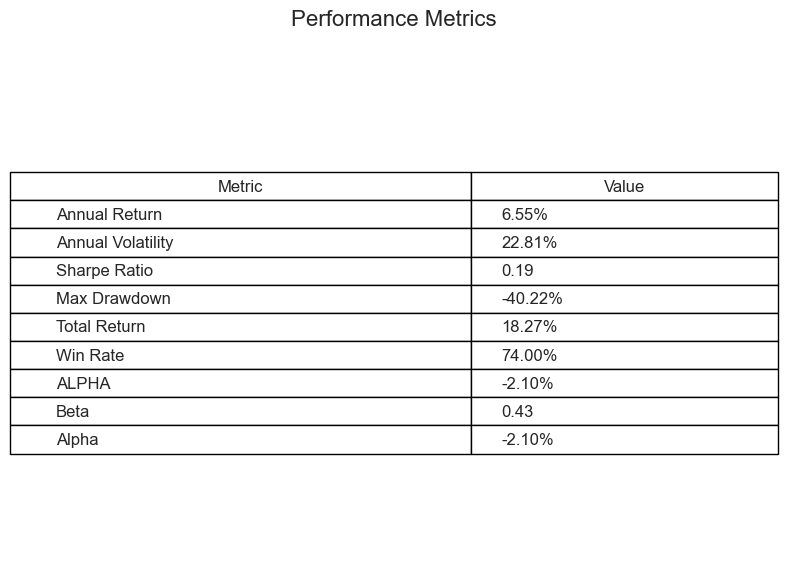

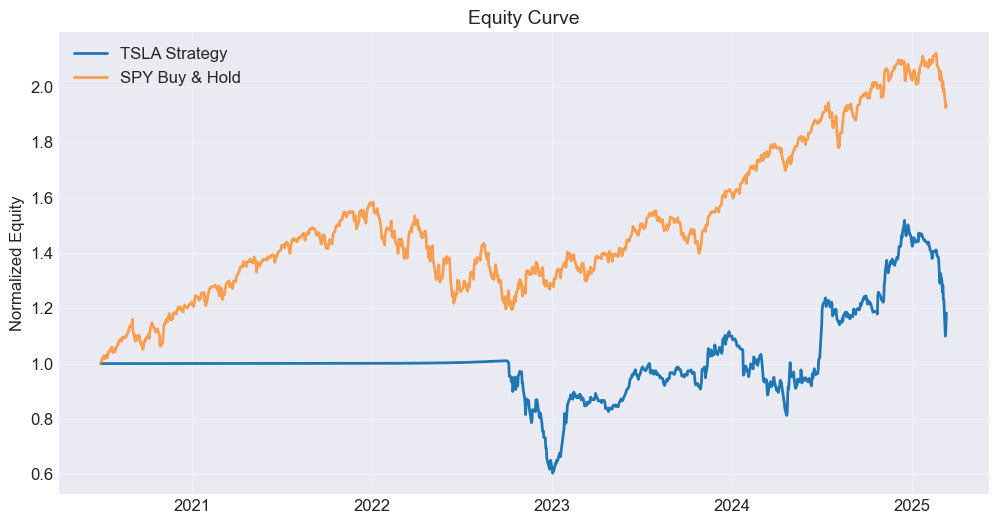

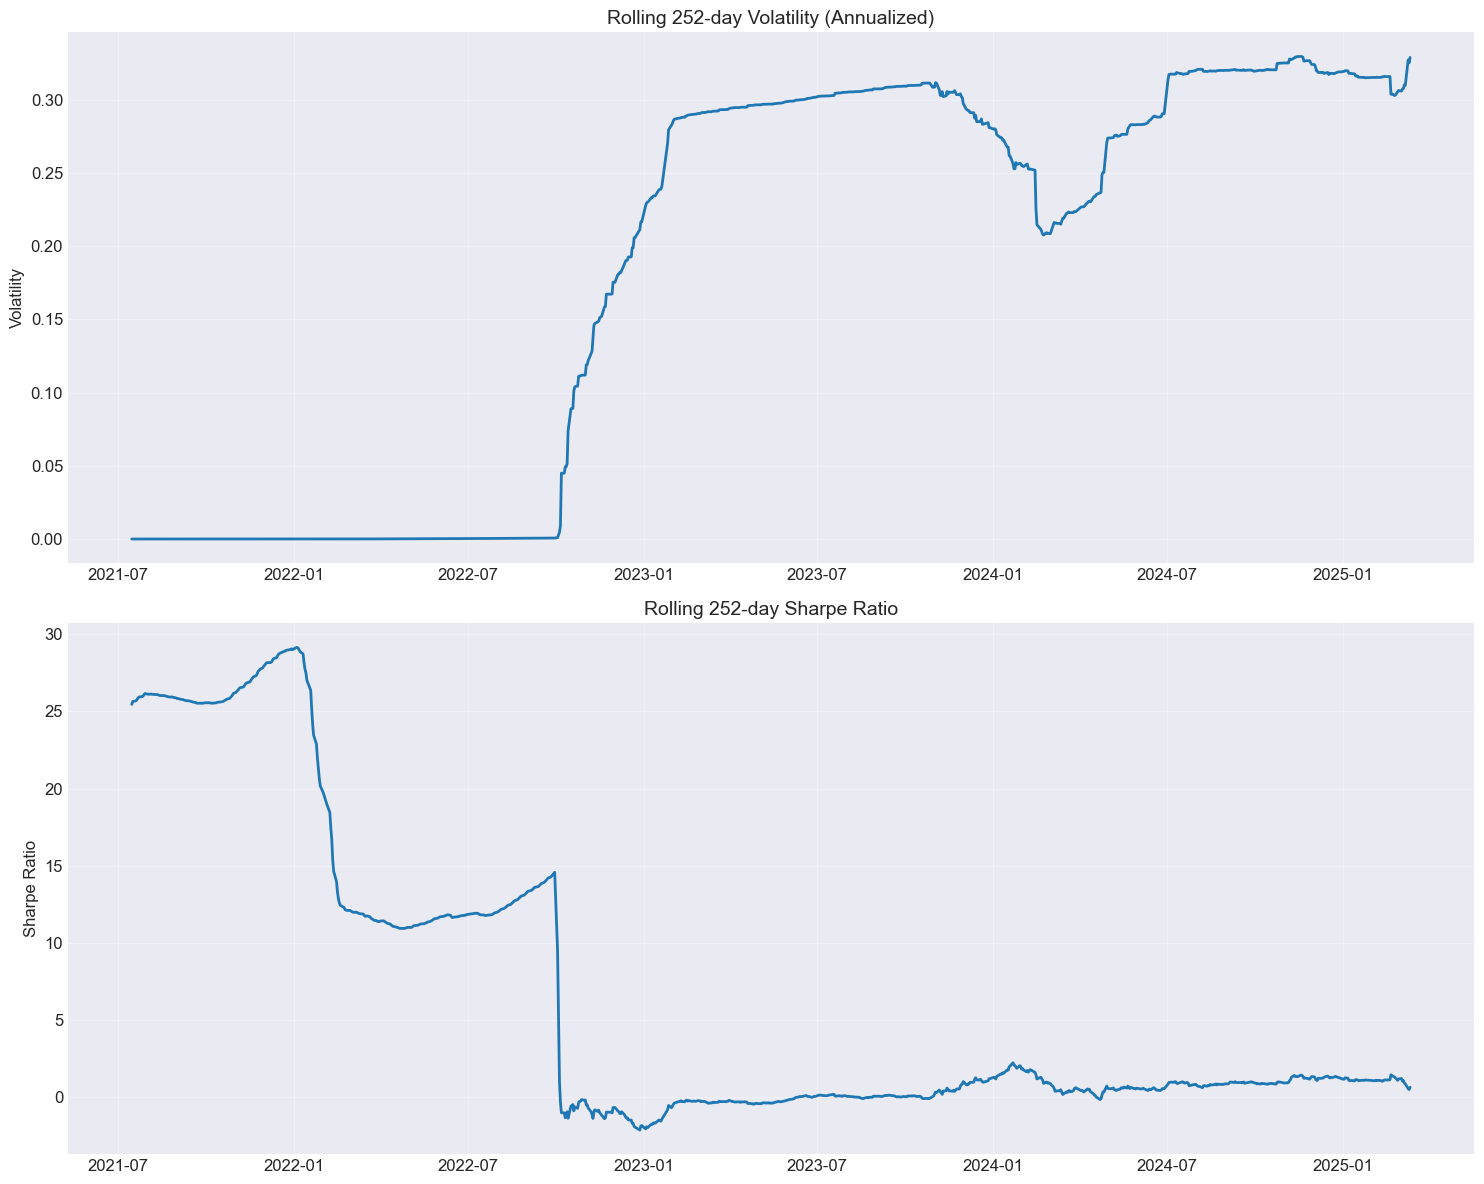

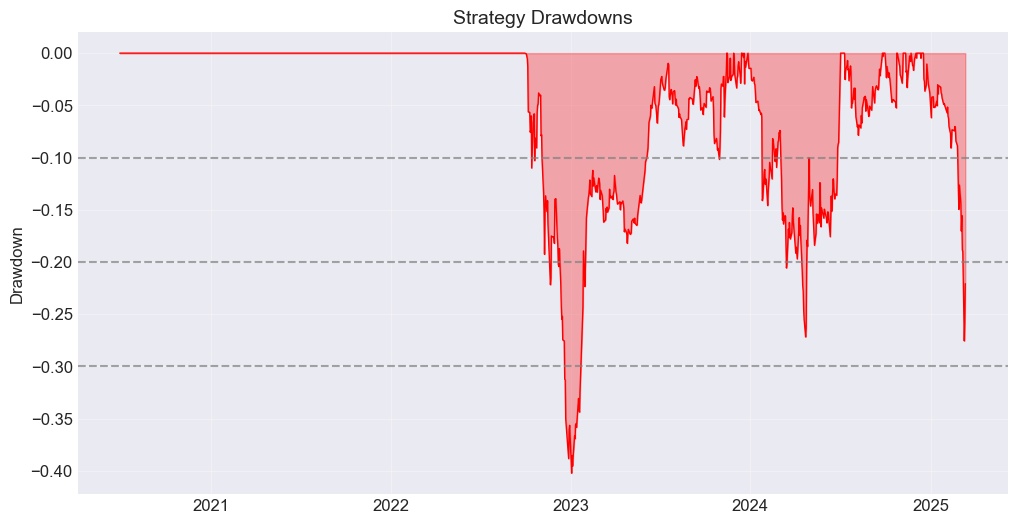

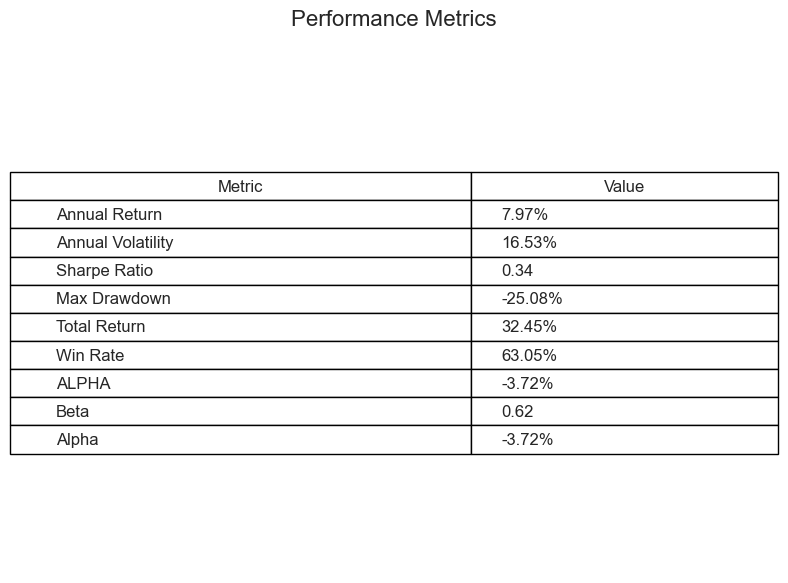

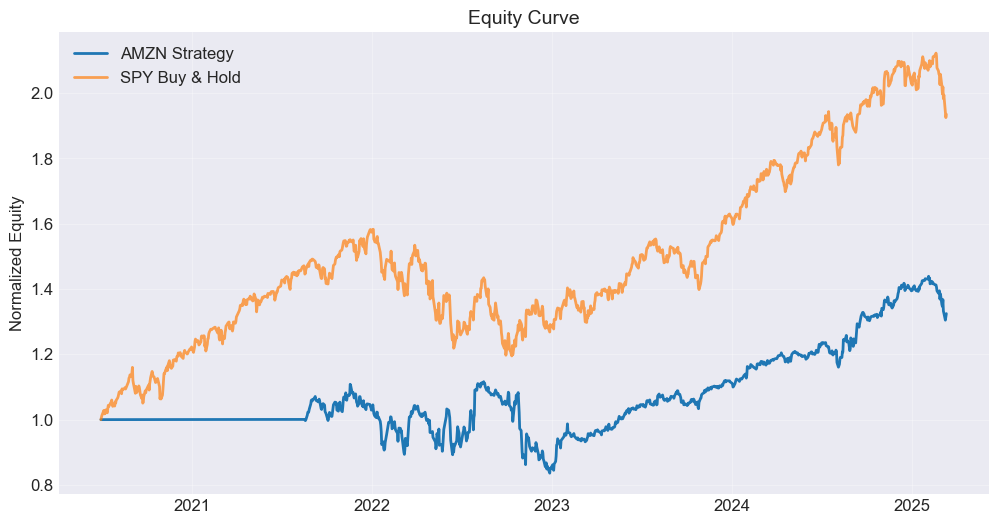

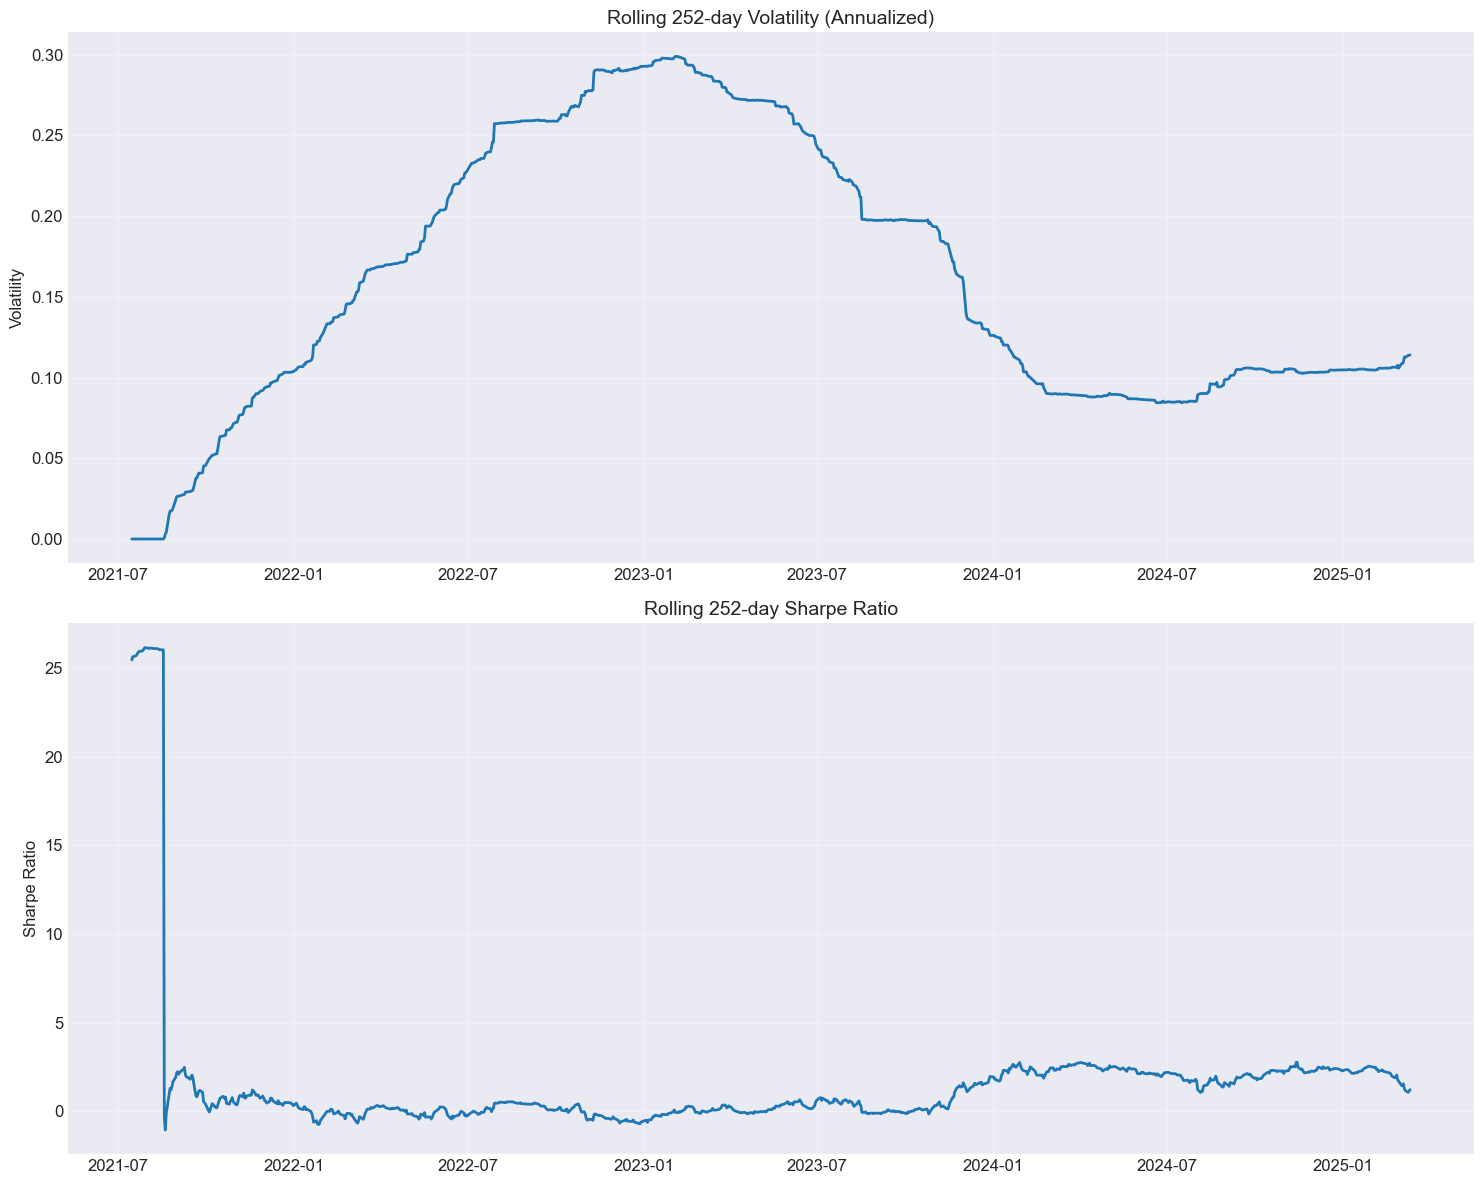

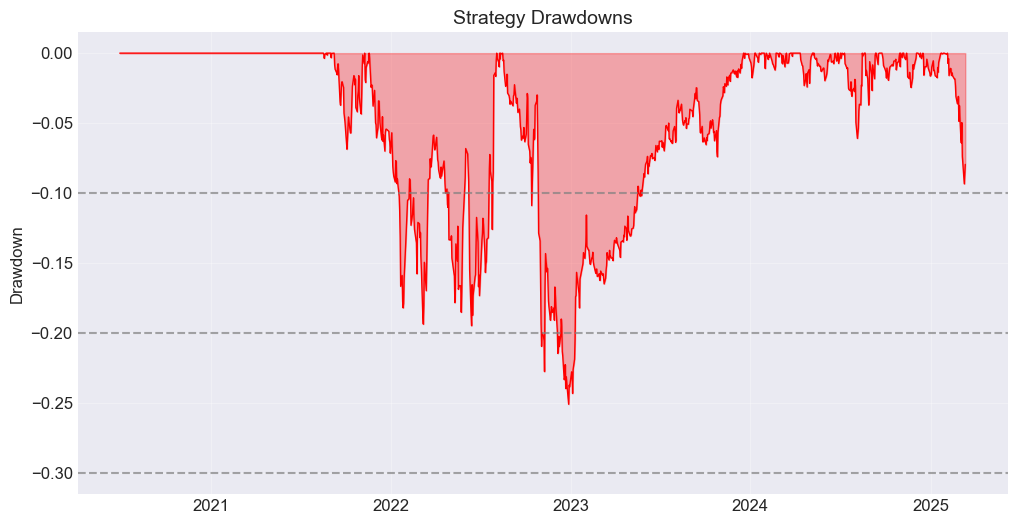

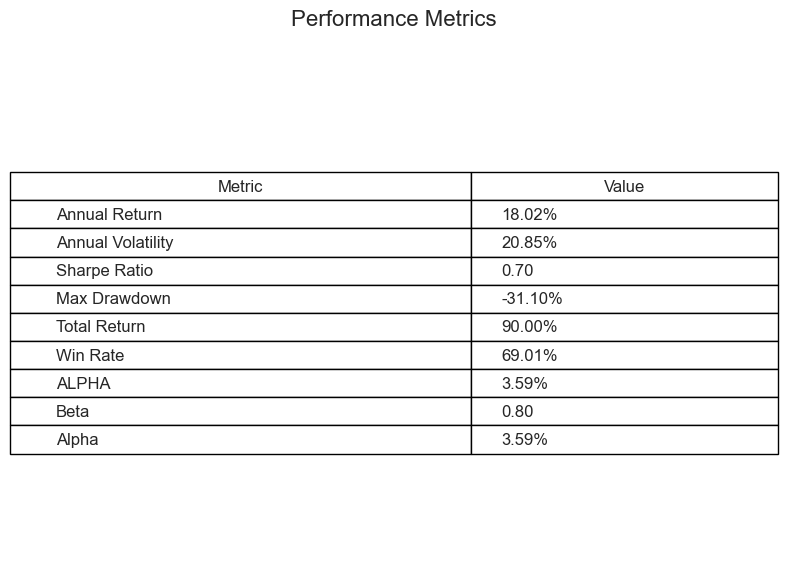

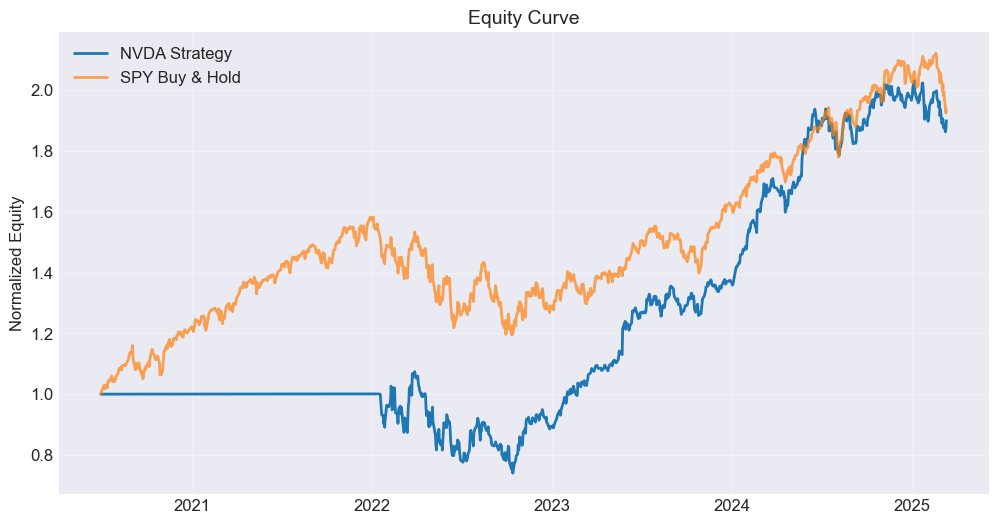

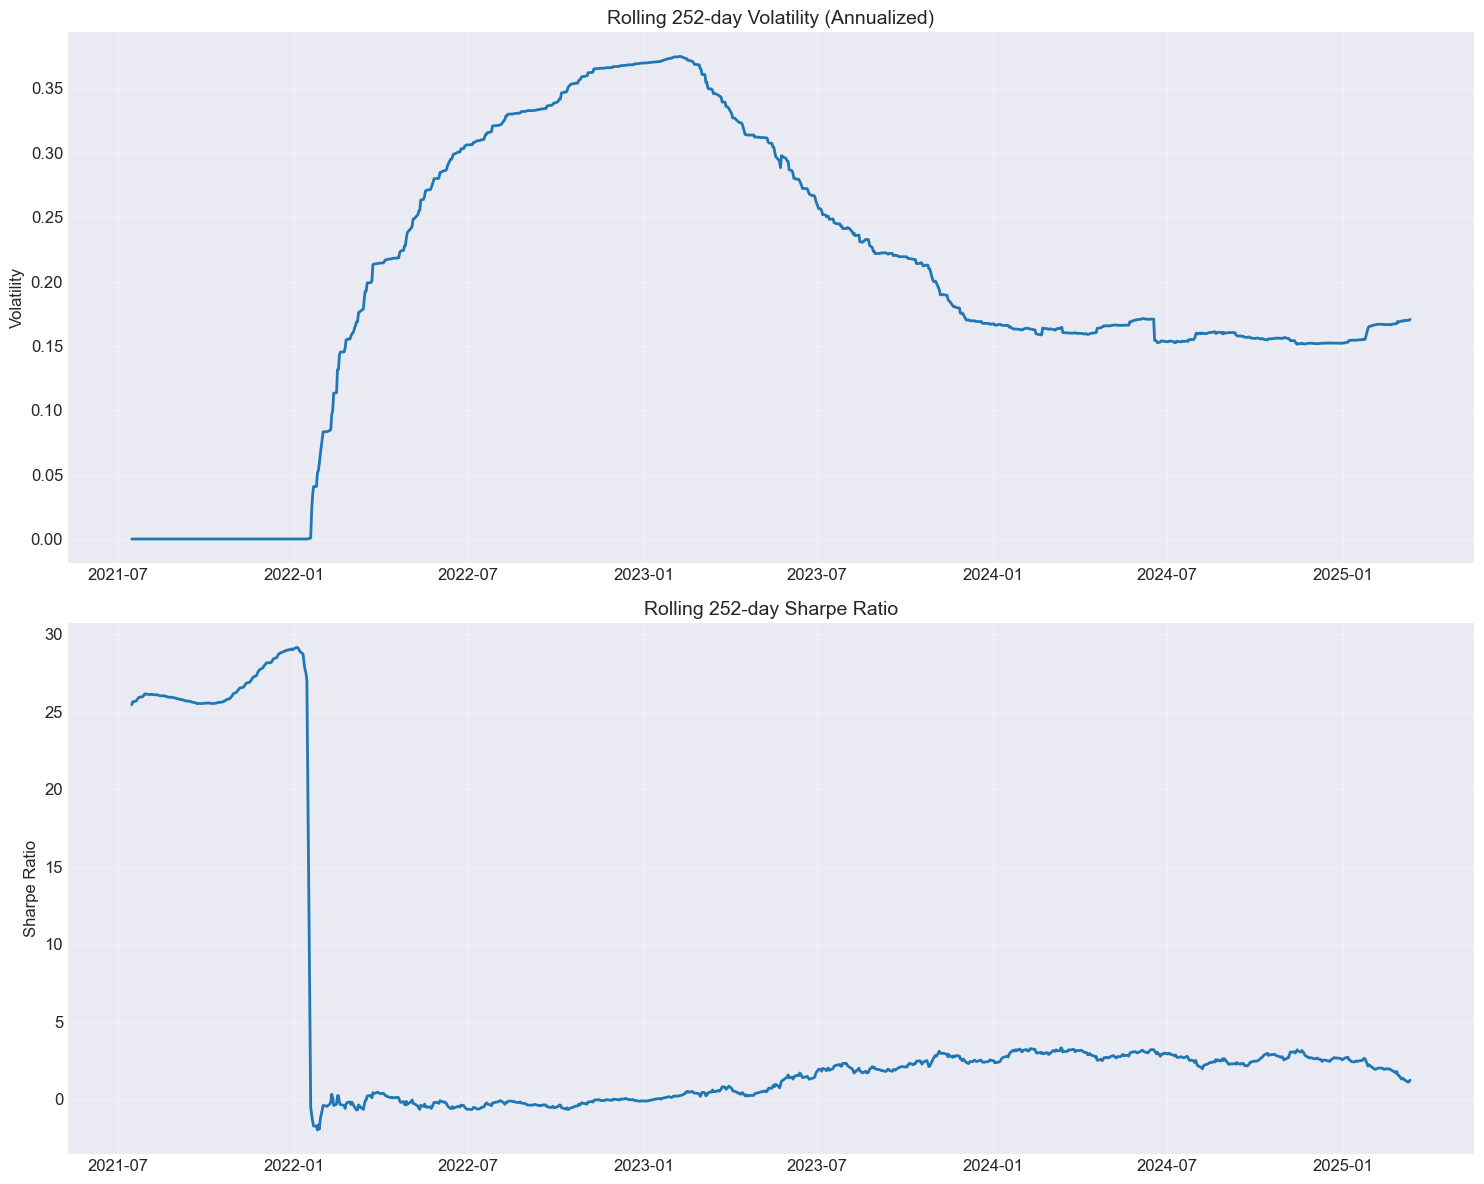

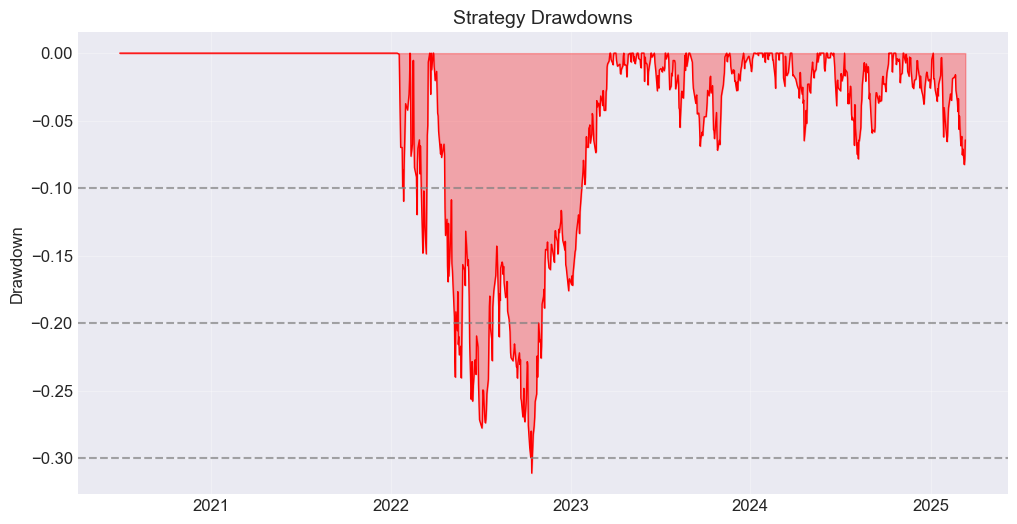

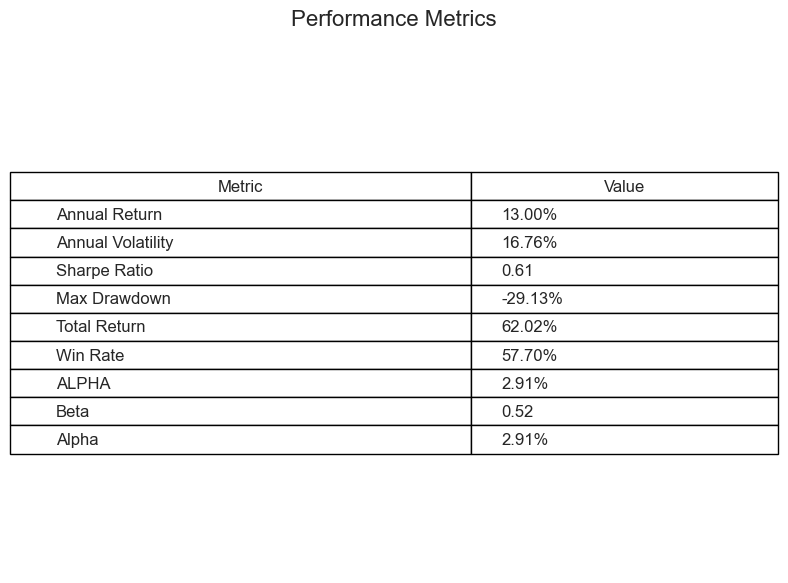

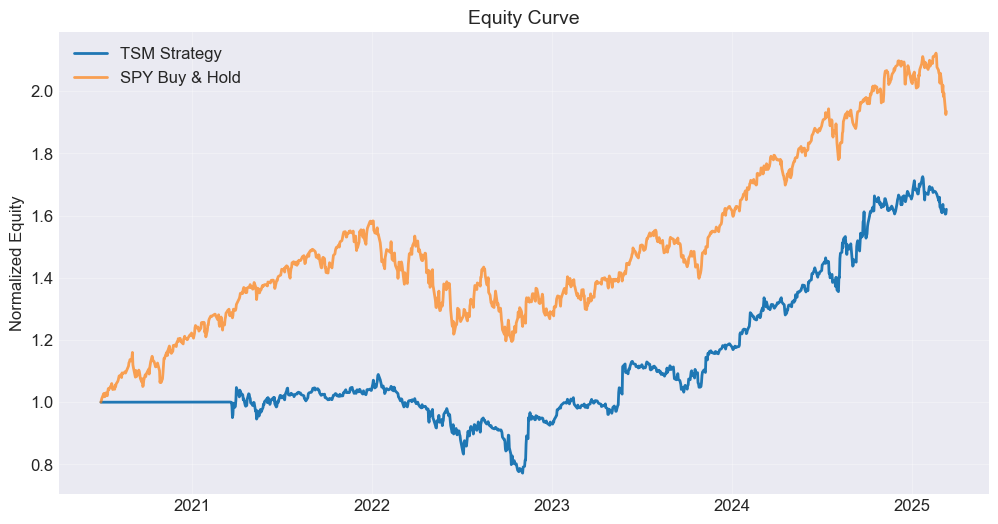

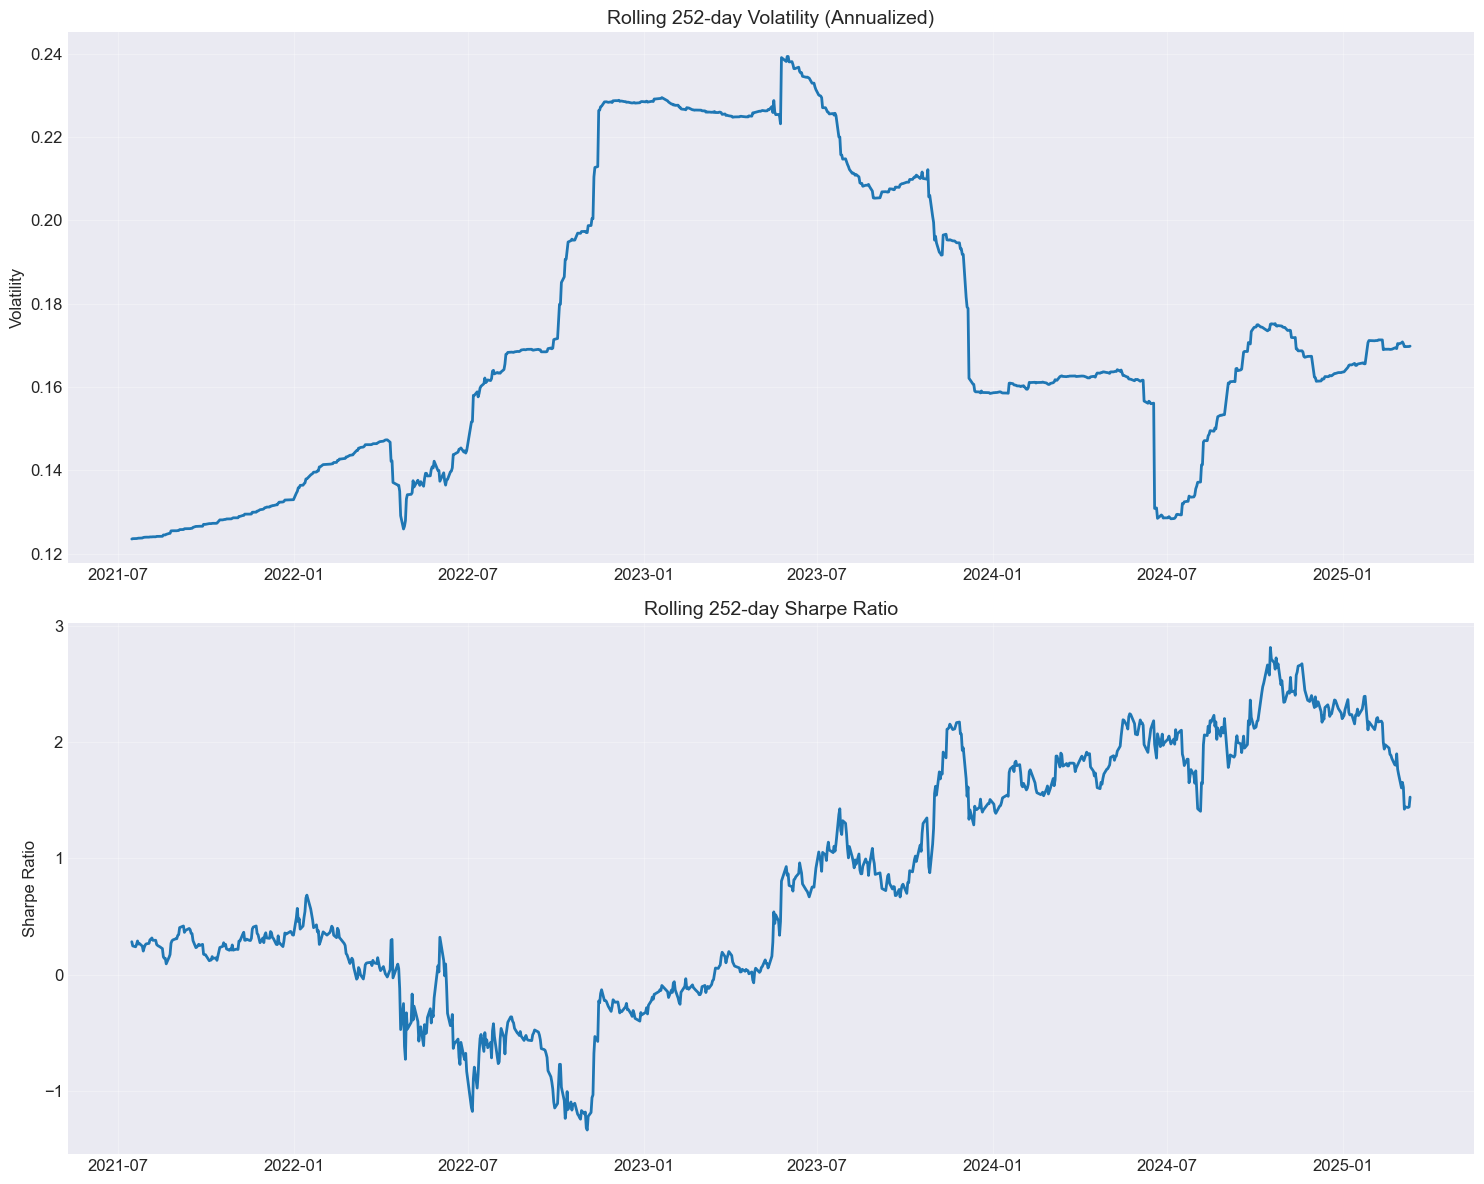

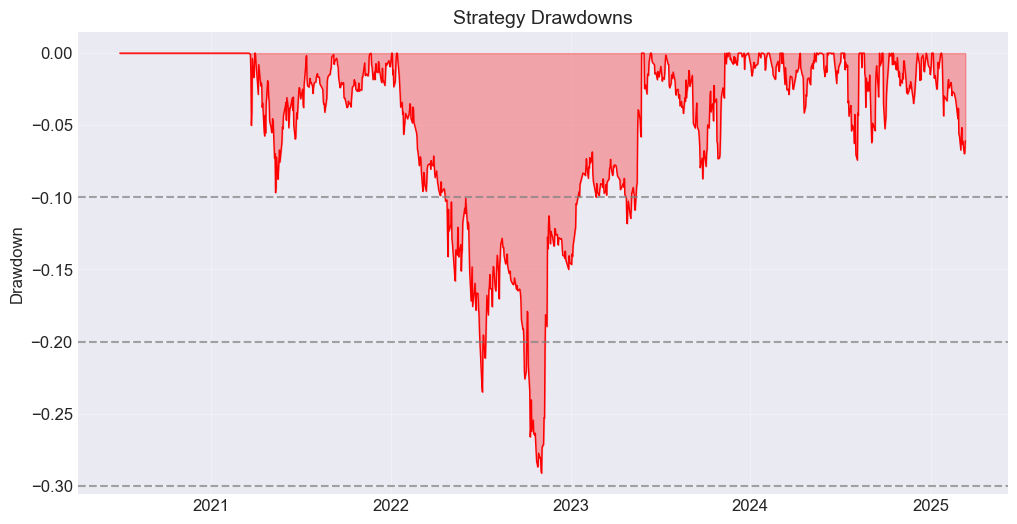

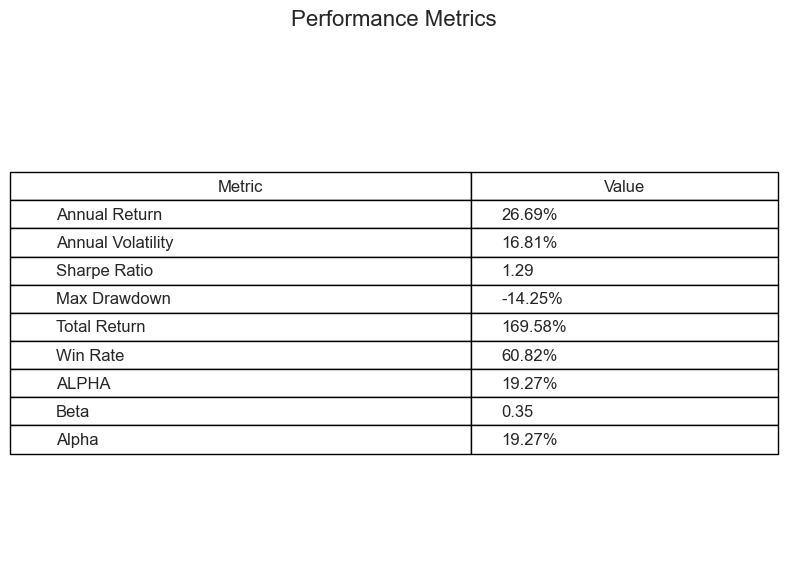

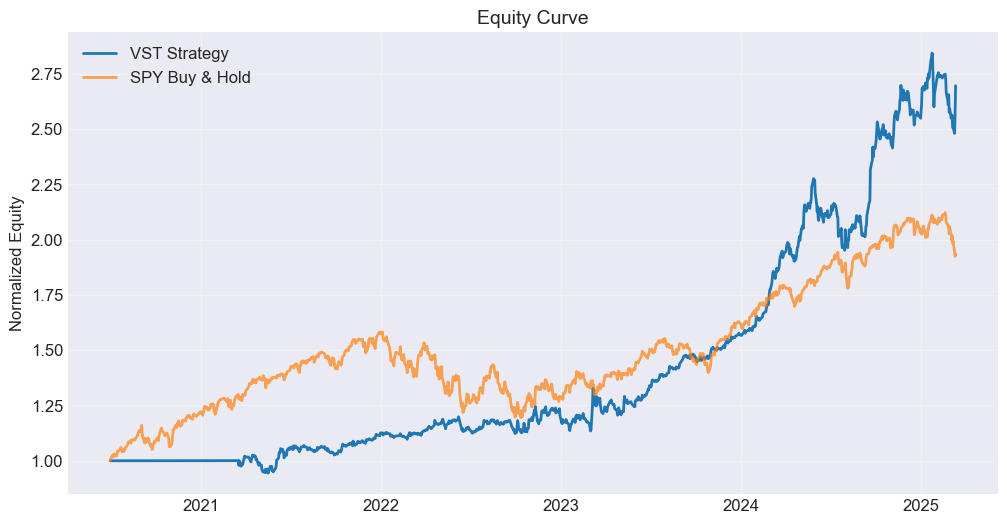

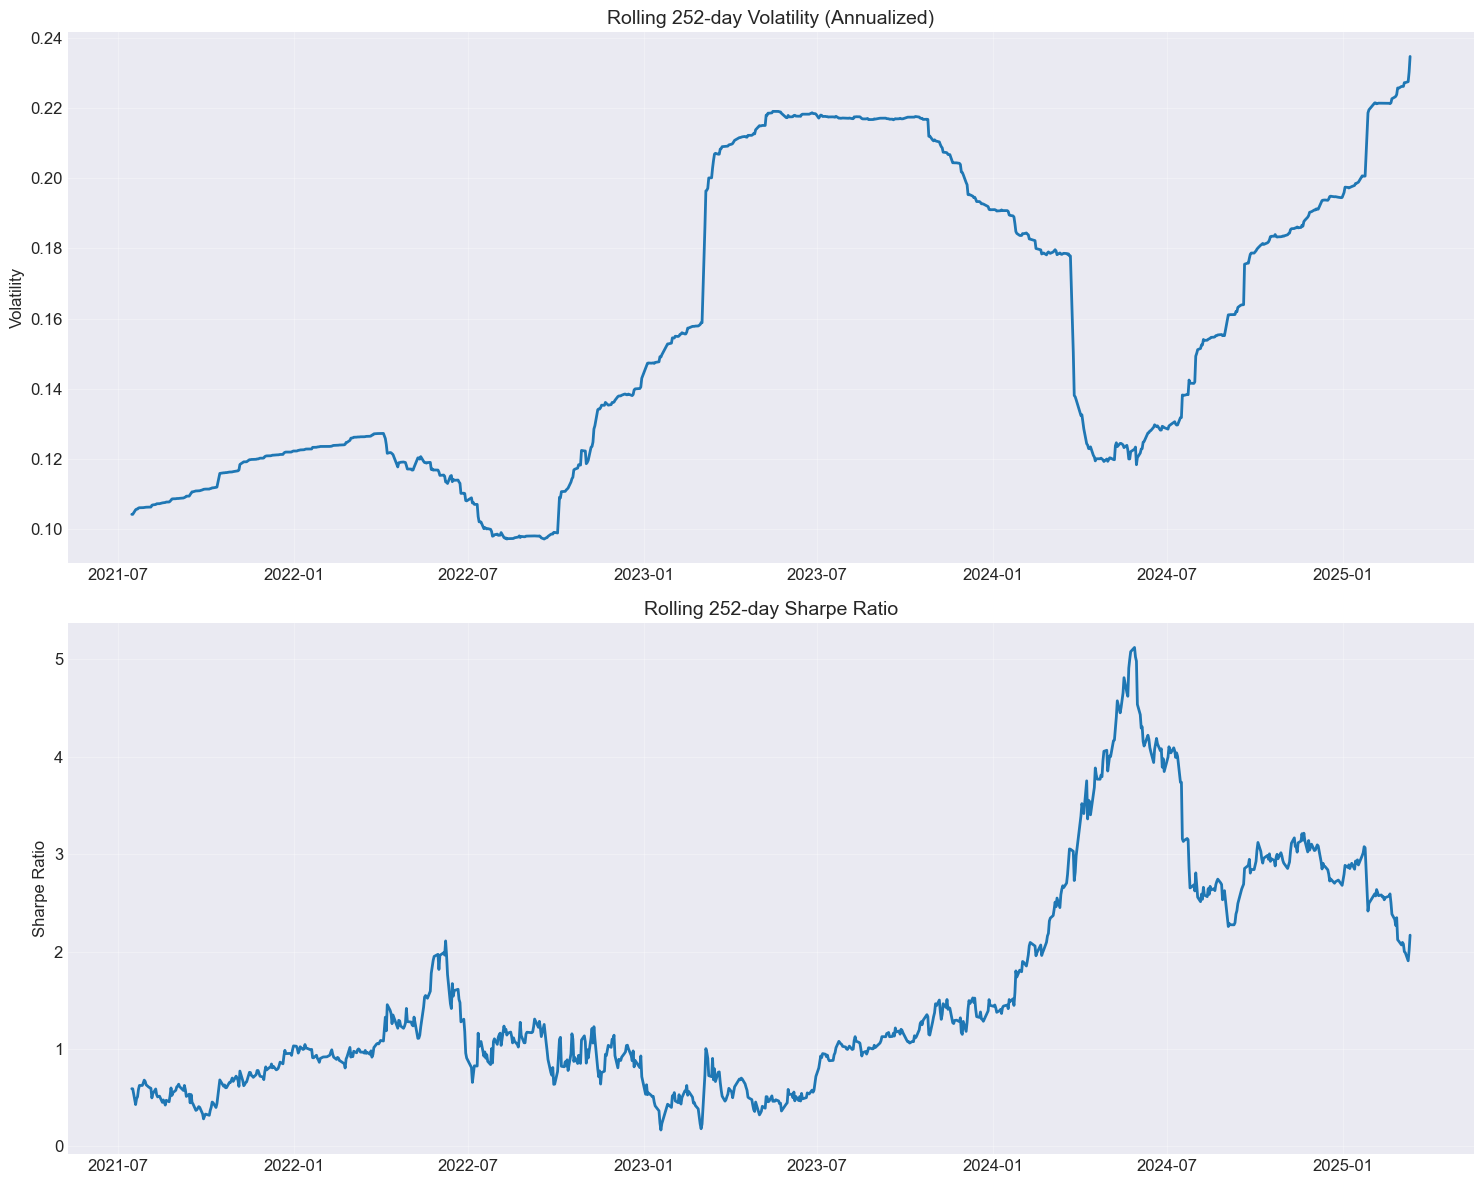

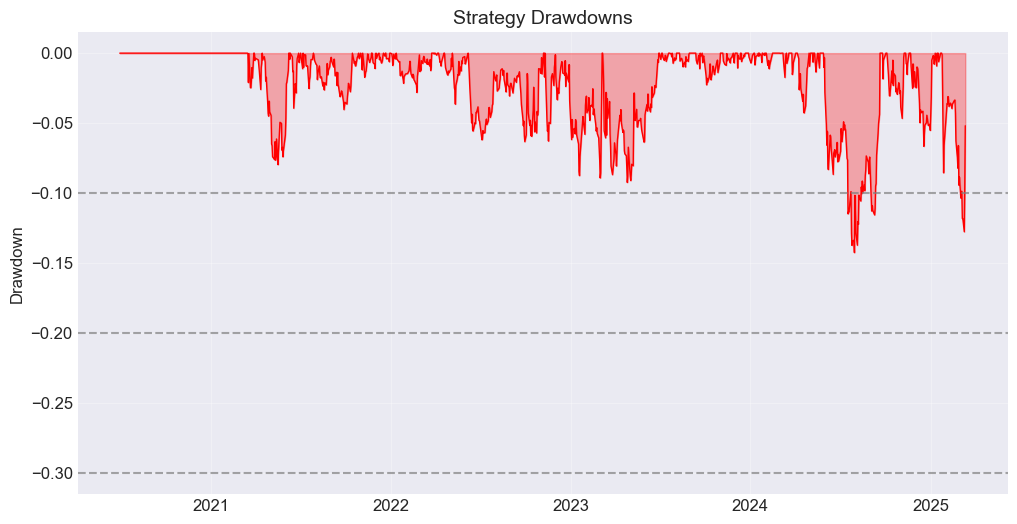

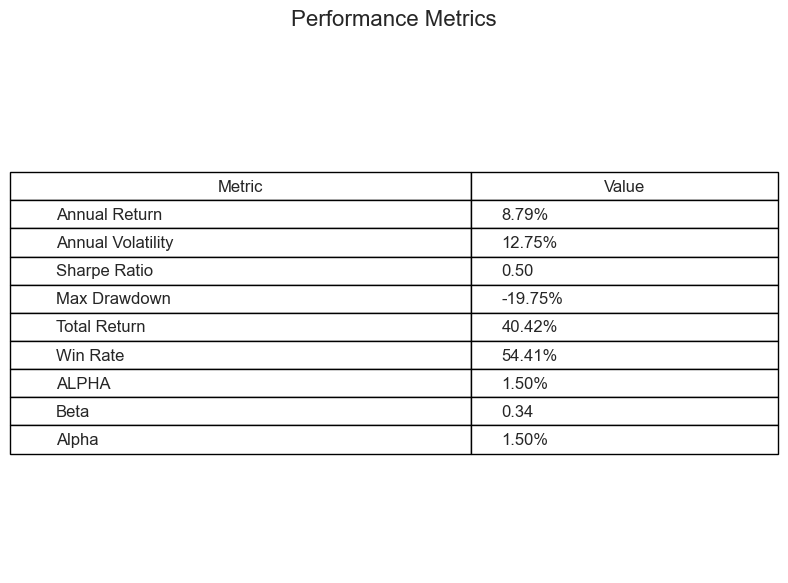

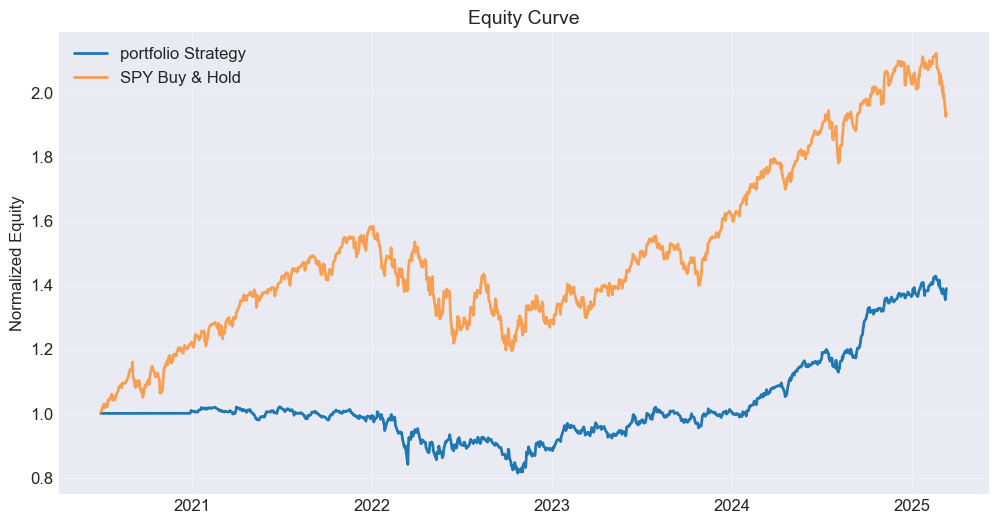

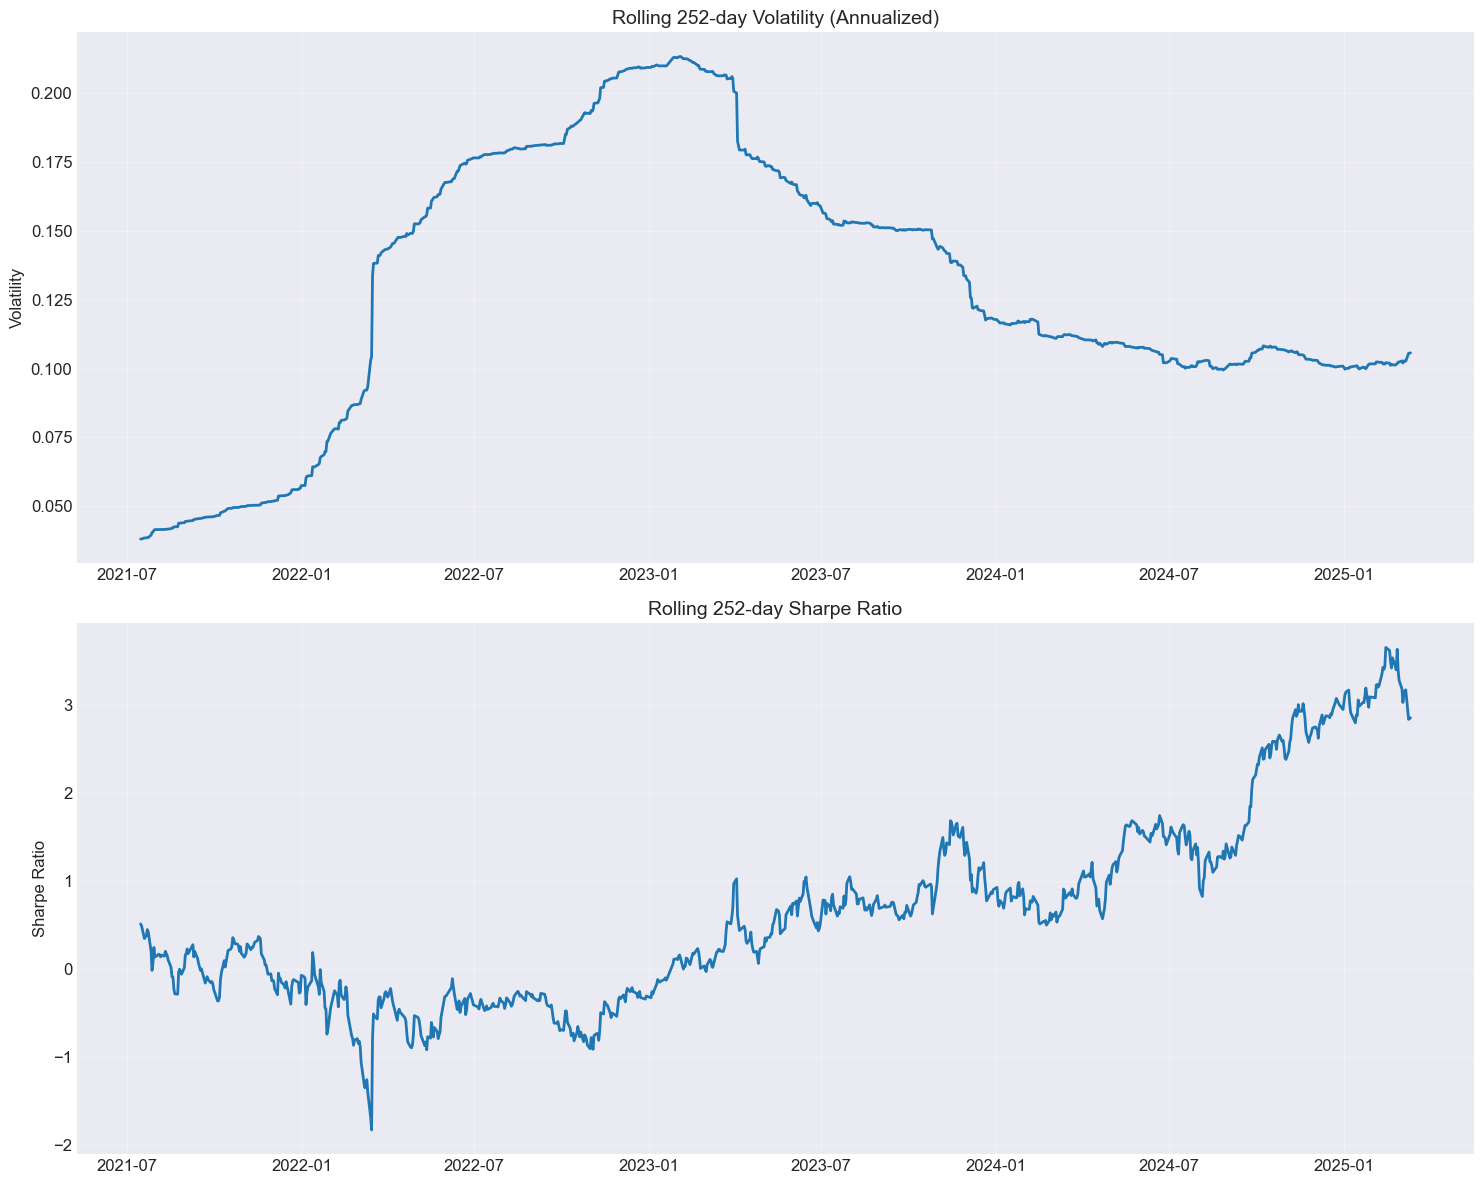

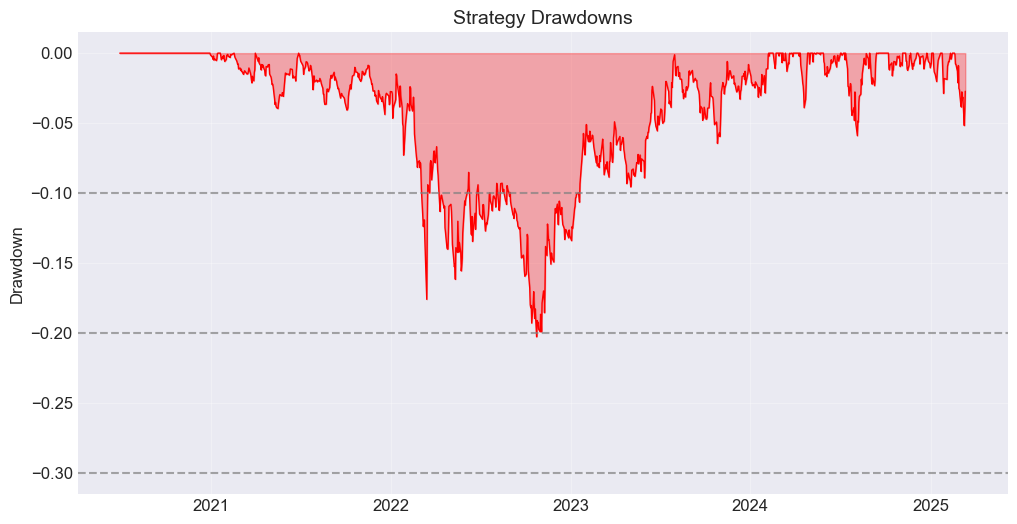

In [5]:
# without parameter-optimizaiton
backtest_columns = [
    'portfolio_close', 'portfolio_high', 'portfolio_low', 'portfolio_open', 'portfolio_volume',
    'SPY_close', 'SPY_high', 'SPY_low', 'SPY_open', 'SPY_volume',
    'portfolio_daily_return', 'portfolio_log_return', 'portfolio_kdj_k', 'portfolio_kdj_d',
    'portfolio_kdj_j', 'portfolio_kdj_j_weekly', 'portfolio_signal', 'portfolio_kdj_j_weighted',
    'portfolio_position_size', 'portfolio_position', 'portfolio_equity', 'portfolio_cash',
    'portfolio_holdings', 'portfolio_trade', 'portfolio_commission', 'portfolio_slippage',
    'portfolio_strategy_return', 'portfolio_cum_return'
]

otc_china_stocks = [
    #"LKNCY",
    "9988.HK",  # 阿里巴巴 (Alibaba)
    "0700.HK",  # 腾讯 (Tencent) - OTC 没数据
    "3690.HK",  # 美团 (Meituan) - OTC
    "1810.HK",  # 小米 (Xiaomi) - OTC
    "2331.Hk",

    "TSLA",
    "AMZN",
    "NVDA",
    "TSM",
    "VST"
]

param_grid = {
    'k_period': [9],
    'j_buy_threshold': [-5, 0, 5],
    'j_sell_threshold': [70, 90],
    'daily_enabled': [True],
    'weekly_enabled': [True],
    'position_size': [0.5, 1.0],
    'weekly_weight':[0.5, 1.0]
}

optimize = False

# initial
ticker = otc_china_stocks[0]
data = fetch_data(ticker, period=period, benchmark=benchmark)
data = preprocess_data(data, ticker)
time_list = data.index[140:]
backtest_results = pd.DataFrame(0, columns=backtest_columns, index=time_list)


for ticker in otc_china_stocks:
    data = fetch_data(ticker, period=period, benchmark=benchmark)
    data = preprocess_data(data, ticker)
    data = data.loc[time_list]

    if optimize == True:
        grid_search = GridSearch(
            data=data,
            ticker=ticker,
            strategy_class=KDJStrategy,
            param_grid=param_grid,
            metric='sharpe_ratio',
            maximize=True,
            n_jobs=1  
        )
        grid_search.fit()

        strategy = KDJStrategy(ticker, grid_search.best_params)

    else:
        strategy = KDJStrategy(ticker, strategy_params)

    # prepared_data = strategy.prepare_data(data)
    # signals_data = strategy.generate_signals(prepared_data)
    # signals_data = signals_data.dropna()

    engine = BacktestEngine(initial_capital=initial_capital, risk_free_rate=get_risk_free_rate())
    backtest_result = engine.run(data, ticker, strategy)


    # backtest for each ticker
    metrics = calculate_returns(backtest_result, ticker, benchmark)
    generate_performance_report(metrics)
    engine.plot_equity_curve(backtest_result, ticker, benchmark)
    plot_rolling_metrics(backtest_result, ticker)
    engine.plot_drawdowns(backtest_result, ticker)

    # add each backtest result into a single result
    backtest_result.columns  =  backtest_columns
    common_index = backtest_results.index.intersection(backtest_result.index)
    backtest_results = backtest_results.loc[common_index]
    backtest_result = backtest_result.loc[common_index]
    backtest_results = backtest_results + backtest_result


backtest_results = backtest_results/len(otc_china_stocks)
ticker = 'portfolio'

metrics = calculate_returns(backtest_results, ticker, benchmark)
generate_performance_report(metrics)

engine.plot_equity_curve(backtest_results, ticker, benchmark)
plot_rolling_metrics(backtest_results, ticker)
engine.plot_drawdowns(backtest_results, ticker)

### Download and Preprocess Data

In [6]:
ticker = otc_china_stocks[0]
data = fetch_data(ticker, period=period, benchmark=benchmark)
data = preprocess_data(data, ticker)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Original columns: [('Close', '9988.HK'), ('High', '9988.HK'), ('Low', '9988.HK'), ('Open', '9988.HK'), ('Volume', '9988.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2019-11-26  186.966522  188.860100  186.368542  186.368542  74549578
2019-11-27  192.547607  194.640522  188.660783  189.358416  53617241
2019-11-28  203.311127  203.510448  196.235096  196.334765  41816834
2019-11-29  197.730042  204.108439  196.833087  203.311138  36509531
2019-12-02  194.839844  198.228357  193.344909  197.331402  26592325
Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                                                                 
2018-03-1

/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [7]:
data.index[203:]

DatetimeIndex(['2020-09-30', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-14',
               '2020-10-15', '2020-10-16',
               ...
               '2025-02-27', '2025-02-28', '2025-03-03', '2025-03-04',
               '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-10',
               '2025-03-11', '2025-03-12'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [ ]:
# Fetch data

print(f"Fetching data for {ticker} with {benchmark} as benchmark...")
data = fetch_data(ticker, period=period, benchmark=benchmark)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for 9988.HK with SPY as benchmark...
Original columns: [('Close', '9988.HK'), ('High', '9988.HK'), ('Low', '9988.HK'), ('Open', '9988.HK'), ('Volume', '9988.HK')]
Fixed columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open    volume
Date                                                                
2019-11-26  186.966522  188.860100  186.368542  186.368542  74549578
2019-11-27  192.547607  194.640522  188.660783  189.358416  53617241
2019-11-28  203.311127  203.510448  196.235096  196.334765  41816834
2019-11-29  197.730042  204.108439  196.833087  203.311138  36509531
2019-12-02  194.839844  198.228357  193.344909  197.331402  26592325
Original benchmark columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]
Fixed benchmark columns: ['close', 'high', 'low', 'open', 'volume']
                 close        high         low        open     volume
Date                        

In [9]:
print(data.head())

            9988.HK_close  9988.HK_high  9988.HK_low  9988.HK_open  \
Date                                                                 
2019-11-26     186.966522    188.860100   186.368542    186.368542   
2019-11-27     192.547607    194.640522   188.660783    189.358416   
2019-11-29     197.730042    204.108439   196.833087    203.311138   
2019-12-02     194.839844    198.228357   193.344909    197.331402   
2019-12-03     191.949646    193.544234   189.757063    191.052676   

            9988.HK_volume   SPY_close    SPY_high     SPY_low    SPY_open  \
Date                                                                         
2019-11-26        74549578  289.766571  289.951100  288.825541  289.148453   
2019-11-27        53617241  291.058197  291.058197  290.034109  290.255521   
2019-11-29        36509531  289.978760  290.735289  289.748113  290.486172   
2019-12-02        26592325  287.515503  290.301710  287.081885  290.237122   
2019-12-03        19911922  285.587250  2

In [10]:


# Preprocess data
data = preprocess_data(data, ticker)

# Display first few rows
print(data.head())

            9988.HK_close  9988.HK_high  9988.HK_low  9988.HK_open  \
Date                                                                 
2019-11-27     192.547607    194.640522   188.660783    189.358416   
2019-11-29     197.730042    204.108439   196.833087    203.311138   
2019-12-02     194.839844    198.228357   193.344909    197.331402   
2019-12-03     191.949646    193.544234   189.757063    191.052676   
2019-12-04     188.361786    190.953012   187.863474    189.358409   

            9988.HK_volume   SPY_close    SPY_high     SPY_low    SPY_open  \
Date                                                                         
2019-11-27        53617241  291.058197  291.058197  290.034109  290.255521   
2019-11-29        36509531  289.978760  290.735289  289.748113  290.486172   
2019-12-02        26592325  287.515503  290.301710  287.081885  290.237122   
2019-12-03        19911922  285.587250  285.670307  283.354601  284.756926   
2019-12-04        19276308  287.349365  2

/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


## Strategy Implementation

In [11]:
# Create strategy instance
strategy = KDJStrategy(ticker, strategy_params)

# Prepare data for the strategy
prepared_data = strategy.prepare_data(data)

# Generate trading signals
signals_data = strategy.generate_signals(prepared_data)

# Display generated signals
signals_data[[f'{ticker}_close', f'{ticker}_kdj_j_weighted', f'{ticker}_signal', f'{ticker}_position_size']].tail(10)

9988.HK_close  9988.HK_kdj_j_weighted  9988.HK_signal  \
Date                                                                
2025-02-27     135.699997              101.790504              -1   
2025-02-28     127.500000               96.214998               0   
2025-03-03     130.399994               71.845951               0   
2025-03-04     127.800003               66.661438               0   
2025-03-05     129.899994               69.730783               0   
2025-03-06     140.800003               84.033359               0   
2025-03-07     140.000000               89.385288               0   
2025-03-10     134.500000               82.902800               0   
2025-03-11     133.600006               65.776082               0   
2025-03-12     134.800003               62.406458               0   

            9988.HK_position_size  
Date                               
2025-02-27                   -0.7  
2025-02-28                    0.0  
2025-03-03                    0.0  
2025-03-04                    0.0  
2025-03-05                    0.0  
2025-03-06                    0.0  
2025-03-07                    0.0  
2025-03-10                    0.0  
2025-03-11                    0.0  
2025-03-12                    0.0

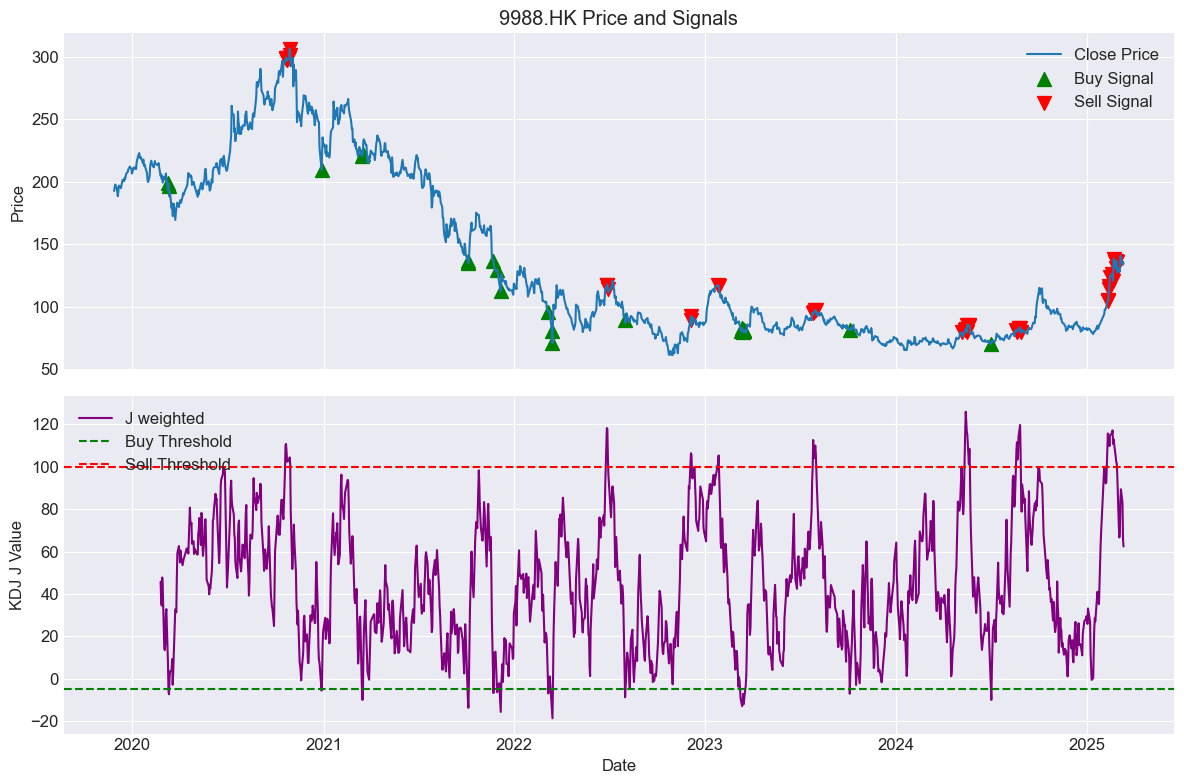

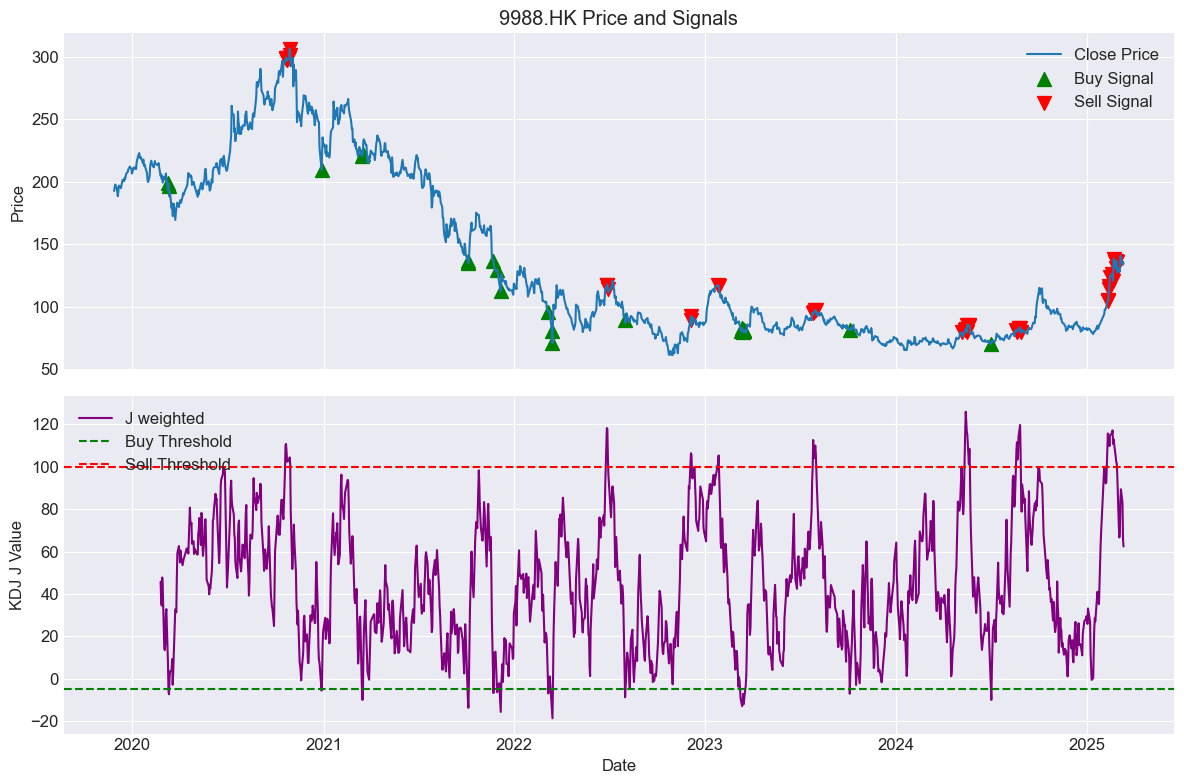

In [12]:
# Define function to plot KDJ indicator with signals
def plot_kdj_signals(df, ticker, start_date=None, end_date=None, figsize=(12, 8), strategy_params=strategy_params):
    if start_date:
        df = df.loc[start_date:]
    if end_date:
        df = df.loc[:end_date]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True)

    # Plot price with buy/sell signals
    ax1.plot(df.index, df[f'{ticker}_close'], label='Close Price')
    buy_signals = df[df[f'{ticker}_signal'] == 1]
    sell_signals = df[df[f'{ticker}_signal'] == -1]

    ax1.scatter(buy_signals.index, buy_signals[f'{ticker}_close'], color='green', marker='^', s=100, label='Buy Signal')
    ax1.scatter(sell_signals.index, sell_signals[f'{ticker}_close'], color='red', marker='v', s=100, label='Sell Signal')

    ax1.set_title(f'{ticker} Price and Signals')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # Plot KDJ J line with thresholds
    ax2.plot(df.index, df[f'{ticker}_kdj_j_weighted'], label='J weighted', color='purple')
    ax2.axhline(y=strategy_params['j_buy_threshold'], color='green', linestyle='--', label='Buy Threshold')
    ax2.axhline(y=strategy_params['j_sell_threshold'], color='red', linestyle='--', label='Sell Threshold')

    ax2.set_ylabel('KDJ J Value')
    ax2.set_xlabel('Date')
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    return fig

# Plot last 180 days
end_date = signals_data.index[-1]
start_date = signals_data.index[0]
plot_kdj_signals(signals_data, ticker, start_date, end_date)

## Backtesting

In [13]:
# Get start and end dates from our data
start_date = data.index[0]
end_date = data.index[-1]

# Fetch daily risk-free rates for the entire period
print(f"Fetching daily risk-free rates...")
risk_free_rates = get_risk_free_rate(start_date=start_date, end_date=end_date)
print(risk_free_rates.head())

[*********************100%***********************]  1 of 1 completed

Fetching daily risk-free rates...
Date
2019-11-27    0.01565
2019-11-29    0.01540
2019-12-02    0.01538
2019-12-03    0.01538
2019-12-04    0.01498
Name: (Close, ^IRX), dtype: float64



/Users/haiyangyu/Library/CloudStorage/OneDrive-KekeChen/Haiyangyu/UCLA MFE/fintech/trading_strategy_project/utils/data_utils.py:220: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_rf = daily_rf.fillna(method='ffill').fillna(method='bfill')


## Performance Analysis

In [ ]:
# Calculate performance metrics
metrics = calculate_returns(backtest_results, ticker, benchmark)

# Generate performance report
generate_performance_report(metrics)

KeyError: '9988.HK_strategy_return'

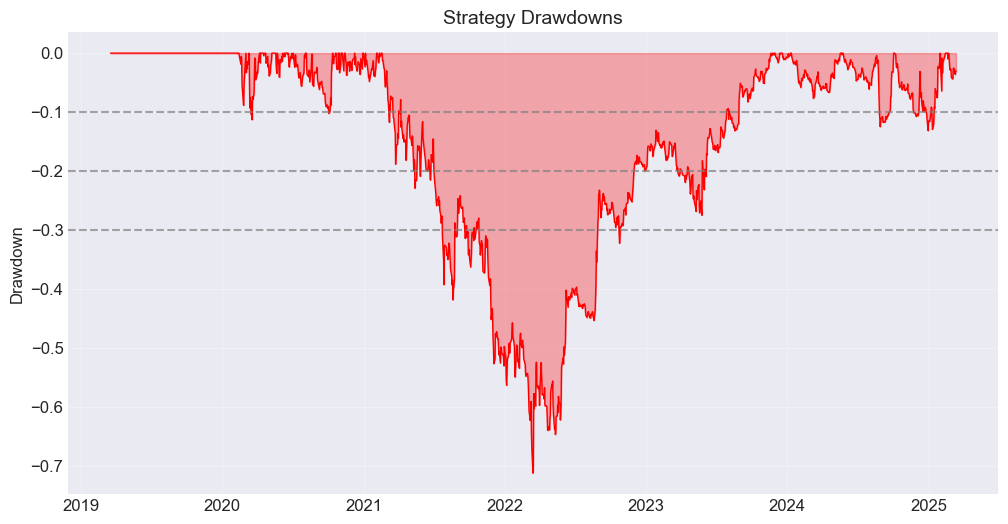

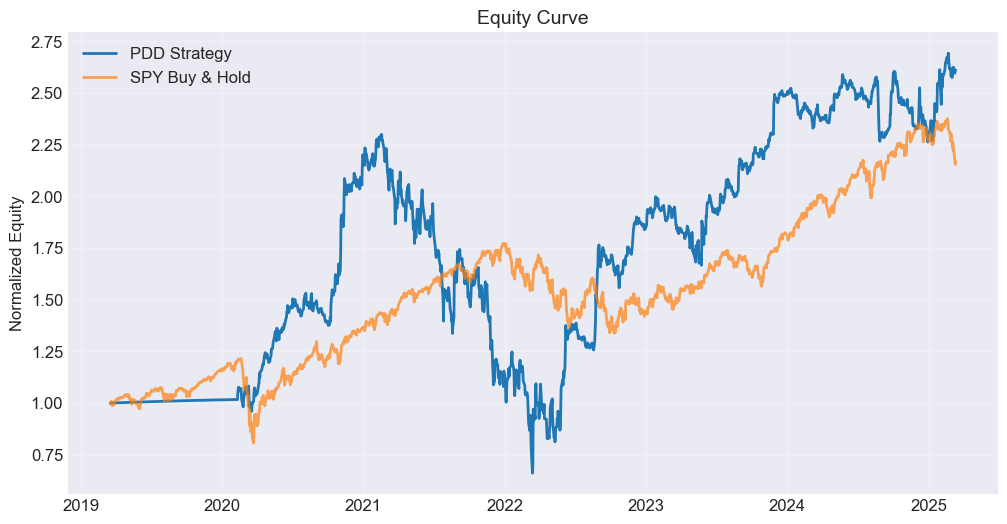

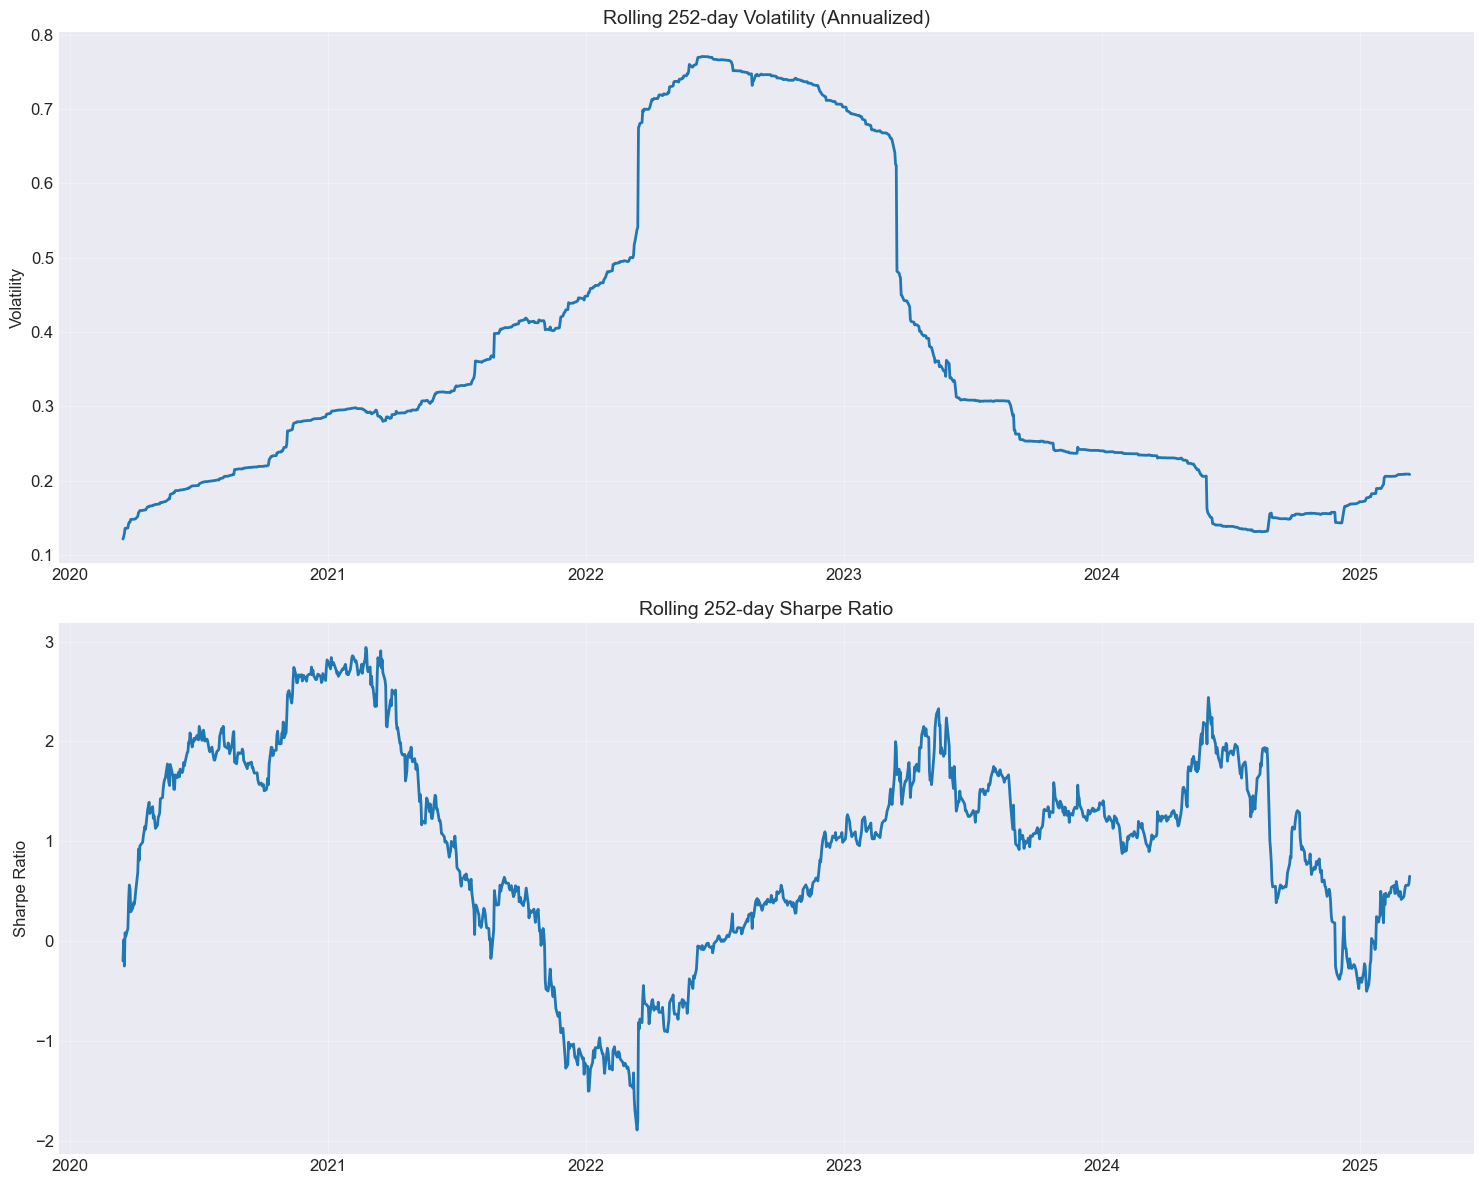

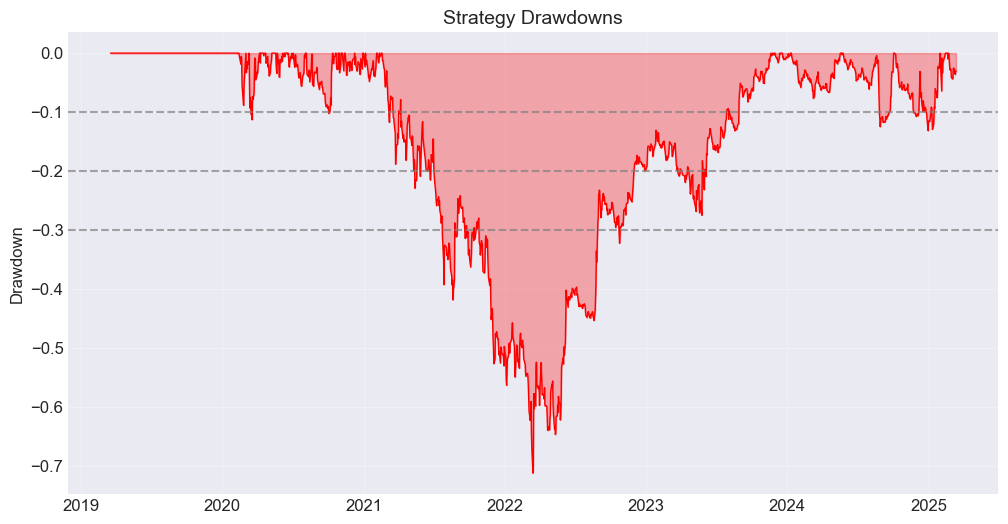

In [41]:
engine.plot_equity_curve(backtest_results, ticker, benchmark)
plot_rolling_metrics(backtest_results, ticker)
engine.plot_drawdowns(backtest_results, ticker)

## Optimization

In [19]:
# Define parameter grid
param_grid = {
    'k_period': [9],
    'j_buy_threshold': [-5, 0,5],
    'j_sell_threshold': [70, 75, 80, 85, 90],
    'daily_enabled': [True],
    'weekly_enabled': [True],
    'position_size': [ 0.5,  0.7, 1.0],
    'weekly_weight': [0.25, 0.4, 0.45, 0.5],
}

# Create and run grid search
grid_search = GridSearch(
    data=data,
    ticker=ticker,
    strategy_class=KDJStrategy,
    param_grid=param_grid,
    metric='sharpe_ratio',
    maximize=True,
    n_jobs=1  
)
grid_search.fit()

Grid search with 60 parameter combinations
Progress: 6/60 combinations evaluated (5.39s)
Progress: 12/60 combinations evaluated (10.81s)
Progress: 18/60 combinations evaluated (16.15s)
Progress: 24/60 combinations evaluated (21.63s)
Progress: 30/60 combinations evaluated (27.02s)
Progress: 36/60 combinations evaluated (32.41s)
Progress: 42/60 combinations evaluated (37.85s)
Progress: 48/60 combinations evaluated (43.32s)
Progress: 54/60 combinations evaluated (48.71s)
Progress: 60/60 combinations evaluated (54.04s)

Grid search completed in 54.04s
Best sharpe_ratio: 0.9422
Best parameters: {'k_period': 9, 'j_buy_threshold': -5, 'j_sell_threshold': 75, 'daily_enabled': True, 'weekly_enabled': True, 'position_size': 1.0, 'weekly_weight': 0.5}


## Optimization Validation

Best parameters: {'k_period': 9, 'j_buy_threshold': -5, 'j_sell_threshold': 75, 'daily_enabled': True, 'weekly_enabled': True, 'position_size': 1.0, 'weekly_weight': 0.5}


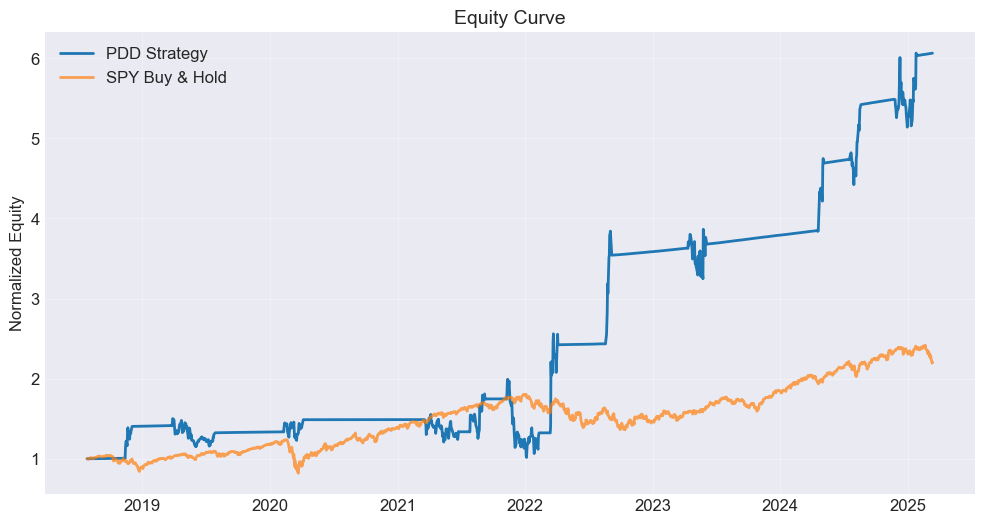

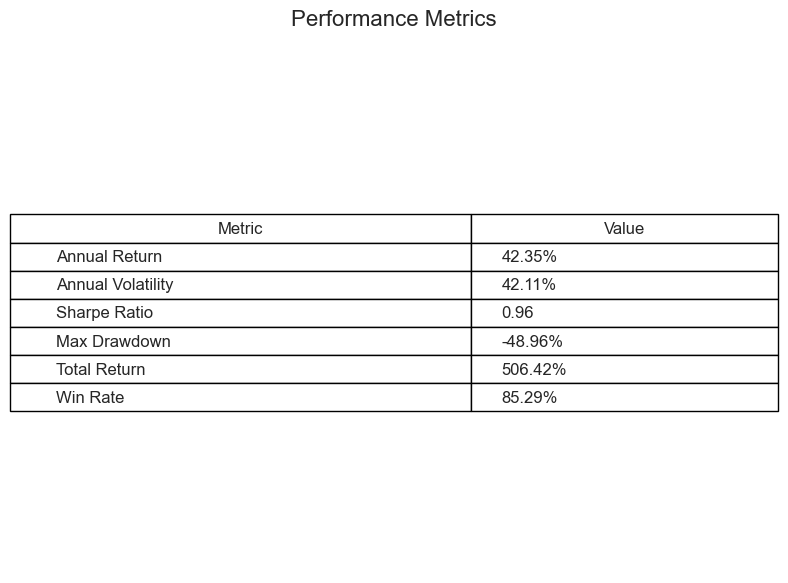

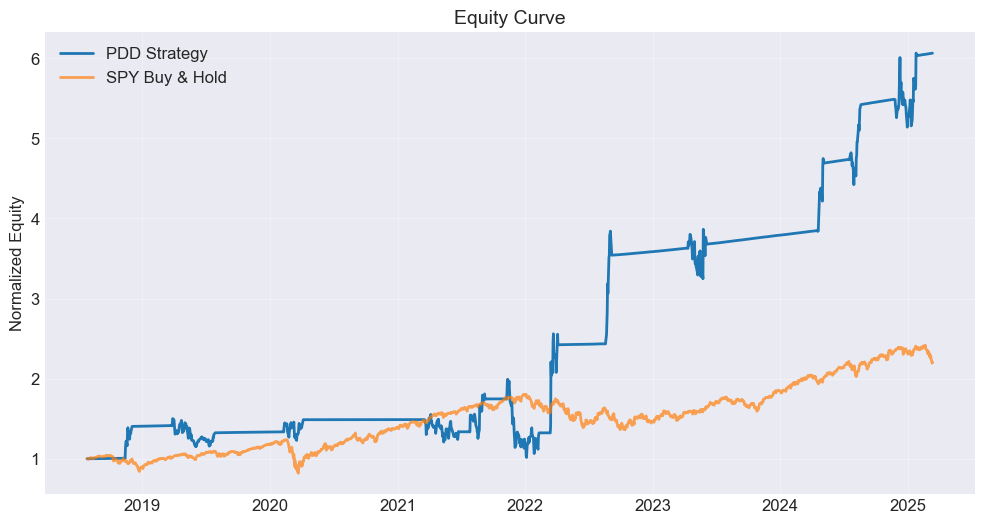

In [20]:
# Apply best parameters
best_strategy = KDJStrategy(ticker, grid_search.best_params)
print(f"Best parameters: {grid_search.best_params}")

# Run final backtest
best_backtest = engine.run(data, ticker, best_strategy)

# Evaluate performance
best_metrics = calculate_returns(best_backtest, ticker, benchmark)
generate_performance_report(best_metrics)

# Plot final equity curve
engine.plot_equity_curve(best_backtest, ticker, benchmark)

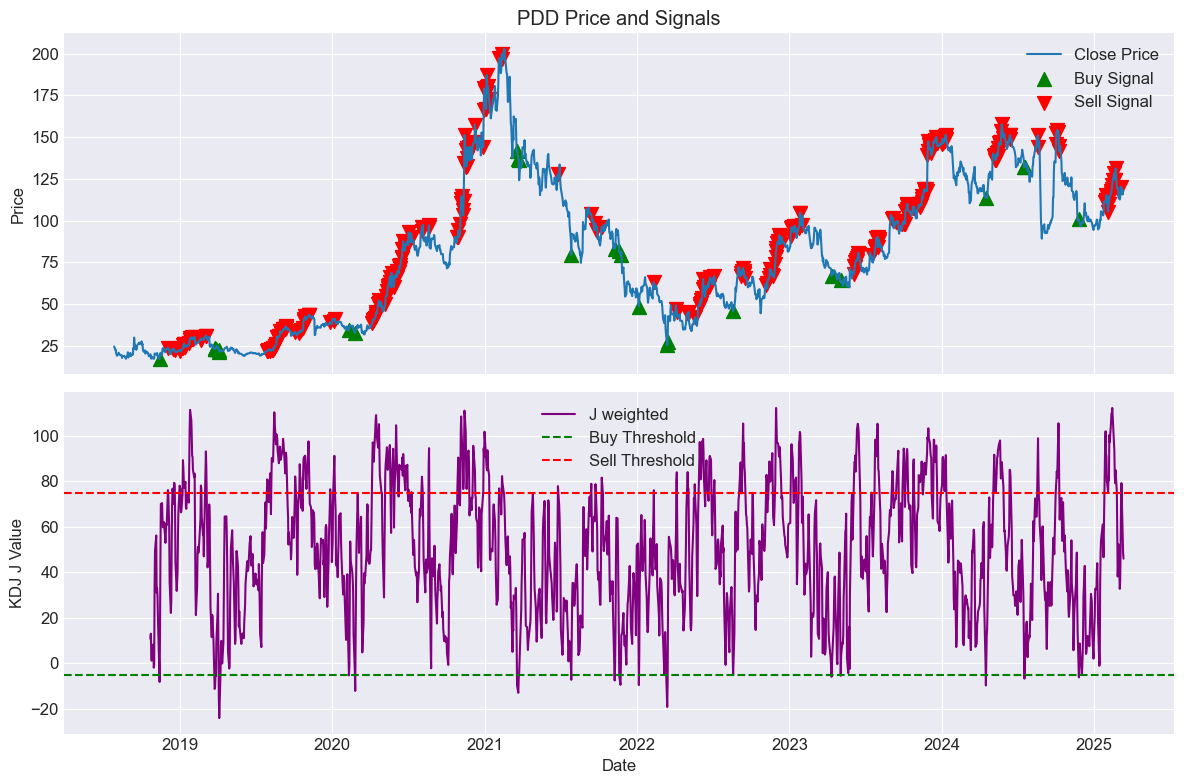

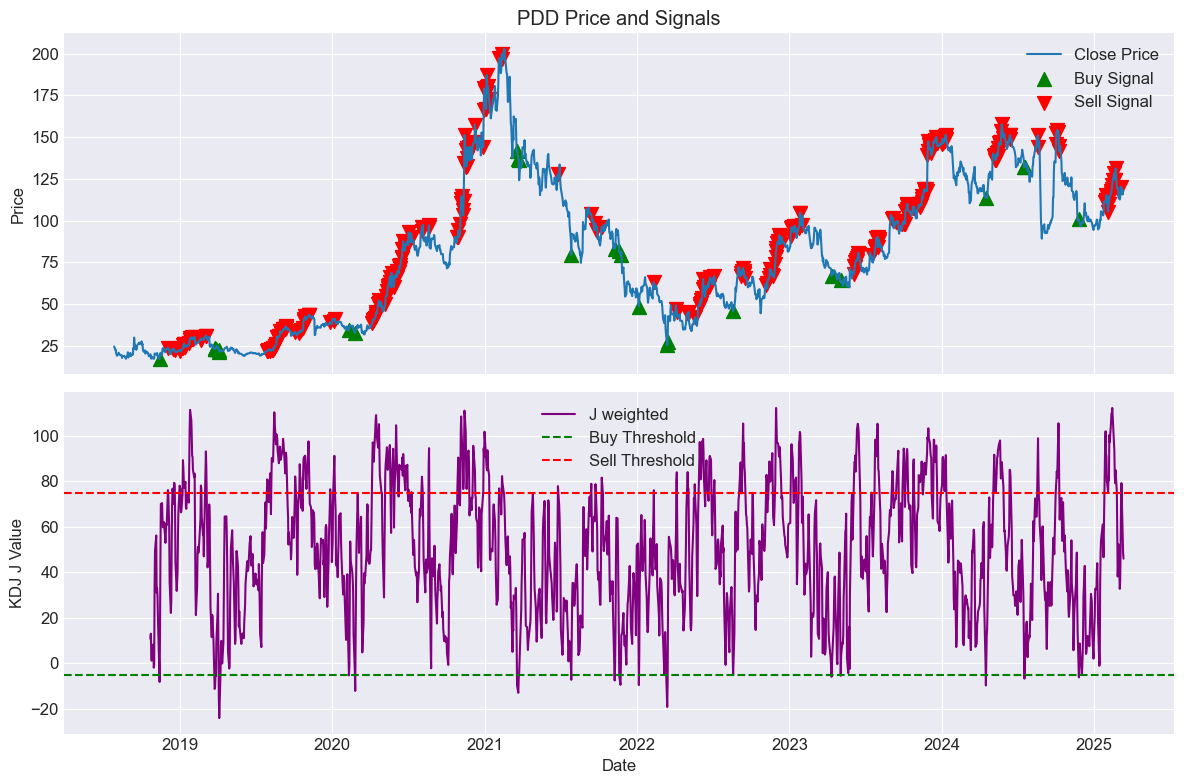

In [21]:
best_signals_data = best_strategy.generate_signals(best_strategy.prepare_data(data))
plot_kdj_signals(best_signals_data, ticker, start_date, end_date, strategy_params=best_strategy.params)

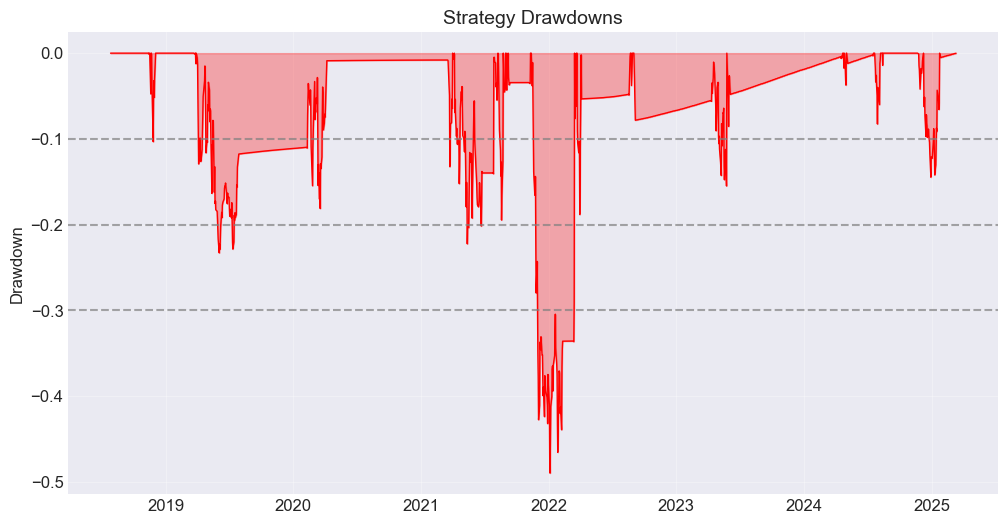

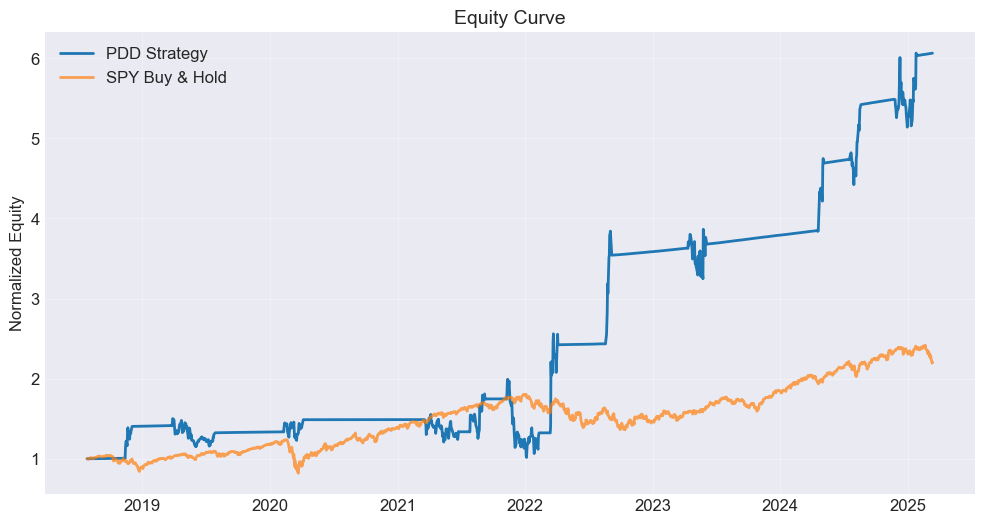

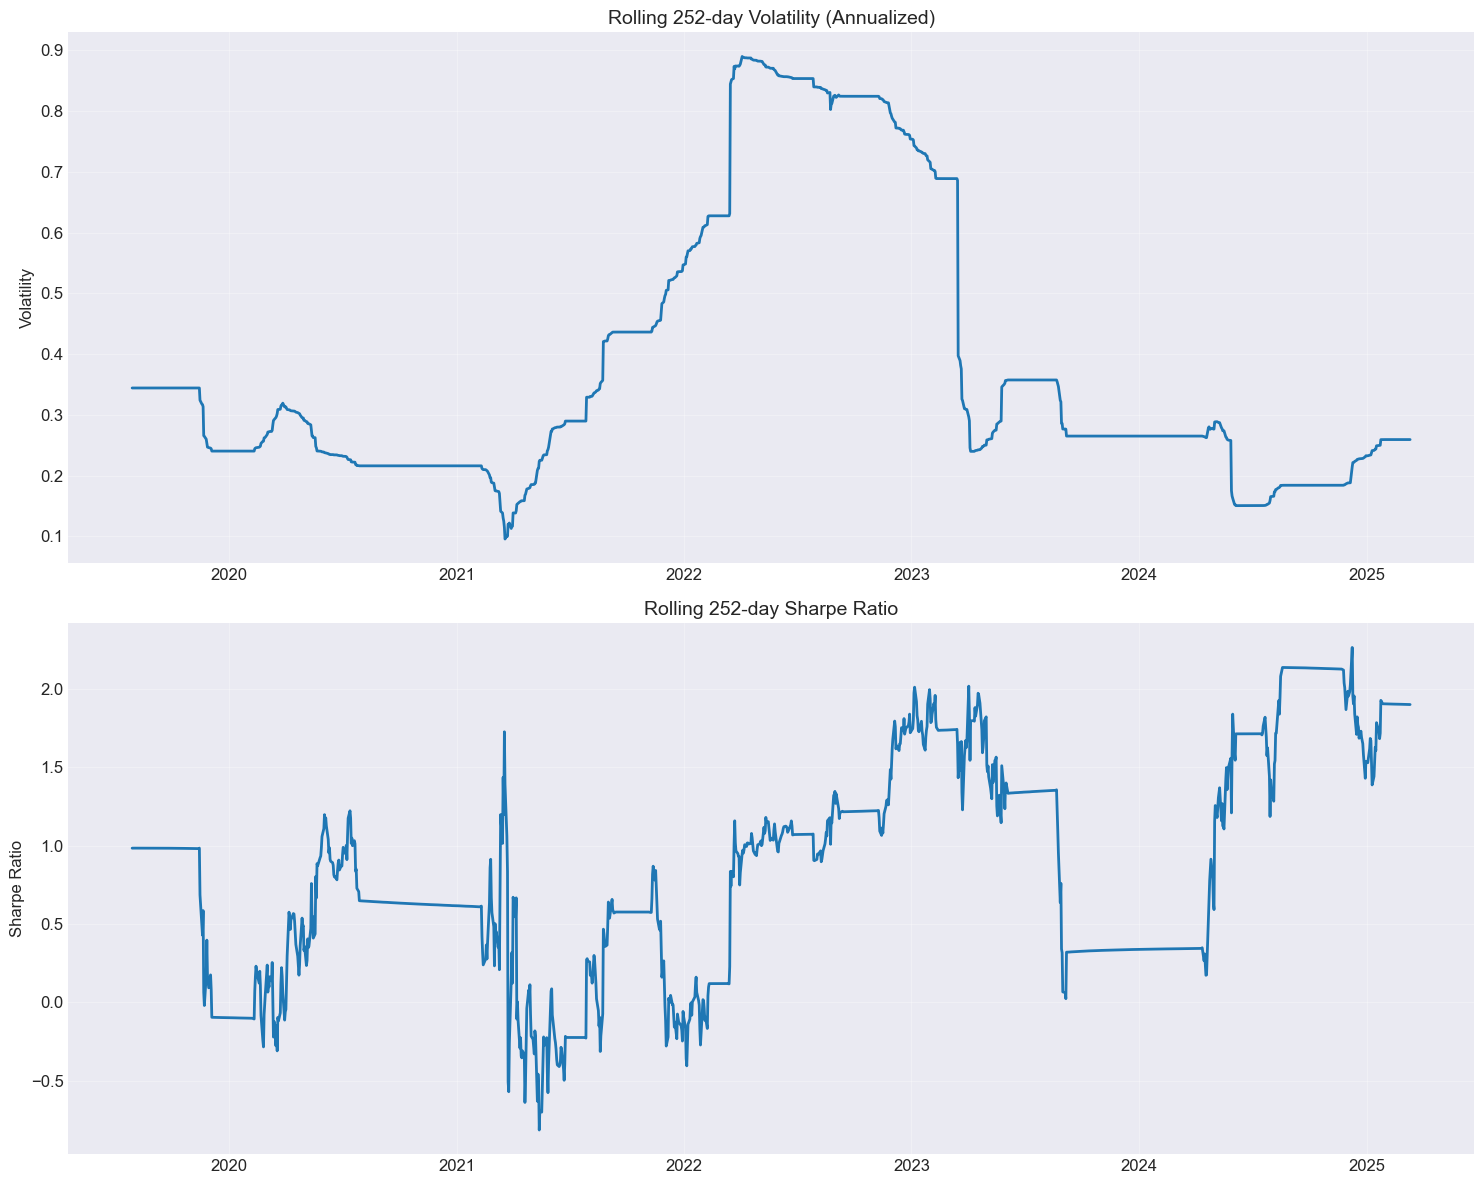

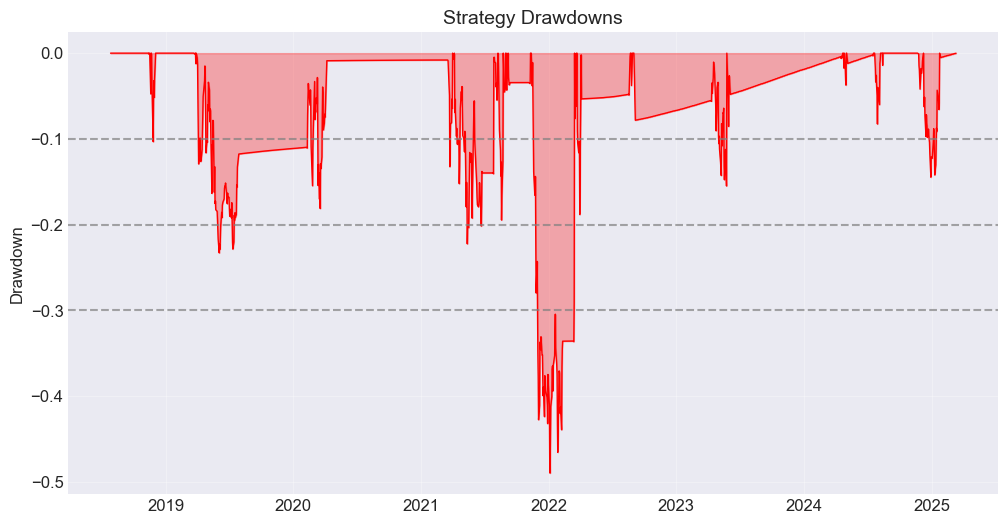

In [23]:
engine.plot_equity_curve(best_backtest, ticker, benchmark)
plot_rolling_metrics(best_backtest, ticker)
engine.plot_drawdowns(best_backtest, ticker)